# Are we spending more on transportation lately? Yes, but are we moving more?
## Exploratory Analysis of Transportation Expenditure in Spain 

This notebook tries to solve questions that could indicate changes in household mobility expenditures in the last years. The central hypothesis is that those changes (if any) are promoted by new mobility trends. Questions are analyzed by exploring the datasets of the Spanish household expenditure survey.

## Table of Contents
<ol>
<li><a href="#business">Business Understanding</a></li>
<li><a href="#dataunderstanding">Data Understanding</a></li>
<li><a href="#datapreparation"> Data Preparation</a></li>
    <ol>
        <li><a href="#datawrangling"> Data Wrangling</a>
            <ol>
                <li><a href="#gath">Gathering</a></li>
                <li><a href="#asse">Assessing</a></li>
                <li><a href="#clea">Cleaning</a></li>
            </ol> 
        </li>
        <li><a href="#eda"> Data Analysis</a></li>
    </ol> 
<li><a href="#result">Result Evaluation</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Refere">References</a></li>    
</ol>

<a id='business'></a>
## 1. Business Understanding

### Goals
For this case study, the primary goal is to check the economic impact of new mobility trends on Household transportation expenditures.  
From the vast array of mobility trends rising nowadays, the study considers micromobility, carsharing, and ridehailing. 
The impact these new trends have on transportation expenditures will be assessed by answering the following questions:
1. _Are we spending less on transportation lately?_  
    1.1 How have our transportation expenditures changed in the last five years?  

2. _Are we spending more on private cars (purchase and use)?_  
   2.1 Exploration of private car purchases.  
   2.2 Exploration of traditional vs. alternative fuels expenditure.   
   2.3 Exploration of driving licenses and private vehicle circulatory tax expenditure.  
   2.4 Has the share of income spent on owning and running motor vehicles changed over the years?  

3. _Is the use of Personal Mobility Vehicles (kickscooters, bikes, etc.) rising?_  
   3.1 Exploration of personal mobility vehicle purchases.  

4. _Are we spending more on public transportation?_    
    4.1 Exploration of public transportation expenditures; individual and combined tickets. 

5. _What variables correlate well with car-oriented mobility?_  

6. _Are new mobility trends allowing us to spend less?_   
    6.1 Exploration of ridehailing and ridesharing expenditures.  
    6.2 Exploration of vehicle rent.  
    6.3 Exploration of shared mobility vs traditional means .  
    6.4 Are we moving more?
 	

<a id='dataunderstanding'></a>
## 2. Data Understanding

### Data collection

These questions require knowing how much household expenditures are destined for transportation. Also, regarding transportation spending, it would be interesting to distinguish the transportation means employed.  
  
Household budget surveys are widely spread datasets collected by many countries. They focus on household expenditures and provide a picture of the living conditions of a given country [1]. These surveys help answer many economic-related questions.
  
The survey employed in this analysis depicts Spain.
  
As mentioned in earlier sections, the mobility services considered for this study are micromobility, carsharing, and ridehailing. These are mainly present in urban settings, and not all urban populations of Spain have access to them. There are also suburban and rural mobility trends, which are scarcer and have less data available. Therefore, Spanish cities with micromobility and shared mobility players must be identified. From the research carried out checking the existence of shared and micromobility options [2-8], The Autonomous communities and provinces selected were Andalucía (Cordoba, Málaga, Granada, and Sevilla), Aragon (Zaragoza), Cataluña (Barcelona), Comunitat Valenciana (Valencia) and Comunidad de Madrid (Madrid).

<a id='datapreparation'></a>
## 3. Data Preparation

The Spanish household expenditure survey data was downloaded from the National Statistics Institute. Survey results are divided into three files. The first one includes the expenditures of all families, the second describes the household, and the third provides details related to the household members. 

Each data file comes with .docx documents explaining the meaning of the columns, temporal aggregation, and units.  


<a id='datawrangling'></a>
### Data wrangling

#### Required dependencies

In [1]:
# Imports

# File handling
import requests as rd
import zipfile

# Data preparation and analysis 
import numpy as np
import pandas as pd

# Statistics
from scipy import stats
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pymannkendall

# Data visualization 
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.io as pio
import plotly.express as px
%matplotlib inline
%config InlineBackend.figure_format='retina'
import IPython.display
from IPython.display import display, clear_output
from helper_plot import plot2print, scatter_plot


In [2]:
# shot plotly plots
pio.renderers.default = "plotly_mimetype+notebook"

<a id='gath'></a>
### Gathering

As explained above, each year is described in three datasets (expenditures, household information, and household member information). These datasets will be merged into one, and their data will be stored in three dictionaries with 5 DataFrames each, one per year. 

In [3]:
# Constants
PATH = 'data'
YEARS = [2018, 2019, 2020, 2021, 2022]

# Parameters
df_dict_keys = list(map(str, YEARS))

# Import data into dicts
# Create expenses DataFrames' dict
dfs_ = []
for i in range(len(df_dict_keys)):
    file_year_zip = f"{PATH}/EPFgastos_{YEARS[i]}.csv.zip"
    file_zipfile = zipfile.ZipFile(file_year_zip)
    df = pd.read_csv(file_zipfile.open(file_year_zip[5:-4]), sep='\t', low_memory=False)
    dfs_.append(df)
dict_df_HBS_all_expenses = dict(zip(df_dict_keys, dfs_))

In [4]:
# Create households DataFrames' dict
dfs_households = []
for i in range(len(df_dict_keys)):
    df = pd.read_csv(f"{PATH}/EPFhogar_{YEARS[i]}.csv", sep='\t', low_memory=False)
    dfs_households.append(df)
dict_df_HBS_all_households = dict(zip(df_dict_keys, dfs_households))

In [5]:
# Create household member information DataFrames' dict
dfs_membersHouseholds = []
for i in range(len(df_dict_keys)):
    df_i = pd.read_csv(f"{PATH}/EPFmhogar_{YEARS[i]}.csv", sep='\t', low_memory=False)
    dfs_membersHouseholds.append(df_i)
dict_df_HBS_all_memberHouseholds = dict(zip(df_dict_keys, dfs_membersHouseholds))

> Handling the DataFrames into dictionaries offers flexibility to access specific year's values. The setback is that it requires loops. In addition to these dictionaries, a DataFrame will store the information for all five years. Ultimately, the facility to handle one or another will be discussed.

> The datasets are inspected to make sure the dictionaries were created correctly.

In [6]:
# Visual inspection 
dict_df_HBS_all_expenses['2019']

ANOENC  NUMERO CODIGO      GASTO  PORCENDES  PORCENIMP   CANTIDAD  \
0          2019       1  01111   28314.98        0.0        0.0   37127.76   
1          2019       1  01113  372283.47        0.0        0.0  256519.10   
2          2019       1  01114   35484.02        0.0        0.0   27002.01   
3          2019       1  01118   82437.14        0.0        0.0   10125.75   
4          2019       1  01122  293370.09        0.0        0.0   91131.79   
...         ...     ...    ...        ...        ...        ...        ...   
1889673    2019   20817  12111    3634.29        0.0      100.0        NaN   
1889674    2019   20817  12521  128355.90        0.0        0.0        NaN   
1889675    2019   20817  12541  248689.56        0.0        0.0        NaN   
1889676    2019   20817  12704     411.43        0.0      100.0        NaN   
1889677    2019   20817  12810    3451.70        0.0      100.0        NaN   

          GASTOMON  GASTNOM1  GASTNOM2  GASTNOM3  GASTNOM4  GASTNOM5  \
0         28314.98       NaN       NaN       NaN       NaN       NaN   
1        372283.47       NaN       NaN       NaN       NaN       NaN   
2         35484.02       NaN       NaN       NaN       NaN       NaN   
3         82437.14       NaN       NaN       NaN       NaN       NaN   
4        293370.09       NaN       NaN       NaN       NaN       NaN   
...            ...       ...       ...       ...       ...       ...   
1889673    3634.29       NaN       NaN       NaN       NaN       NaN   
1889674  128355.90       NaN       NaN       NaN       NaN       NaN   
1889675  248689.56       NaN       NaN       NaN       NaN       NaN   
1889676     411.43       NaN       NaN       NaN       NaN       NaN   
1889677    3451.70       NaN       NaN       NaN       NaN       NaN   

              FACTOR  
0        1294.618356  
1        1294.618356  
2        1294.618356  
3        1294.618356  
4        1294.618356  
...              ...  
1889673   534.816259  
1889674   534.816259  
1889675   534.816259  
1889676   534.816259  
1889677   534.816259  

[1889678 rows x 14 columns]

In [7]:
# Visual inspection 
dict_df_HBS_all_households['2020']

ANOENC  NUMERO  CCAA  NUTS1  CAPROV  TAMAMU  DENSIDAD  CLAVE  CLATEO  \
0        2020       1    12      1       6       3         3      1       1   
1        2020       2     5      7       1       1         1      1       1   
2        2020       3     5      7       1       1         1      1       1   
3        2020       4    10      5       6       3         2      2       2   
4        2020       5    16      2       6       2         1      2       2   
...       ...     ...   ...    ...     ...     ...       ...    ...     ...   
19165    2020   19166     7      4       6       5         3      1       1   
19166    2020   19167     9      5       6       5         3      2       2   
19167    2020   19168     9      5       6       5         3      2       2   
19168    2020   19169    10      5       6       3         2      2       2   
19169    2020   19170     7      4       1       1         1      1       2   

            FACTOR  ...  FUENPRIN  FUENPRINRED  IMPEXAC  INTERIN  NUMPERI  \
0      1593.985745  ...         2            2     2726        6        2   
1       259.167031  ...         1            1     4998        7        2   
2       529.688667  ...         3            3     1245        3        2   
3      1034.909802  ...         3            3     3106        7        2   
4       371.914654  ...         4            3     1250        3        1   
...            ...  ...       ...          ...      ...      ...      ...   
19165   580.026322  ...         3            3     2185        5        1   
19166  2578.309998  ...         2            2     2200        5        1   
19167  1846.706676  ...         1            1     2215        5        2   
19168  1571.709414  ...         3            3     1365        3        1   
19169  1663.797365  ...         1            1     2715        6        1   

       COMIMH  COMISD  COMIHU  COMIINV  COMITOT  
0          56       0       0        0       56  
1          60       0       0        0       60  
2          56       0       0        0       56  
3          54       0       0        0       54  
4         112       0       0        0      112  
...       ...     ...     ...      ...      ...  
19165      56       0       0        0       56  
19166     112       0       0        0      112  
19167      81       0       0        0       81  
19168      28       0       0        0       28  
19169      20       0       0        0       20  

[19170 rows x 188 columns]

In [8]:
# Visual inspection 
dict_df_HBS_all_memberHouseholds['2019']

ANOENC  NUMERO  NORDEN  CATEGMH  SUSPRIN  RELASP  EDAD  SEXO  \
0        2019       1       1        1        1       1    56     6   
1        2019       1       2        1        6       2    64     1   
2        2019       1       3        1        6       3    27     1   
3        2019       2       1        1        1       1    69     1   
4        2019       3       1        1        1       1    66     6   
...       ...     ...     ...      ...      ...     ...   ...   ...   
54032    2019   20816       4        1        6       3    10     1   
54033    2019   20816       5        1        6       3     3     6   
54034    2019   20817       1        1        1       1    72     1   
54035    2019   20817       2        1        6       2    67     6   
54036    2019   20817       3        1        6       3    45     1   

       PAISNACIM  NACIONA  ... SITURED  OCU  JORNADA  PERCEP IMPEXACP  \
0              1        1  ...       1    1        1       1     -9.0   
1              1        1  ...       2    2                1     -9.0   
2              1        1  ...       2    2                6      NaN   
3              1        1  ...       2    2                1     -9.0   
4              1        1  ...       2    2                1    558.0   
...          ...      ...  ...     ...  ...      ...     ...      ...   
54032          1        1  ...                             6      NaN   
54033          1        1  ...                             6      NaN   
54034          1        1  ...       2    2                1     -9.0   
54035          1        1  ...       2    2                6      NaN   
54036          1        1  ...       1    1        1       1     -9.0   

       INTERINP  NINODEP  HIJODEP  ADULTO       FACTOR  
0            03        6        6       1  1294.618356  
1            02        6        6       1  1294.618356  
2                      6        6       1  1294.618356  
3            05        6        6       1  1569.018845  
4            02        6        6       1   332.468410  
...         ...      ...      ...     ...          ...  
54032                  1        1       6   371.083222  
54033                  1        1       6   371.083222  
54034        02        6        6       1   534.816259  
54035                  6        6       1   534.816259  
54036        02        6        6       1   534.816259  

[54037 rows x 33 columns]


<a id='asse'></a>
### Assessing

<p style='text-align: justify;'> This part of the analysis will focus on identifying those aspects of the datasets to improve. These improvements will make posterior analysis and modeling possible. </p>

**-` Expenses DataFrames`**

In [9]:
# Visual inspection 
dict_df_HBS_all_expenses['2022'].head()

ANOENC  NUMERO CODIGO      GASTO  PORCENDES  PORCENIMP  CANTIDAD  \
0    2022       1  01111    4904.58     100.00        0.0   1563.96   
1    2022       1  01112    2202.06     100.00        0.0       NaN   
2    2022       1  01113  191447.43      32.34        0.0  56302.55   
3    2022       1  01114   54403.90     100.00        0.0   9383.76   
4    2022       1  01115    8617.42     100.00        0.0       NaN   

    GASTOMON  GASTNOM1  GASTNOM2  GASTNOM3  GASTNOM4  GASTNOM5      FACTOR  
0    4904.58       NaN       NaN       NaN       NaN       NaN  299.937215  
1    2202.06       NaN       NaN       NaN       NaN       NaN  299.937215  
2  191447.43       NaN       NaN       NaN       NaN       NaN  299.937215  
3   54403.90       NaN       NaN       NaN       NaN       NaN  299.937215  
4    8617.42       NaN       NaN       NaN       NaN       NaN  299.937215

In [10]:
# Display basic information
dict_df_HBS_all_expenses['2022'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437060 entries, 0 to 1437059
Data columns (total 14 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   ANOENC     1437060 non-null  int64  
 1   NUMERO     1437060 non-null  int64  
 2   CODIGO     1437060 non-null  object 
 3   GASTO      1437060 non-null  float64
 4   PORCENDES  1437060 non-null  float64
 5   PORCENIMP  1437060 non-null  float64
 6   CANTIDAD   545314 non-null   float64
 7   GASTOMON   1437058 non-null  float64
 8   GASTNOM1   2537 non-null     float64
 9   GASTNOM2   934 non-null      float64
 10  GASTNOM3   1868 non-null     float64
 11  GASTNOM4   20665 non-null    float64
 12  GASTNOM5   0 non-null        float64
 13  FACTOR     1437060 non-null  float64
dtypes: float64(11), int64(2), object(1)
memory usage: 153.5+ MB


In [11]:
# Verify data type
type(dict_df_HBS_all_expenses['2022']['CODIGO'][9])

str

> The columns with the most missing values seem to be the ones named 'GASTNOM#.'  
The description file indicated that these columns are reserved for expenditures paid using non-monetary compensations. These could be labor, work tickets, etc.

In [12]:
# Look at unique values
dict_df_HBS_all_expenses['2022'].nunique()

ANOENC             1
NUMERO         20585
CODIGO           360
GASTO        1241913
PORCENDES       9652
PORCENIMP       8478
CANTIDAD      365169
GASTOMON     1218944
GASTNOM1        2474
GASTNOM2         917
GASTNOM3        1772
GASTNOM4       20378
GASTNOM5           0
FACTOR         17861
dtype: int64

In [13]:
# Look at duplicated values
sum(dict_df_HBS_all_expenses['2022'].duplicated())

0

In [14]:
# Inspect shape 
for year in df_dict_keys:
    print(f"{year} expenses' table is composed by {dict_df_HBS_all_expenses[year].shape[0]:,} rows and {dict_df_HBS_all_expenses[year].shape[1]} columns.")

2018 expenses' table is composed by 1,924,175 rows and 14 columns.
2019 expenses' table is composed by 1,889,678 rows and 14 columns.
2020 expenses' table is composed by 1,568,629 rows and 14 columns.
2021 expenses' table is composed by 1,488,799 rows and 14 columns.
2022 expenses' table is composed by 1,437,060 rows and 14 columns.


> All tables share the same number of columns, but the rows (observations) vary.

In [15]:
# Inspect no. of families
for year in df_dict_keys:
    print(f"{year} describes the spending habits of {len(dict_df_HBS_all_expenses[year]['NUMERO'].unique()):,} families.")

2018 describes the spending habits of 21,395 families.
2019 describes the spending habits of 20,817 families.
2020 describes the spending habits of 19,169 families.
2021 describes the spending habits of 19,394 families.
2022 describes the spending habits of 20,585 families.


> The year with most families is 2018. This fact has little impact when considering the overall Spanish population because each family includes an expansion factor that links the sample household with the number of homes they represent in the population.

In [16]:
# Look at statistics 
dict_df_HBS_all_expenses['2021'].describe()

ANOENC        NUMERO         GASTO     PORCENDES     PORCENIMP  \
count  1488799.0  1.488799e+06  1.488799e+06  1.488799e+06  1.488799e+06   
mean      2021.0  9.679386e+03  3.705809e+05  3.762530e+01  1.440463e+01   
std          0.0  5.587630e+03  1.638910e+06  4.756322e+01  3.450117e+01   
min       2021.0  1.000000e+00  1.000000e-02  0.000000e+00  0.000000e+00   
25%       2021.0  4.839000e+03  5.591385e+03  0.000000e+00  0.000000e+00   
50%       2021.0  9.692000e+03  5.160908e+04  0.000000e+00  0.000000e+00   
75%       2021.0  1.448200e+04  2.151886e+05  1.000000e+02  0.000000e+00   
max       2021.0  1.939400e+04  2.797928e+08  1.000000e+02  1.000000e+02   

           CANTIDAD      GASTOMON      GASTNOM1      GASTNOM2      GASTNOM3  \
count  5.901330e+05  1.488797e+06  2.447000e+03  1.530000e+03  1.895000e+03   
mean   2.589946e+05  2.855865e+05  6.147322e+05  1.852813e+05  9.562027e+05   
std    1.270695e+06  1.288340e+06  3.027980e+06  7.675572e+05  3.138617e+06   
min    1.001000e+01  0.000000e+00  0.000000e+00  7.800000e-01  9.203000e+01   
25%    8.155760e+03  4.469960e+03  7.190204e+04  1.165194e+04  8.113860e+03   
50%    2.711620e+04  4.705294e+04  1.723470e+05  4.862174e+04  1.010220e+05   
75%    9.268774e+04  1.973388e+05  3.956287e+05  1.432249e+05  7.502103e+05   
max    1.118148e+08  2.797928e+08  1.020367e+08  1.637394e+07  5.707537e+07   

           GASTNOM4  GASTNOM5        FACTOR  
count  1.974900e+04       0.0  1.488799e+06  
mean   6.225154e+06       NaN  9.834518e+02  
std    6.322289e+06       NaN  7.368025e+02  
min    8.453072e+04       NaN  7.411386e+01  
25%    2.542857e+06       NaN  4.572252e+02  
50%    4.230137e+06       NaN  7.823255e+02  
75%    7.803856e+06       NaN  1.331782e+03  
max    2.444656e+08       NaN  9.423128e+03

In [17]:
# Look at statistics- categorical variables
dict_df_HBS_all_expenses['2020'].describe(include = 'object')

CODIGO
count   1568629
unique      361
top       04511
freq      18850

**-` Households DataFrames`**

In [18]:
# Visual inspection 
dict_df_HBS_all_households['2018'].head()

ANOENC  NUMERO  CCAA  NUTS1  CAPROV  TAMAMU  DENSIDAD  CLAVE  CLATEO  \
0    2018       1     2      2       1       1         1      2       2   
1    2018       2     9      5       6       4         2      1       1   
2    2018       3    13      3       1       1         1      1       1   
3    2018       4    10      5       1       1         1      1       1   
4    2018       5     1      6       6       3         2      1       1   

        FACTOR  ...  FUENPRIN  FUENPRINRED  IMPEXAC  INTERIN  NUMPERI  COMIMH  \
0   422.866646  ...         2            2     2324        5        2      54   
1  2051.951724  ...         2            2     2682        6        2      64   
2  1349.187753  ...         3            3     3240        7        2      52   
3  1200.012995  ...         3            3      746        2        1      28   
4   887.660816  ...         3            3     3150        7        2      54   

   COMISD  COMIHU  COMIINV  COMITOT  
0       0       0        0       54  
1       0       0        0       64  
2       0       0        0       52  
3       0       0        0       28  
4       0       0        2       56  

[5 rows x 188 columns]

In [19]:
# Display basic information
dict_df_HBS_all_households['2019'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20817 entries, 0 to 20816
Columns: 188 entries, ANOENC to COMITOT
dtypes: float64(30), int64(97), object(61)
memory usage: 29.9+ MB


> Info is not showing information due to the number of columns in the DataFrame. The verbose parameter is set to True to check some columns.

In [20]:
# Display basic information
dict_df_HBS_all_households['2019'].info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20817 entries, 0 to 20816
Data columns (total 188 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    ANOENC         20817 non-null  int64  
 1    NUMERO         20817 non-null  int64  
 2    CCAA           20817 non-null  int64  
 3    NUTS1          20817 non-null  int64  
 4    CAPROV         20817 non-null  int64  
 5    TAMAMU         20817 non-null  int64  
 6    DENSIDAD       20817 non-null  int64  
 7    CLAVE          20817 non-null  int64  
 8    CLATEO         20817 non-null  int64  
 9    FACTOR         20817 non-null  float64
 10   NMIEMB         20817 non-null  int64  
 11   TAMANO         20817 non-null  int64  
 12   NMIEMSD        20817 non-null  int64  
 13   NMIEMHU        20817 non-null  int64  
 14   NMIEMIN        20817 non-null  int64  
 15   NMIEM1         20817 non-null  int64  
 16   NMIEM2         20817 non-null  int64  
 17   NMIEM3         20817 non-null

In [21]:
# Look at null values
dict_df_HBS_all_households['2022'].isnull().sum().sum()

444172

In [22]:
# Look at unique values
dict_df_HBS_all_households['2020'].nunique()

ANOENC         1
NUMERO     19170
CCAA          19
NUTS1          7
CAPROV         2
           ...  
COMIMH       183
COMISD        23
COMIHU        33
COMIINV       85
COMITOT      198
Length: 188, dtype: int64

In [23]:
# Look at duplicated values
sum(dict_df_HBS_all_households['2022'].duplicated())

0

In [24]:
# Inspect shape of all datasets
for year in df_dict_keys:
    print(f"{year} household's table is composed by {dict_df_HBS_all_households[year].shape[0]:,} rows and {dict_df_HBS_all_households[year].shape[1]} columns.")

2018 household's table is composed by 21,395 rows and 188 columns.
2019 household's table is composed by 20,817 rows and 188 columns.
2020 household's table is composed by 19,170 rows and 188 columns.
2021 household's table is composed by 19,394 rows and 188 columns.
2022 household's table is composed by 20,585 rows and 188 columns.


In [25]:
# Inspect no. of families
for year in df_dict_keys:
    print(f"{year} describes the housing conditions of {len(dict_df_HBS_all_households[year]['NUMERO'].unique()):,} families (sample).")

2018 describes the housing conditions of 21,395 families (sample).
2019 describes the housing conditions of 20,817 families (sample).
2020 describes the housing conditions of 19,170 families (sample).
2021 describes the housing conditions of 19,394 families (sample).
2022 describes the housing conditions of 20,585 families (sample).


> As expected, this information matches the one displayed in the expenses table.

> Additionally, we could use the population factor to see how many families these samples represent.

In [26]:
# Inspect no. of families
for year in df_dict_keys:
    print(f"{year} describes the housing conditions of {round(sum(dict_df_HBS_all_households[year]['FACTOR'])):,} families (population).")    

2018 describes the housing conditions of 18,627,677 families (population).
2019 describes the housing conditions of 18,742,156 families (population).
2020 describes the housing conditions of 18,845,114 families (population).
2021 describes the housing conditions of 18,866,360 families (population).
2022 describes the housing conditions of 19,034,311 families (population).


In [27]:
# Look at statistics
dict_df_HBS_all_households['2018'].describe()

ANOENC        NUMERO          CCAA         NUTS1        CAPROV  \
count  21395.0  21395.000000  21395.000000  21395.000000  21395.000000   
mean    2018.0  10698.000000      9.094835      3.749942      4.296565   
std        0.0   6176.348841      5.015944      1.842902      2.369757   
min     2018.0      1.000000      1.000000      1.000000      1.000000   
25%     2018.0   5349.500000      5.000000      2.000000      1.000000   
50%     2018.0  10698.000000      9.000000      4.000000      6.000000   
75%     2018.0  16046.500000     13.000000      5.000000      6.000000   
max     2018.0  21395.000000     19.000000      7.000000      6.000000   

             TAMAMU      DENSIDAD         CLAVE        CLATEO        FACTOR  \
count  21395.000000  21395.000000  21395.000000  21395.000000  21395.000000   
mean       2.715074      1.813788      1.422622      1.522038    870.655626   
std        1.610837      0.847493      0.493988      0.499526    615.040256   
min        1.000000      1.000000      1.000000      1.000000     64.061002   
25%        1.000000      1.000000      1.000000      1.000000    420.004649   
50%        3.000000      2.000000      1.000000      2.000000    689.051204   
75%        4.000000      3.000000      2.000000      2.000000   1182.371731   
max        5.000000      3.000000      2.000000      2.000000   6121.820126   

       ...        RENTAS        OTROIN       IMPEXAC       INTERIN  \
count  ...  21395.000000  21395.000000  21395.000000  21395.000000   
mean   ...      5.559477      5.788035   2155.686282      4.458565   
std    ...      1.585391      1.232785   1432.750748      1.937125   
min    ...     -9.000000     -9.000000      0.000000      1.000000   
25%    ...      6.000000      6.000000   1209.000000      3.000000   
50%    ...      6.000000      6.000000   1800.000000      4.000000   
75%    ...      6.000000      6.000000   2736.000000      6.000000   
max    ...      6.000000      6.000000  17500.000000     10.000000   

            NUMPERI        COMIMH        COMISD        COMIHU       COMIINV  \
count  21395.000000  21395.000000  21395.000000  21395.000000  21395.000000   
mean       1.589297     60.500444      0.118766      0.136060      4.220799   
std        1.178040     31.919562      1.650964      2.216172     10.935581   
min       -9.000000     -9.000000     -9.000000     -9.000000     -9.000000   
25%        1.000000     34.000000      0.000000      0.000000      0.000000   
50%        2.000000     56.000000      0.000000      0.000000      0.000000   
75%        2.000000     82.000000      0.000000      0.000000      3.000000   
max        7.000000    308.000000     56.000000    125.000000    196.000000   

            COMITOT  
count  21395.000000  
mean      64.978593  
std       33.321940  
min       -9.000000  
25%       41.000000  
50%       59.000000  
75%       84.000000  
max      308.000000  

[8 rows x 127 columns]

In [28]:
# Look at statistics for categorical variables
dict_df_HBS_all_households['2022'].describe(include = 'object')

PAISSP UNIONSP JORNADASP INTERINPSP  OCUPA OCUPARED ACTESTB ACTESTBRED  \
count   20585   20585     20585      20585  20585    20585   20585      20585   
unique      4       4         3          9     12        7      22          5   
top                 1         1         03      2        2       C          3   
freq    18938   11391     11941       6309   3538     5963    3435      13277   

       SITPROF SECTOR  ... FUENACV8 CALEFV8 FUENCAV8 REGTENV9 AGUACV9  \
count    20585  20585  ...    20585   20585    20585    20585   20585   
unique       6      4  ...        1       1        1        1       1   
top          1      6  ...                                              
freq     16761  12325  ...    20585   20585    20585    20585   20585   

       FUENACV9 CALEFV9 FUENCAV9 FUENPRIN FUENPRINRED  
count     20585   20585    20585    20585       20585  
unique        1       1        1        9           5  
top                                     2           2  
freq      20585   20585    20585    10378       10378  

[4 rows x 61 columns]

**`Household members' DataFrame`:**

In [29]:
# Visual inspection 
dict_df_HBS_all_memberHouseholds['2018'].head()

ANOENC  NUMERO  NORDEN  CATEGMH  SUSPRIN  RELASP  EDAD  SEXO  PAISNACIM  \
0    2018       1       1        1        1       1    53     1          1   
1    2018       1       2        1        6       2    53     6          1   
2    2018       2       1        1        1       1    43     1          1   
3    2018       2       2        1        6       2    42     6          1   
4    2018       2       3        1        6       3     9     6          1   

   NACIONA  ... SITURED  OCU  JORNADA  PERCEP IMPEXACP  INTERINP  NINODEP  \
0        1  ...       1    1        1       1     -9.0        03        6   
1        1  ...       1    1        1       1     -9.0        03        6   
2        1  ...       1    1        1       1     -9.0        04        6   
3        1  ...       1    1        1       1     -9.0        03        6   
4        1  ...                             6      NaN                  1   

   HIJODEP  ADULTO       FACTOR  
0        6       1   422.866646  
1        6       1   422.866646  
2        6       1  2051.951724  
3        6       1  2051.951724  
4        1       6  2051.951724  

[5 rows x 33 columns]

In [30]:
# Display basic information
dict_df_HBS_all_memberHouseholds['2019'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54037 entries, 0 to 54036
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ANOENC       54037 non-null  int64  
 1   NUMERO       54037 non-null  int64  
 2   NORDEN       54037 non-null  int64  
 3   CATEGMH      54037 non-null  int64  
 4   SUSPRIN      54037 non-null  int64  
 5   RELASP       54037 non-null  int64  
 6   EDAD         54037 non-null  int64  
 7   SEXO         54037 non-null  int64  
 8   PAISNACIM    54037 non-null  int64  
 9   NACIONA      54037 non-null  int64  
 10  PAISNACION   54037 non-null  object 
 11  SITURES      54037 non-null  int64  
 12  ECIVILLEGAL  54037 non-null  int64  
 13  NORDENCO     54037 non-null  int64  
 14  UNION        54037 non-null  object 
 15  CONVIVENCIA  54037 non-null  int64  
 16  NORDENPA     54037 non-null  int64  
 17  PAISPADRE    54037 non-null  int64  
 18  NORDENMA     54037 non-null  int64  
 19  PAIS

In [31]:
# Verify the data types of 'PAISNACION'
type(dict_df_HBS_all_memberHouseholds['2021']['PAISNACION'][0])

str

In [32]:
# Look at unique values
dict_df_HBS_all_memberHouseholds['2018'].nunique()

ANOENC             1
NUMERO         21395
NORDEN            11
CATEGMH            4
SUSPRIN            2
RELASP             6
EDAD              86
SEXO               2
PAISNACIM          4
NACIONA            3
PAISNACION         4
SITURES            2
ECIVILLEGAL        5
NORDENCO          11
UNION              4
CONVIVENCIA        3
NORDENPA          10
PAISPADRE          5
NORDENMA          11
PAISMADRE          5
ESTUDIOS          10
ESTUDRED           6
SITUACT           10
SITURED            4
OCU                4
JORNADA            3
PERCEP             3
IMPEXACP        1797
INTERINP           9
NINODEP            3
HIJODEP            3
ADULTO             3
FACTOR         18363
dtype: int64

In [33]:
# Look at duplicated values
sum(dict_df_HBS_all_memberHouseholds['2018'].duplicated())

0

In [34]:
# Inspect shape 
for year in df_dict_keys:
    print(f"{year} household's info table has {dict_df_HBS_all_memberHouseholds[year].shape[0]:,} rows and {dict_df_HBS_all_memberHouseholds[year].shape[1]} columns.")

2018 household's info table has 55,725 rows and 33 columns.
2019 household's info table has 54,037 rows and 33 columns.
2020 household's info table has 49,423 rows and 33 columns.
2021 household's info table has 49,404 rows and 33 columns.
2022 household's info table has 52,148 rows and 33 columns.


In [35]:
# Look at statistics
dict_df_HBS_all_memberHouseholds['2022'].describe()

ANOENC        NUMERO        NORDEN       CATEGMH       SUSPRIN  \
count  52148.0  52148.000000  52148.000000  52148.000000  52148.000000   
mean    2022.0  10279.885633      2.073291      1.000978      4.026291   
std        0.0   5939.262859      1.146288      0.041763      2.443999   
min     2022.0      1.000000      1.000000      1.000000      1.000000   
25%     2022.0   5132.000000      1.000000      1.000000      1.000000   
50%     2022.0  10273.500000      2.000000      1.000000      6.000000   
75%     2022.0  15420.250000      3.000000      1.000000      6.000000   
max     2022.0  20585.000000     13.000000      4.000000      6.000000   

             RELASP          EDAD          SEXO     PAISNACIM       NACIONA  \
count  52148.000000  52148.000000  52148.000000  52148.000000  52148.000000   
mean       2.079389     43.753509      3.565487      1.230440      1.121117   
std        1.140530     22.481900      2.499166      0.766754      0.408808   
min        1.000000      0.000000      1.000000      1.000000      1.000000   
25%        1.000000     24.000000      1.000000      1.000000      1.000000   
50%        2.000000     47.000000      6.000000      1.000000      1.000000   
75%        3.000000     61.000000      6.000000      1.000000      1.000000   
max        6.000000     85.000000      6.000000      4.000000      3.000000   

       ...      NORDENPA     PAISPADRE      NORDENMA     PAISMADRE  \
count  ...  52148.000000  52148.000000  52148.000000  52148.000000   
mean   ...     73.816292      1.285553     68.204936      1.295735   
std    ...     42.742317      0.855987     45.218442      0.865681   
min    ...      1.000000     -9.000000      1.000000     -9.000000   
25%    ...      2.000000      1.000000      2.000000      1.000000   
50%    ...     99.000000      1.000000     99.000000      1.000000   
75%    ...     99.000000      1.000000     99.000000      1.000000   
max    ...     99.000000      4.000000     99.000000      4.000000   

             PERCEP      IMPEXACP       NINODEP       HIJODEP        ADULTO  \
count  52148.000000  35453.000000  52148.000000  52148.000000  52148.000000   
mean       2.315583    488.447296      4.852209      4.867262      2.146832   
std        3.020692    828.710403      2.104131      2.094381      2.103515   
min       -9.000000     -9.000000     -9.000000     -9.000000     -9.000000   
25%        1.000000     -9.000000      6.000000      6.000000      1.000000   
50%        1.000000     -9.000000      6.000000      6.000000      1.000000   
75%        6.000000    926.000000      6.000000      6.000000      1.000000   
max        6.000000  17000.000000      6.000000      6.000000      6.000000   

             FACTOR  
count  52148.000000  
mean     901.627944  
std      671.861765  
min       48.270897  
25%      424.920887  
50%      709.770429  
75%     1190.157681  
max     9983.726258  

[8 rows x 24 columns]

In [36]:
# Look at statistics for categorical variables
dict_df_HBS_all_memberHouseholds['2022'].describe(include = 'object')

PAISNACION  UNION ESTUDIOS ESTUDRED SITUACT SITURED    OCU JORNADA  \
count       52148  52148    52148    52148   52148   52148  52148   52148   
unique          4      4       10        6      10       4      4       3   
top                             3        4       1       1      1           
freq        47414  25098    12566    15386   21317   26348  22425   29723   

       INTERINP  
count     52148  
unique        9  
top              
freq      16695

#### Observations:
The main observations regarding data quality and tidiness are summarized below. Quality issues are divided by table, and tidiness issues are presented together for all tables.

##### Quality
In general, the quality of all datasets is good, as the Statistics Institute already cleaned them. Additional information on the information saved in the columns was obtained by carefully reading their instruction documents.

The required modifications are needed for this specific analysis.

###### `dict_df_HBS_all_expenses` DataFrames
1. Create a column with all expenses per family.
2. Some columns are not required for the analysis. Select relevant columns.
3. Some spending codes from the original 360 are not required for the analysis. Select pertinent consumption expenditures.  
4. Expenses are weighted spatially and temporarily. Create a monthly expenditure variable (because the salary is stored in monthly non-weighted amounts).


###### `dict_df_HBS_all_households` DataFrames
1. Some columns are not required for the analysis. Select relevant columns.
2. Handle null vaues.
3. 'CAPROV' is a boolean variable stored as quantitative. Change data type.
4. Remove cities not included in the analysis.

###### `dict_df_HBS_all_memberHouseholds` DataFrames
- Verify if the table is required for the analysis.

All column names could be translated into English to make more sense to non-Spanish-speaking audiences.

##### Tidiness
- The household number should be the observational unit in  `dict_df_HBS_all_expenses` DataFrames. First, the unrequired codes should be dropped, and then the important ones should be turned into columns. This process is required to join this table with the rest.
- All tables should be merged into one.

<a id='clea'></a>
### Cleaning

<p style='text-align: justify;'> The cleaning efforts carried out so as to fix the issues discovered in the previous section are described herein. </p>


###### `dict_df_EPF_all_expenses` DataFrames

1. Create column with total expenditures per family

_Define_

The column with the monetary expenses is named 'GASTOMON'. According to the documentation, the value displayed is elevated temporarily (year) and spatially (using the 'FACTOR' column). This column will be used to obtain the percentage of expenditures dedicated to transportation.

_Code_

In [37]:
# Create two columns with total expenses:
# One annual (get total per year) and another monthly (to be compared to salary)
total_expenses_yearly_list = []
total_expenses_monthly_list = []
for _year in df_dict_keys:
    total_expenses = dict_df_HBS_all_expenses[_year].groupby(
        'NUMERO')['GASTOMON'].sum()
    total_expenses_monthly = dict_df_HBS_all_expenses[_year].groupby(
        'NUMERO')['GASTOMON'].sum().div(12)
    total_expenses_yearly_list.append(total_expenses)
    total_expenses_monthly_list.append(total_expenses_monthly)
total_expenses_year_dict = dict(zip(df_dict_keys, total_expenses_yearly_list))
total_expenses_month_dict = dict(zip(df_dict_keys, total_expenses_monthly_list))

_Test_

In [38]:
# Visual inspection
total_expenses_year_dict['2018'].head()

NUMERO
1    1.398072e+07
2    1.062080e+08
3    3.425109e+07
4    3.556341e+06
5    1.777892e+07
Name: GASTOMON, dtype: float64

In [39]:
# Visual inspection
total_expenses_month_dict['2018'].head()

NUMERO
1    1.165060e+06
2    8.850669e+06
3    2.854258e+06
4    2.963617e+05
5    1.481577e+06
Name: GASTOMON, dtype: float64

2. Select relevant columns

_Define_

From this DataFrame, only the following columns are pertinent:  
`['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR']`  
Removing the other columns will remove the majority of missing values.

_Code_

In [40]:
# Drop unrequired columns
columns_expenses = ['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR']
for year in df_dict_keys:
    dict_df_HBS_all_expenses[year].drop(
        dict_df_HBS_all_expenses[year].columns.difference(
            columns_expenses), axis = 1, inplace = True) 

_Test_

In [41]:
# Look at DataFrame's shape
for year in df_dict_keys:
    print(dict_df_HBS_all_expenses[year].columns)

Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR'], dtype='object')


3. Select pertinent consumption expenditures

_Define_

According to the documentation, the categories related to transportation expenditures start with 07. First, it is necessary to know how many codes begin with 07 in all DataFrames, then select the most important ones because these code rows will be later converted to columns. It would be preferable not to have too many columns.

_Code_

In [42]:
# Get number of transportation-related codes
for year in df_dict_keys:
    s_ = pd.Series(dict_df_HBS_all_expenses[year].CODIGO.unique())
    count = len(s_[s_.str.startswith('07')].tolist())
    print(f'{year}: {count} expenses starting with 07')

2018: 32 expenses starting with 07
2019: 32 expenses starting with 07
2020: 32 expenses starting with 07
2021: 31 expenses starting with 07
2022: 32 expenses starting with 07


Thirty-two codes are too many to be turned into columns. The most relevant to the analysis were selected in order to reduce this number. Some codes imply the use of more orthodox transportation means, such as private cars and public transportation. Others indicate new mobility trends and active and greener mobility options. Selected codes were the ones that represented suburban and urban mobility (airplane tickets, ferries, long-distance trains, and long-distance buses were removed). None of the codes were useful for deducing expenditures in new mobility services for rural areas (on-demand buses, carpooling, etc).
Out of 32 transportation codes, the ones selected were:
- 071 - Purchase of personal vehicles:
    - 07111 - new cars *
    - 07112 - used cars *
    - 07120 - motorbikes, electric bikes, and personal mobility vehicles. **
    - 07130 - bicycles **
- 072 - Use of personal vehicles:
    - 07211 - tires (new and old) 
    - 07212 - spare parts 
    - 07213 - accessories 
    - 07221 - diesel fuel *
    - 07222 - gasoline *
    - 07223 - alternative fuels or electricity **
    - 07224 - oils and lubricants
    - 07230 - maintenance and repair auto shops, etc. *
    - 07241 - carsharing, car leasing/renting, bike renting, PMV renting **
    - 07242 - parking
    - 07244 - driving license acquisition *
    - 07245 - mandatory circulation tax *
- 073 - Public transportation:
    - 07311 - train (local distances) *
    - 07313 - subway/metro and tram *
    - 07321 - bus (local distances) *
    - 07324 - ridehailing, taxis, ridesharing **
    - 07350 - combined transportation tickets (bus, metro, etc.)

071 codes also include insurance and car registration fees.

The ones with * refer to more orthodox mobility, and the ones with ** are those
newer mobility alternatives. Tires, spare parts, and accessories do not differentiate between cars and motorbikes. Therefore, it cannot be distinguished if it belongs to private or personal mobility vehicles.

Some of these codes include urban and rural expenses and mixed cars with PMV. These are disadvantageous for the analysis, but it allows a general approximation.


In [43]:
# Create list with codes
codes_mobility = ['07111','07112','07120','07130', 
                  '07211','07212','07213','07221',
                  '07222','07223','07224','07230',
                  '07241','07242','07244','07245',
                  '07311','07313','07321','07324', 
                  '07350']

In [44]:
# Select rows with codes of interest
for year in df_dict_keys:
    dict_df_HBS_all_expenses[year] = dict_df_HBS_all_expenses[year].loc[
        dict_df_HBS_all_expenses[year]['CODIGO'].isin(codes_mobility)]


_Test_

In [45]:
# Verify row reduction 
for year in df_dict_keys:
    print(dict_df_HBS_all_expenses[year].shape[0])

79073
78326
53451
53235
56640


In [46]:
# Reset index to avoid view/copy DataFrame warning
for year in df_dict_keys:
    dict_df_HBS_all_expenses[year].reset_index(drop=True, inplace=True)

In [47]:
# Look at dataframe
dict_df_HBS_all_expenses['2018']

ANOENC  NUMERO CODIGO    GASTOMON       FACTOR
0        2018       1  07222   726683.75   422.866646
1        2018       1  07245    35348.26   422.866646
2        2018       2  07221  7995042.24  2051.951724
3        2018       2  07230  6631371.02  2051.951724
4        2018       2  07245   186358.26  2051.951724
...       ...     ...    ...         ...          ...
79068    2018   21394  07321       23.97   483.812199
79069    2018   21394  07324       22.70   483.812199
79070    2018   21394  07350       54.24   483.812199
79071    2018   21395  07221   493301.73   265.925835
79072    2018   21395  07245    12660.25   265.925835

[79073 rows x 5 columns]

4. Create monthly expenditure variable

_Define_

Expenditures must be divided by the FACTOR and by 12 to obtain monthly household expenditures.

_Code_

In [48]:
# Create of column with monthy expenses
for year in df_dict_keys:
    dict_df_HBS_all_expenses[year] = dict_df_HBS_all_expenses[year].copy()
    dict_df_HBS_all_expenses[year]['Monthly_Expense'] = dict_df_HBS_all_expenses[
        year]['GASTOMON'].div(dict_df_HBS_all_expenses[year]['FACTOR']).div(12)

_Test_

In [49]:
# Visual inspection
for year in df_dict_keys:
    print(dict_df_HBS_all_expenses[year].columns)

Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR', 'Monthly_Expense'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR', 'Monthly_Expense'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR', 'Monthly_Expense'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR', 'Monthly_Expense'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR', 'Monthly_Expense'], dtype='object')


##### Tidiness

*Define*

Change the shape of the table so each household number is an observational unit. Codes are going to be columns with monthly spending as value. This operation will use the _pivot_ method.


*Code*

In [50]:
# Verify that 'NUMERO' (Number identifier) is unique in all dfs
for year in dict_df_HBS_all_expenses.keys():
    print(dict_df_HBS_all_expenses[year].NUMERO.nunique())

18152
17605
15510
15905
16997


In [51]:
# Create function
def reshape_expenses(df:pd.DataFrame, year:str, value:str):
    '''
    INPUT: 
    DataFrame - with long format 
    year -  of the analysis
    OUTPUT: 
    DataFrame - with wide format
    
    '''
    # DataFrame reshape
    expenses = df.pivot(
        index='NUMERO',columns='CODIGO',values= value)
    expenses = expenses.fillna(0)

    # Codes name change
    df_ = expenses.add_prefix('code_')

    # inclusion of ANOENC, FACTOR
    df_temp =  df.copy()
    df_temp = df_temp.drop_duplicates(subset=['NUMERO'], keep='first')
    df_['FACTOR'] = np.where(df_.index == df_temp['NUMERO'], df_temp['FACTOR'], 0)
    df_['YEAR'] = int(year)

    return df_

*Test*

In [52]:
# Test function for sample's monthly expenses
copy_dict = dict_df_HBS_all_expenses.copy()
df_allExpenses_tidy_list = []
for year in copy_dict.keys():
    new_df = reshape_expenses(dict_df_HBS_all_expenses[year], year, 'Monthly_Expense')
    df_allExpenses_tidy_list.append(new_df)
dict_df_allExpenses_tidy = dict(zip(df_dict_keys, df_allExpenses_tidy_list))

In [53]:
# Test function for population's annual expenses
copy_dict = dict_df_HBS_all_expenses.copy()
df_popExpenses_tidy_list = []
for year in copy_dict.keys():
    new_df = reshape_expenses(dict_df_HBS_all_expenses[year], year, 'GASTOMON')
    df_popExpenses_tidy_list.append(new_df)
dict_df_popExpenses_tidy = dict(zip(df_dict_keys, df_popExpenses_tidy_list))

One of these dictionaries holds monthly values, the other spatially and temporarily weighted ones.

In [54]:
# Verify null values in the column FACTOR
for year in dict_df_allExpenses_tidy.keys():
    print(sum(dict_df_allExpenses_tidy[year]['FACTOR'].isnull()))


0
0
0
0
0


In [55]:
# Verify null values in the column FACTOR
for year in dict_df_popExpenses_tidy.keys():
    print(sum(dict_df_popExpenses_tidy[year]['FACTOR'].isnull()))

0
0
0
0
0


In [56]:
# Verify that 'NUMERO' (Number identifier) is unique in all dfs
for year in dict_df_popExpenses_tidy.keys():
    print(dict_df_popExpenses_tidy[year].index.nunique())

18152
17605
15510
15905
16997


> These values are consistent with the ones before the re-shaping.

In [57]:
# Add columns with total expenses (population)
df_expenses_complete = []
for year in df_dict_keys:
    df_ = pd.merge(dict_df_popExpenses_tidy[year], total_expenses_year_dict[year], how= 'left', left_index=True, right_index=True)
    df_expenses_complete.append(df_)
dict_df_popExpenses_all = dict(zip(df_dict_keys, df_expenses_complete))

In [58]:
# Add columns with total expenses (sample - w/o spatial weight)
df_expenses_complete = []
for year in df_dict_keys:
    df_ = pd.merge(
        dict_df_allExpenses_tidy[year], total_expenses_month_dict[year], 
        how= 'left', left_index=True, right_index=True)
    df_expenses_complete.append(df_)
dict_df_expenses_all = dict(zip(df_dict_keys, df_expenses_complete))

###### `dict_df_EPF_all_households` DataFrames

1. Select relevant columns

_Define_

This file contains information on the geographical location of the household, characteristics of the physical house and other houses the family members might have, and some information on the household's size. Lastly, it provides information on the main provider.
After revising the column with household characterization, the following columns were found to be helpful for the analysis:
- ANOENC     - survey year
- NUMERO     - Family ID
- CCAA       - administrative division level 1
- CAPROV     - is the house located in the capital of the province?
- TAMAMU     - municipality size
- DENSIDAD   - population density
- FACTOR     - expansion factor
- NMIEMB     - number of household members
- NMIEM7     - household members younger than four years
- NMIEM8     - household members younger than four years aged 5-15
- NMIEM12    - household members aged 65-84
- NMIEM13    - members older than 85
- EDADSP     - main provider's age
- SEXOSP     - main provider's gender
- ESTUDIOSSP - main provider's completed education
- IMPEXAC    - household's net income

_Code_

In [59]:
# Create list with columns to keep
columns_household_keep = ['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 
        'DENSIDAD', 'FACTOR',  'NMIEMB',  'NMIEM7',  'NMIEM8',
        'NMIEM12',  'NMIEM13',  'EDADSP',  'SEXOSP', 'ESTUDIOSSP',  'IMPEXAC']

# Drop columns
for year in df_dict_keys:
    dict_df_HBS_all_households[year].drop(
        dict_df_HBS_all_households[year].columns.difference(
            columns_household_keep), axis = 1, inplace = True) 

_Test_

In [60]:
# Look at columns
for year in df_dict_keys:
    print(dict_df_HBS_all_households[year].columns)

Index(['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR',
       'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP',
       'ESTUDIOSSP', 'IMPEXAC'],
      dtype='object')
Index(['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR',
       'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP',
       'ESTUDIOSSP', 'IMPEXAC'],
      dtype='object')
Index(['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR',
       'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP',
       'ESTUDIOSSP', 'IMPEXAC'],
      dtype='object')
Index(['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR',
       'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP',
       'ESTUDIOSSP', 'IMPEXAC'],
      dtype='object')
Index(['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR',
       'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP',


2. Handle null values

_Define_

Verify if some columns have null values. If so, verify whether to impute them or remove them.

_Code_

In [61]:
# Look at null values
for year in df_dict_keys:
    print(dict_df_HBS_all_households['2019'].isnull().sum().sum())

0
0
0
0
0


_Test_

> As with the first table, the null values' columns were removed.

3. Change data type

_Define_

Change the type of the column 'CAPROV'.

_Code_

In [62]:
# Change column type
for year in df_dict_keys:
    dict_df_HBS_all_households[year]['CAPROV_bool'] = np.where(
        dict_df_HBS_all_households[year]['CAPROV'] == 1, True, False)

_Test_

In [63]:
# Verify changes 
dict_df_HBS_all_households[year]['CAPROV_bool'].sum()

6738

In [64]:
# Compare old variable counts to new
dict_df_HBS_all_households[year]['CAPROV'].value_counts()

CAPROV
6    13847
1     6738
Name: count, dtype: int64

4. Remove cities not included in the analysis

_Define_

Select only those Autonomous communities with newer mobility services available. These are:
- 01 Andalucía (Cordoba, Málaga, Granada and Sevilla)
- 02 Aragon (Zaragoza)
- 09 Cataluña (Barcelona)
- 10 Comunitat Valenciana (Valencia)
- 13 Comunidad de Madrid (Madrid)  

Keeping these Autonomous communities will also include provinces that do not have newer mobility services (because Autonomous communities are formed by provinces and municipalities, but the survey does not provide that information).
The CAPROV variable will narrow the results by selecting households located in capital cities (because all the chosen cities listed above are the capital of their provinces) and dropping the rest. 

_Code_

In [65]:
# Remove Autonomous communities
Selected_CCA  = [1, 2, 9, 10, 13]
EPF_cities_analysis = []
for year in df_dict_keys:
    df_ = (dict_df_HBS_all_households[year].query("CCAA in @Selected_CCA"))
    EPF_cities_analysis.append(df_)
dict_df_EPF_urbanHouseholds = dict(zip(df_dict_keys, EPF_cities_analysis))

In [66]:
# Remove non-capital cities
for year in df_dict_keys:
    dict_df_EPF_urbanHouseholds[year] = dict_df_EPF_urbanHouseholds[year].loc[
        dict_df_EPF_urbanHouseholds[year].CAPROV_bool == True]

_Test_

In [67]:
# Look at shape
for year in df_dict_keys:
    print(dict_df_EPF_urbanHouseholds[year].CCAA.value_counts())

CCAA
13    796
1     731
9     533
2     525
10    479
Name: count, dtype: int64
CCAA
13    790
1     718
2     536
9     524
10    466
Name: count, dtype: int64
CCAA
13    770
1     648
2     496
9     465
10    425
Name: count, dtype: int64
CCAA
13    767
1     642
9     501
2     497
10    432
Name: count, dtype: int64
CCAA
13    816
1     685
2     486
10    403
9     379
Name: count, dtype: int64


> This removal reduces the sample significantly. For this reason, the whole population and this reduced one will be kept to carry out more comparisons.

###### `dict_df_EPF_all_memberHouseholds` DataFrames

After revising the table, it was decided that it would not be required for this specific analysis.

##### Overall Tidiness

1. Merge expenses and household information tables

_Define_

The DataFrames have to be merged into one dictionary.

_Code_

In [68]:
# Merge expenses_monthly with household information- all families
df_all = []
for year in df_dict_keys:
    df_ = pd.merge(dict_df_expenses_all[year], dict_df_HBS_all_households[year], how= 'left', on = 'NUMERO')
    df_all.append(df_)
dict_df_HBS = dict(zip(df_dict_keys, df_all))

df_all_pop = []
for year in df_dict_keys:
    df_p = pd.merge(dict_df_popExpenses_all[year], dict_df_HBS_all_households[year], how= 'left', on = 'NUMERO')
    df_all_pop.append(df_p)
dict_df_HBS_pop = dict(zip(df_dict_keys, df_all_pop))

In [69]:
# Merge expenses_monthly with household information- urban families
df_urban = []
for year in df_dict_keys:
    df_u = pd.merge(dict_df_expenses_all[year], dict_df_EPF_urbanHouseholds[year], how= 'right', on = 'NUMERO')
    df_urban.append(df_u)
dict_df_HBS_urban = dict(zip(df_dict_keys, df_urban))

_Test_

In [70]:
# Look at shape
for year in df_dict_keys:
    print(f'{year} has {dict_df_HBS[year].shape[0]} families and {dict_df_HBS[year].shape[1]} variables describing them')

2018 has 18152 families and 41 variables describing them
2019 has 17605 families and 41 variables describing them
2020 has 15510 families and 41 variables describing them
2021 has 15905 families and 41 variables describing them
2022 has 16997 families and 41 variables describing them


In [71]:
# Look at shape
for year in df_dict_keys:
    print(f'{year} has {dict_df_HBS_urban[year].shape[0]} families and {dict_df_HBS_urban[year].shape[1]} variables describing them')

2018 has 3064 families and 41 variables describing them
2019 has 3034 families and 41 variables describing them
2020 has 2804 families and 41 variables describing them
2021 has 2839 families and 41 variables describing them
2022 has 2769 families and 41 variables describing them


2. Concatenate yearly households and expenses DataFrames into one DataFrame

_Define_

Yearly DataFrames will be stored in one DataFrame.

_Code_

In [72]:
#  Create final dataframe (all households)
df_list = []
for year in df_dict_keys:
    df_ = dict_df_HBS[year]
    df_list.append(df_)
df_HBS_all = pd.concat(df_list, ignore_index=True)

df_list_pop = []
for year in df_dict_keys:
    df_ = dict_df_HBS_pop[year]
    df_list_pop.append(df_)
df_HBS_all_pop = pd.concat(df_list_pop, ignore_index=True)

In [73]:
#  Create final dataframe (urban households)
df_list_urban = []
for year in df_dict_keys:
    df_u = dict_df_HBS_urban[year]
    df_list_urban.append(df_u)
df_HBS_urban = pd.concat(df_list_urban,  ignore_index=True)

_Test_

In [74]:
# Look at shape 
df_HBS_all.shape

(84169, 41)

In [75]:
# Look at shape 
df_HBS_urban.shape

(14510, 41)

The cleaning process resulted in 4 distinct tables (with expenditures and household information):  
1.	A dictionary of DataFrames with one DataFrame per year and expenditures spatially and temporarily weighted (to represent the population).
2.	A dictionary of DataFrame with one DataFrame per year and expenditures represented as monthly amounts that only represent that specific sample family.
3.	A DataFrame for all five years with information for the total population.
4.	A DataFrame for all five years with information on urban areas.

<a id='eda'></a>
### Data Analysis

This section will use the resulting tables to answer the research questions.

#### 1. _Are we spending less on transportation lately?_

_1.1 How have our transportation expenditures changed in the last 5 years?_

The first step will be the obtention of the total national household transportation expenditures. 

**Visual inspection**

In [76]:
# Prepare short-distance transportation-related codes
prefix = 'code_'
transport_codes = [prefix + code for code in codes_mobility]


As explained in previous sections, some codes explicitly indicate terrestrial short-distance transportation (trips with personal mobility vehicles, local buses, local trains, etc.). Unfortunately, some codes do not segregate expenditures made for long-distance road transportation (fuel spending, taxis, carsharing, and combined transportation tickets).

In [77]:
# Create transportation expenses column for whole population
df_HBS_all_pop['transportation_expenses'] = df_HBS_all_pop[transport_codes].sum(axis=1)

# Create list with yearly transportation expenses
transpExpense = df_HBS_all_pop.groupby('ANOENC').transportation_expenses.sum()

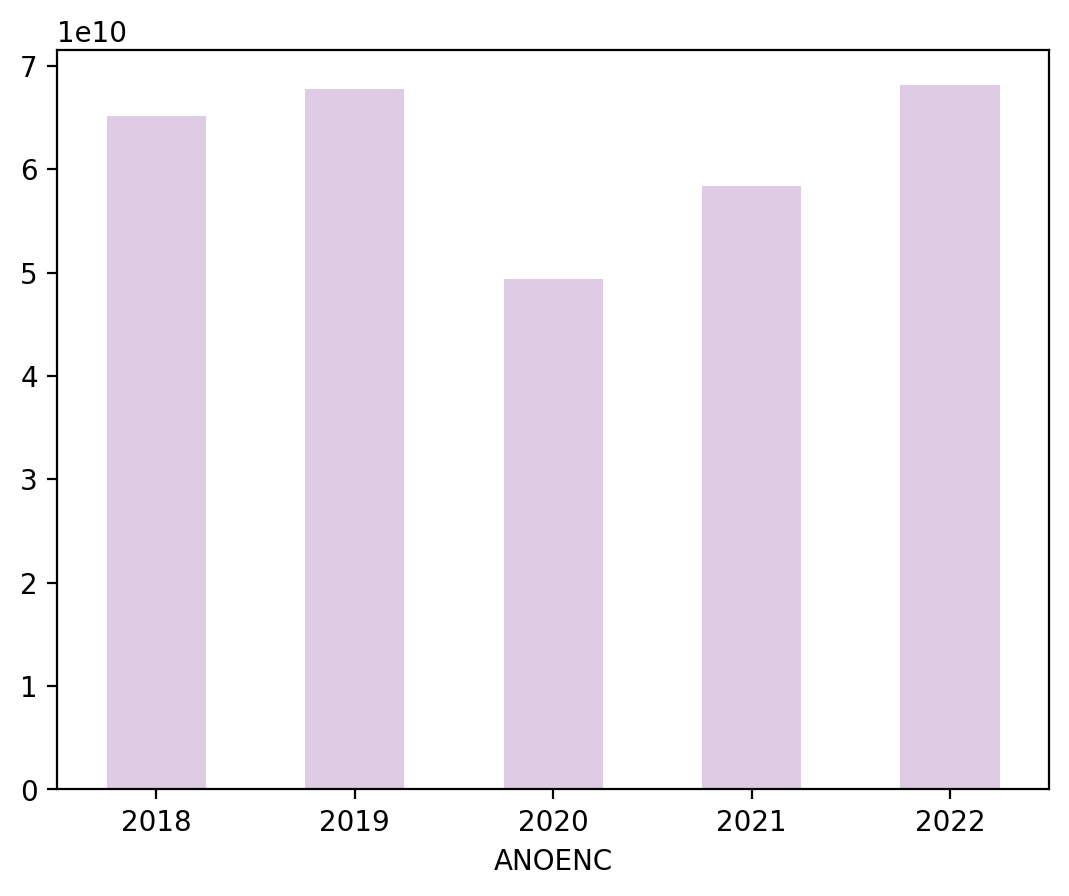

In [78]:
# Plot results
transpExpense.plot( kind = 'bar', rot = 0,
    color = '#decbe4');

In [79]:
# Print numerical results
transpExpense_list = transpExpense.to_list()
for i, year in enumerate(df_dict_keys):
    print(f'Total transportation expenditure in {year}: {transpExpense_list[i]:,}')

Total transportation expenditure in 2018: 65,183,486,461.06
Total transportation expenditure in 2019: 67,711,047,013.6
Total transportation expenditure in 2020: 49,401,141,653.86
Total transportation expenditure in 2021: 58,348,156,121.76
Total transportation expenditure in 2022: 68,093,683,063.63


The second step is to calculate the proportion of total national household expenditures allocated to transportation. 

In [80]:
# Create transportation expenses % column 
df_HBS_all_pop['percentage_transportation'] = (
    df_HBS_all_pop['transportation_expenses'] * 100) / df_HBS_all_pop['GASTOMON']

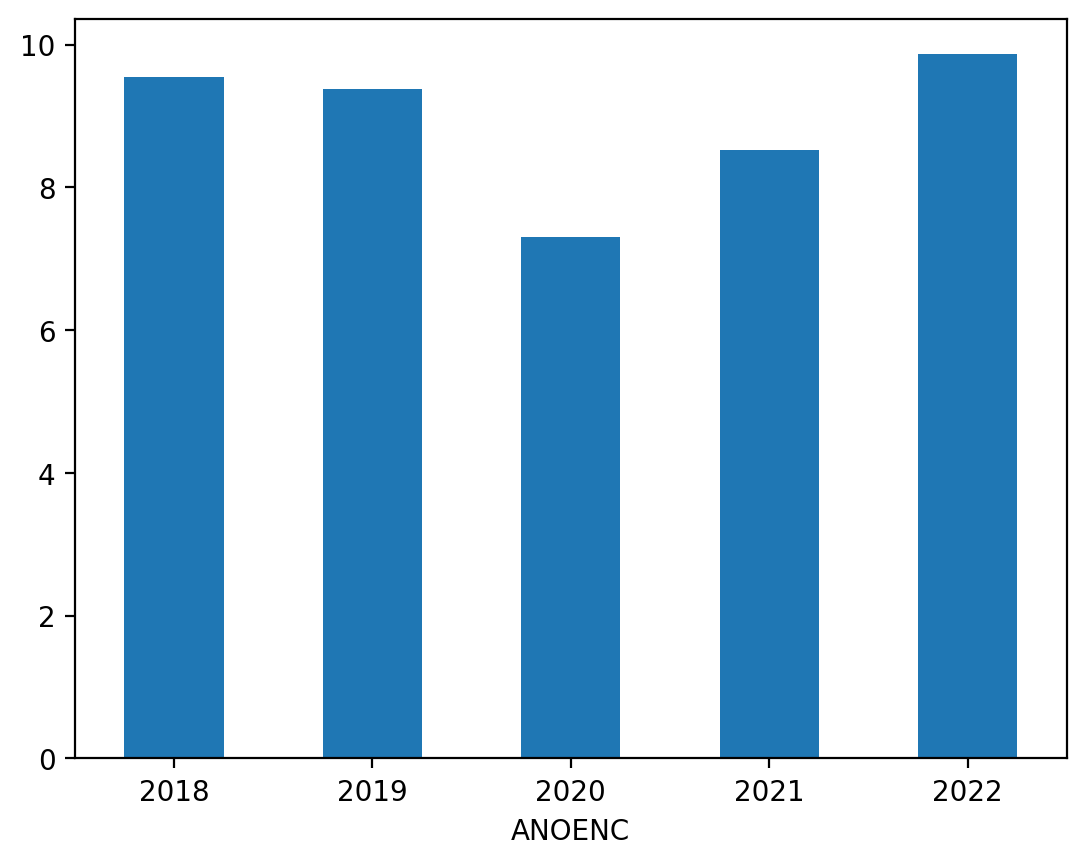

In [81]:
# Plot proportion of total expenditures
transp_perc = df_HBS_all_pop.groupby('ANOENC').percentage_transportation.median()
transp_perc.plot(kind = 'bar', rot = 0);

In [82]:
# Print values
transpPercentage = transp_perc.to_list()
for i, year in enumerate(df_dict_keys):
    print(f'The % of spendings allocated to transportation in {year} was: {transpPercentage[i]:,}')

The % of spendings allocated to transportation in 2018 was: 9.543487363374766
The % of spendings allocated to transportation in 2019 was: 9.376852485566952
The % of spendings allocated to transportation in 2020 was: 7.302061905718368
The % of spendings allocated to transportation in 2021 was: 8.524647554714502
The % of spendings allocated to transportation in 2022 was: 9.861375587247654


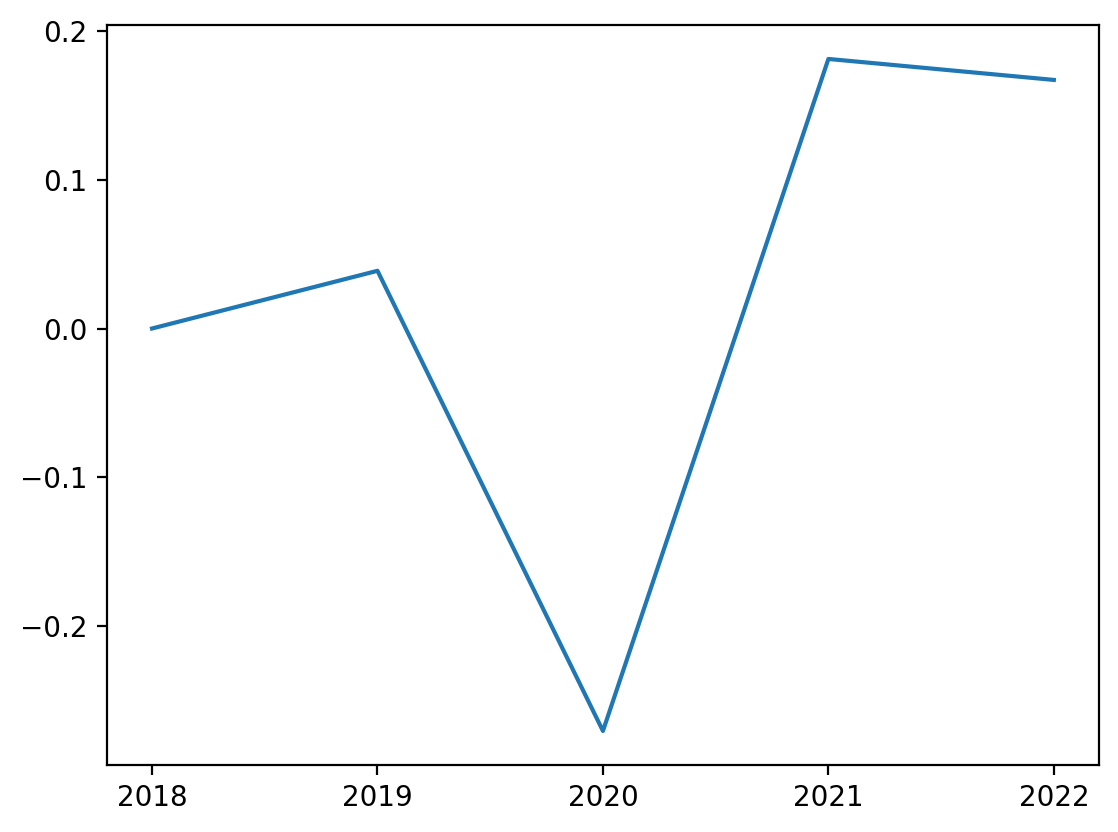

In [83]:
# Calculate year on year change 
relative_change = [0.0]
for i, yearExpense in enumerate(transpExpense_list):
    if i > 0:
        change = (transpExpense_list[i] - transpExpense_list[i-1]) / transpExpense_list[i-1]
        relative_change.append(change)

# Plot year on year change
plt.plot(df_dict_keys, relative_change);

> This plot shows the relative increasing and decreasing changes in the last few years.

**Are Urban inhabitants spending less?**

> This analysis will make use of the dictionaries holding urban data.

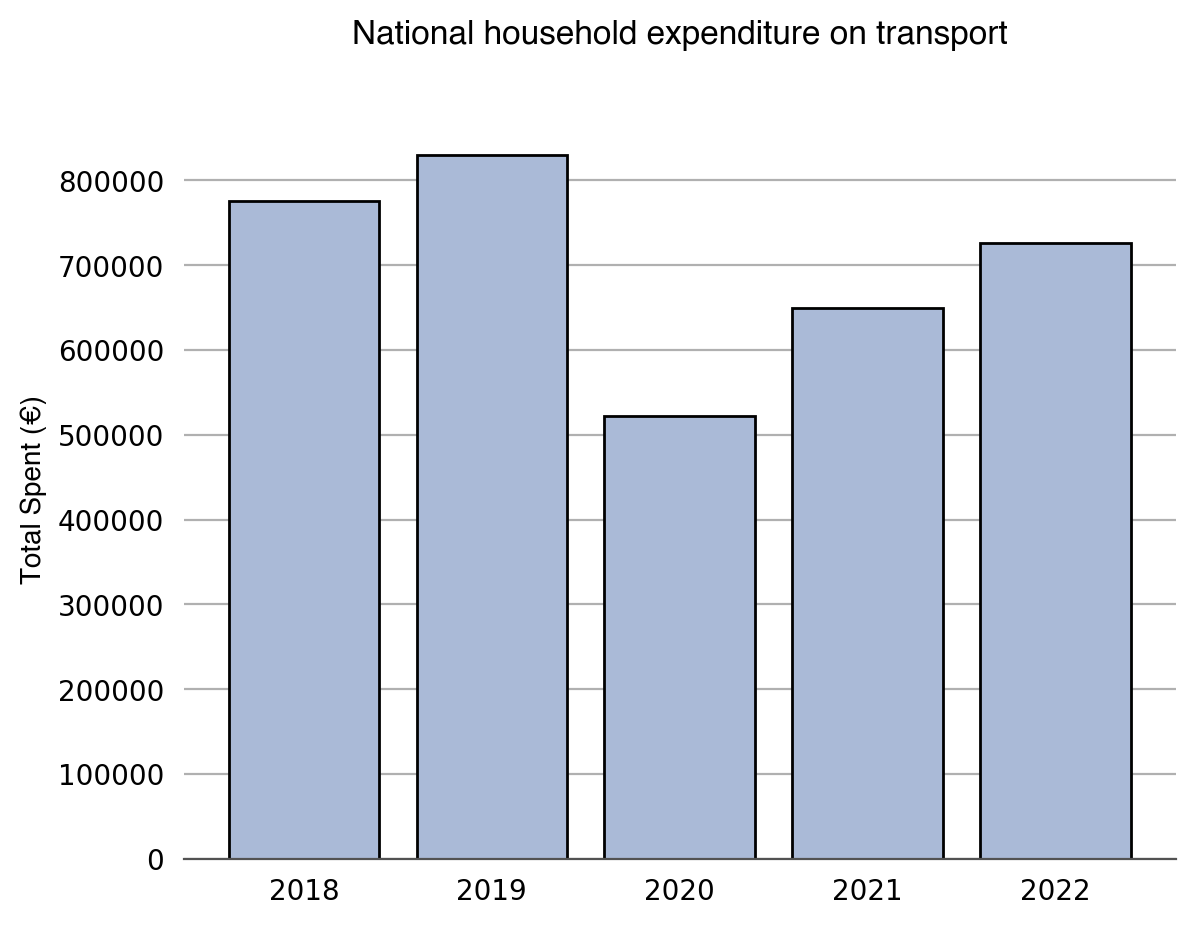

In [214]:
# Create a list with yearly transportation expenses
transpExpense_ = []
for year in df_dict_keys:
    expensesTransp_ = dict_df_HBS_urban[year][transport_codes].sum(axis=1)
    expensesTrransp_yearly_ = expensesTransp_.sum() # Get sum all transp. expenses
    transpExpense_.append(expensesTrransp_yearly_)
fig, ax = plt.subplots()    
ax.bar(df_dict_keys, transpExpense_, color=['#AABAD7'], edgecolor='black');

hfont = {'fontname':'Helvetica'}
#plot

y_label = 'Total Spent (€)'
title_ = 'National household expenditure on transport'
    
# titles
ax.set_ylabel(y_label,  **hfont)
ax.set_title(title_, **hfont, y=1.08)

# Improve grid settings
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#525252')

# Remove ticks
ax.tick_params(bottom=False, left=False)

# Set grid
ax.set_axisbelow(True)
ax.yaxis.grid(True)
ax.xaxis.grid(False)

> Same as the rest of the nation, residents of urban areas were and are on a rising trend of transportation expenditures.

#### 2. _Are we spending more on private cars (purchase and use)?_  

This question was translated to: Have there been significant changes in private car ownership and usage in the last five years?

The variables that could answer these questions imply the purchase or use of private vehicles.  
On the one hand, it could be interesting to see if the amount spent on buying new private cars has changed over the last five years. On the other hand, it could be interesting to look at spending on traditional vs alternative fuels.

Inflation and other economic factors can also affect these purchases, but these will not be considered in this analysis.  

_2.1 Exploration of private car purchases_

This question was answered by comparing the sample's car purchases statistically and the total population purchases visually.

**Statistical Comparison**

The first step is to check if the variables are normally distributed.

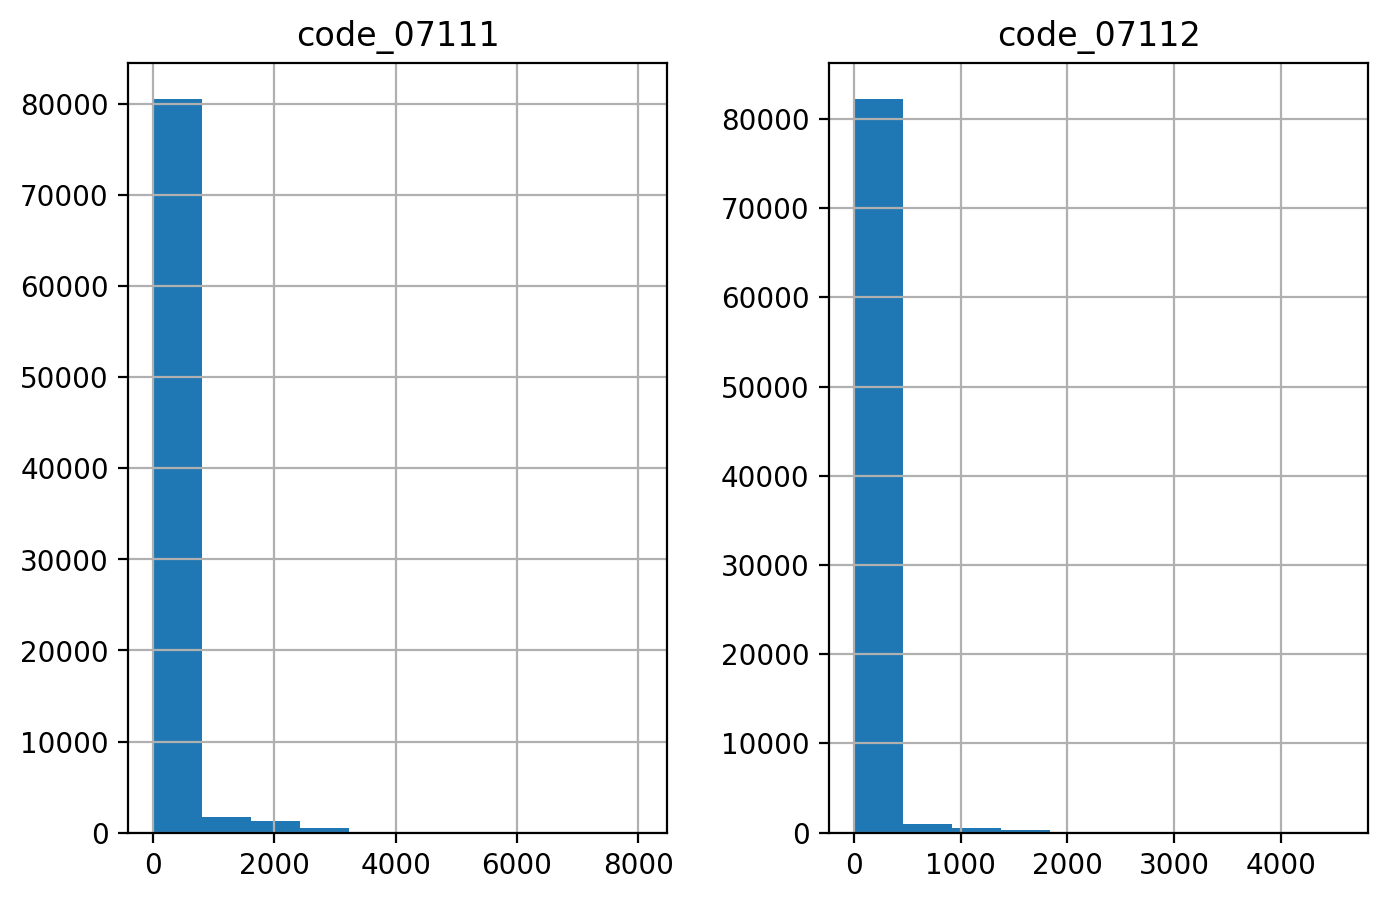

In [85]:
# Plot histogram
code_list_car_purchase = ['code_07111', 'code_07112']
df_HBS_all.hist(column = code_list_car_purchase, figsize = (8,5));

> These right-skewed histograms evidence that the variables are not normally distributed.

The samples from different years will be compared, testing the following hypothesis:  
H<sub>o</sub> = samples belongs to same population  
H<sub>1</sub> = samples do not belong to same population  

As the expenditures did not have normal distributions (shown in the histograms), the H-test was employed to check their differences.  
`The Kruskal-Wallis H-test tests the null hypothesis that the population median of all groups were equal. It is a non-parametric version of ANOVA. The test works on two or more independent samples, which may have different sizes.`

In [86]:
# Test car purchases
stats.kruskal(dict_df_HBS['2018']['code_07111']+ dict_df_HBS['2018']['code_07112'], 
              dict_df_HBS['2019']['code_07111']+ dict_df_HBS['2019']['code_07112'], 
              dict_df_HBS['2020']['code_07111']+ dict_df_HBS['2020']['code_07112'], 
              dict_df_HBS['2021']['code_07111']+ dict_df_HBS['2021']['code_07112'], 
              dict_df_HBS['2022']['code_07111']+ dict_df_HBS['2022']['code_07112'])

KruskalResult(statistic=132.89254601016546, pvalue=9.369323772366223e-28)

>The output shows that the test statistic is 132.89, and the corresponding p-value is 
9.369323772366223e-28 (close to 0).  
>Since the p-value is less than 0.05, we reject the null hypothesis of the H test.  
The test suggests differences in the purchases of cars over the years, but these differences cannot be attributed to the arrival of new mobility ways.

Test to verify the existence of a trend.

Since the expenditures are time series with no seasonality and the values are not so many, the test employed to check for trends is the Mann-Kendall test. This test does not provide information on the magnitude of the trend.  
`The Mann-Kendall statistical test for trend is used to assess whether a set of data values is increasing over time or decreasing over time and whether the trend in either direction is statistically significant.`


In [87]:
# Test car purchases
data = [(dict_df_HBS['2018']['code_07111']+ dict_df_HBS['2018']['code_07112']).sum(), 
              (dict_df_HBS['2019']['code_07111']+ dict_df_HBS['2019']['code_07112']).sum(), 
              (dict_df_HBS['2020']['code_07111']+ dict_df_HBS['2020']['code_07112']).sum(), 
              (dict_df_HBS['2021']['code_07111']+ dict_df_HBS['2021']['code_07112']).sum(), 
              (dict_df_HBS['2022']['code_07111']+ dict_df_HBS['2022']['code_07112']).sum()]
pymannkendall.original_test(data)

Mann_Kendall_Test(trend='no trend', h=False, p=0.80649594050734, z=-0.2449489742783178, Tau=-0.2, s=-2.0, var_s=16.666666666666668, slope=-75721.66038308726, intercept=2025576.5738926064)

>The result is that there is no evidence to affirm there is a trend.

**Visual inspection**

In [88]:
# Get total population expenditures using spatial weight and multiplying by 12
def getExpenses(dict_:dict, years:list, codeList:list, Factor:str):
        '''
        INPUT: 
        dict_- Dictionary with DataFrames
        years - list of years to analize
        codeList - list with codes to be added
        Factor - spatial weight


        OUTPUT: 
        series expenses of anual expenses (multiplied by 12) 
        for whole population (multiplied by factor).
        '''
        # creation of series
        total_expenses_list = []
        for year in years:
                total_expense_year = 0
                if len(codeList) == 1:
                        anual_expense1 = (dict_[year][codeList[0]]* 12)*(
                                dict_[year][Factor])
                        total_expense_year = anual_expense1.sum()
                        total_expenses_list.append(total_expense_year)
                else:
                        for i in range(len(codeList)):
                                anual_expense1 = (dict_[year][codeList[i]]* 12)*(
                                        dict_[year][Factor])
                                total_expense_1 = anual_expense1.sum()
                                total_expense_year += total_expense_1
                        total_expenses_list.append(total_expense_year)
        print(total_expenses_list)
        colors = ['#7fc97f', '#beaed4', '#fdc086','#386cb0']
        plt.bar(years,total_expenses_list, color = random.choice(colors));
        return total_expenses_list

[21045368607.239998, 23105188648.899998, 17177735689.48, 18691055897.22, 19989635903.27]


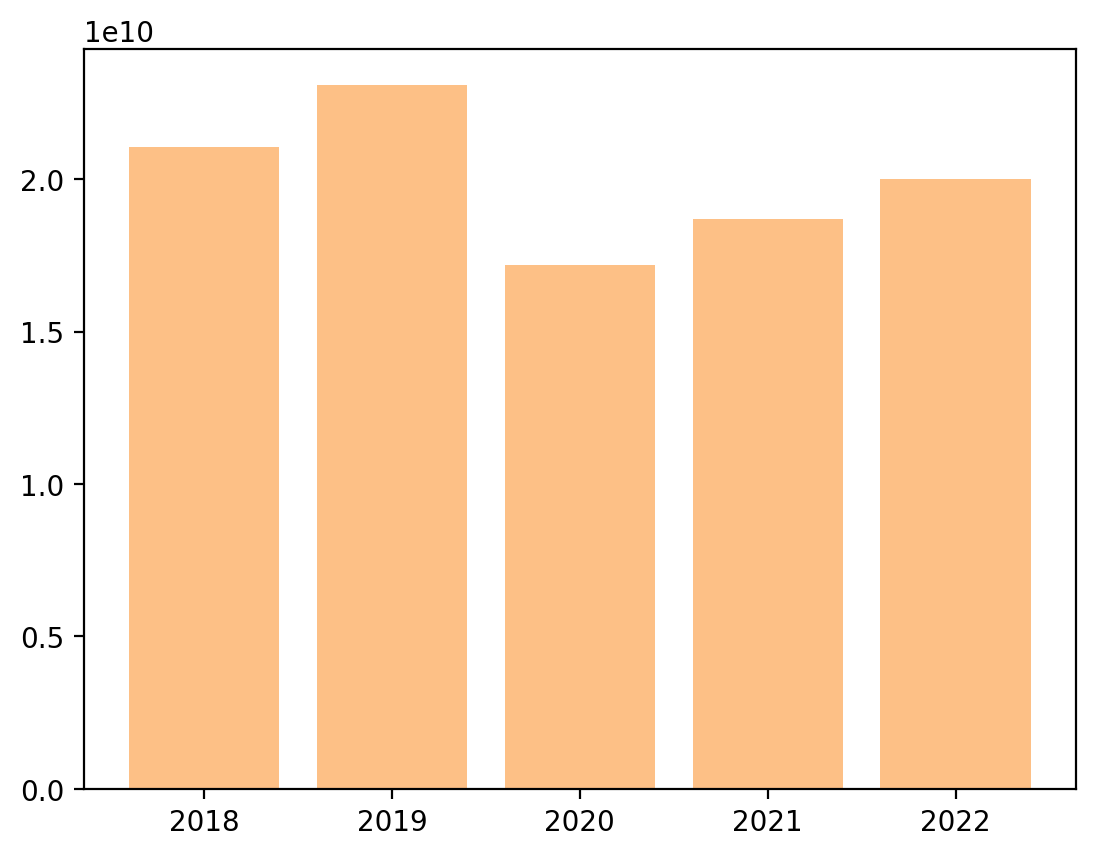

In [89]:
# Get total spending on car purchase for total population
code_list_car_purchase = ['code_07111', 'code_07112']
total_expenses_privateCar = getExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_car_purchase, 'FACTOR_y')

In [90]:
# Test function
expenses = dict_df_HBS_all_expenses['2018'][dict_df_HBS_all_expenses['2018']['CODIGO'] == '07111']
expenses_ = dict_df_HBS_all_expenses['2018'][dict_df_HBS_all_expenses['2018']['CODIGO'] == '07112']
x = expenses.GASTOMON.sum()
y = expenses_.GASTOMON.sum()
x+y

expenses = dict_df_HBS_all_expenses['2022'][dict_df_HBS_all_expenses['2022']['CODIGO'] == '07111']
expenses_ = dict_df_HBS_all_expenses['2022'][dict_df_HBS_all_expenses['2022']['CODIGO'] == '07112']
x = expenses.GASTOMON.sum()
y = expenses_.GASTOMON.sum()
x+y

19989635903.27

From the visual inspection, one cannot tell that expenditures on private cars are decreasing. On the contrary, the amount spent rose before COVID-19 dropped then and now is on another rising trend. This plot displays the amount spent on new and old cars, not the number of vehicles purchased.

**How about urban areas?**

[3408740111.87, 4121514400.6099997, 2602444990.7000003, 3466828505.49, 3280525463.6600003]


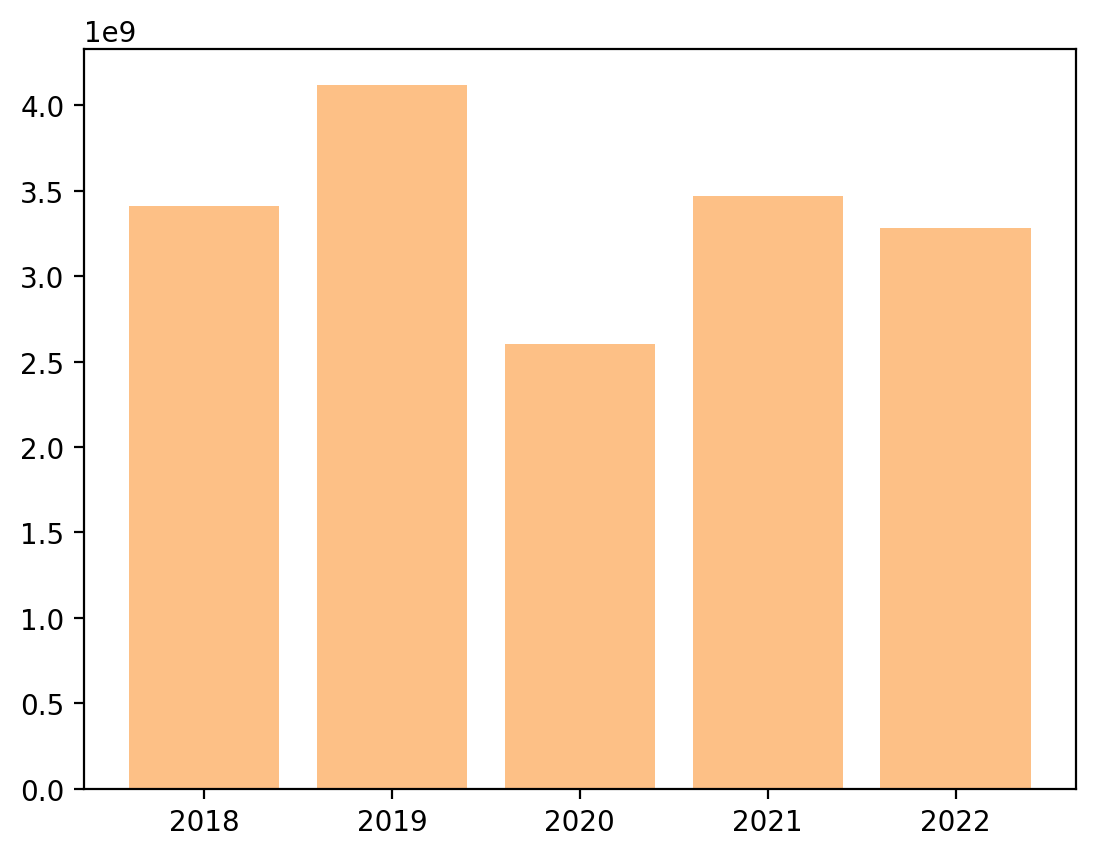

In [91]:
# Get total spending on car purchase for urban population
code_list_car_purchase = ['code_07111', 'code_07112']
urban_expenses_privateCar = getExpenses(dict_df_HBS_urban, dict_df_HBS_urban.keys(), 
                                        code_list_car_purchase, 'FACTOR_y')

In [92]:
# Print numerical results
for i, year in enumerate(df_dict_keys):
    print(f'The total expenditures in car purchases in {year} was: {urban_expenses_privateCar[i]:,}')

The total expenditures in car purchases in 2018 was: 3,408,740,111.87
The total expenditures in car purchases in 2019 was: 4,121,514,400.6099997
The total expenditures in car purchases in 2020 was: 2,602,444,990.7000003
The total expenditures in car purchases in 2021 was: 3,466,828,505.49
The total expenditures in car purchases in 2022 was: 3,280,525,463.6600003


> Urban areas show different purchases tendencies than the overall population.

_2.2 Exploration of traditional vs. alternative fuels expenditure_

This question was answered by comparing the spending on traditional and alternative fuels for the whole population.

**Visual inspection**

[23562759126.910004, 23852994414.939995, 16166396462.050001, 20925365048.08, 27012945039.670002]


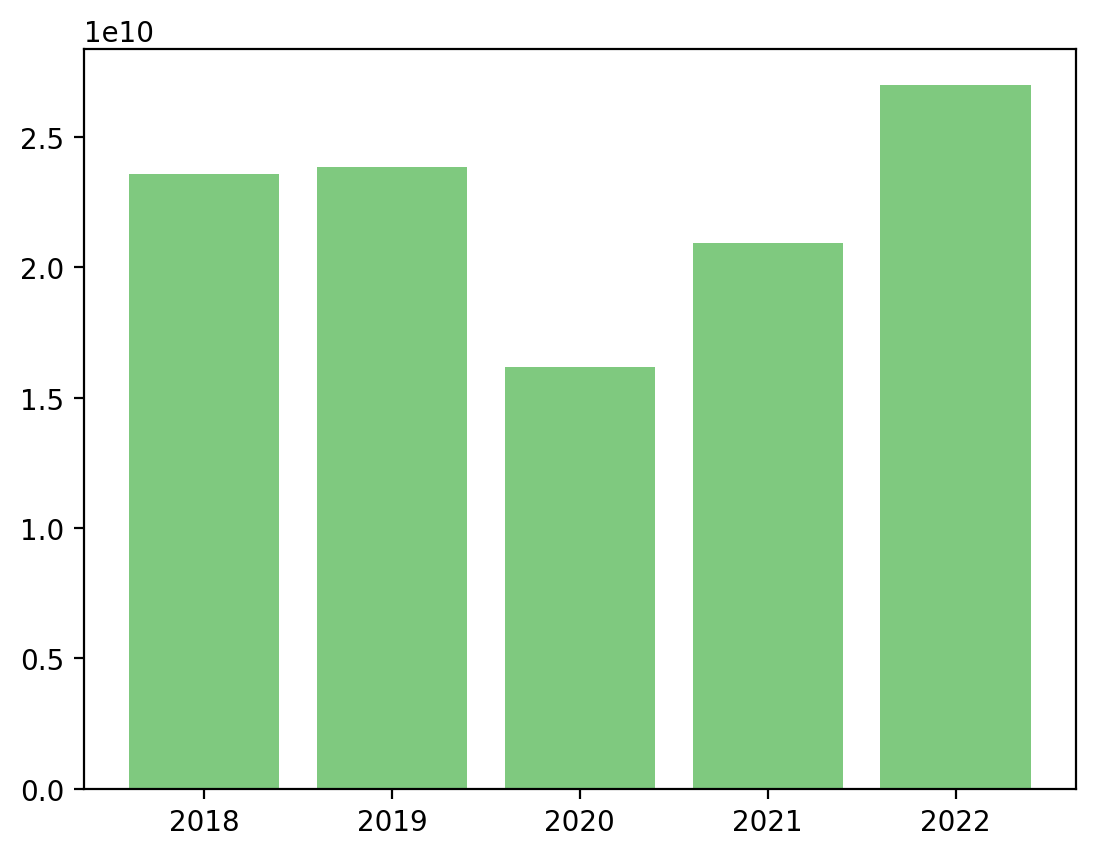

In [93]:
# Traditional fuel expenditure
code_list_fuel = ['code_07221', 'code_07222']
total_expenses_fuel = getExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_fuel, 'FACTOR_y')

> This plot shows the same tendencies seen in previous charts, rising before and after COVID-19. In this case, the total spent on fuel in 2018 and 2019 were quite similar.

[17491495.34, 14587018.91, 33094679.630000003, 34270898.09, 50878726.39]


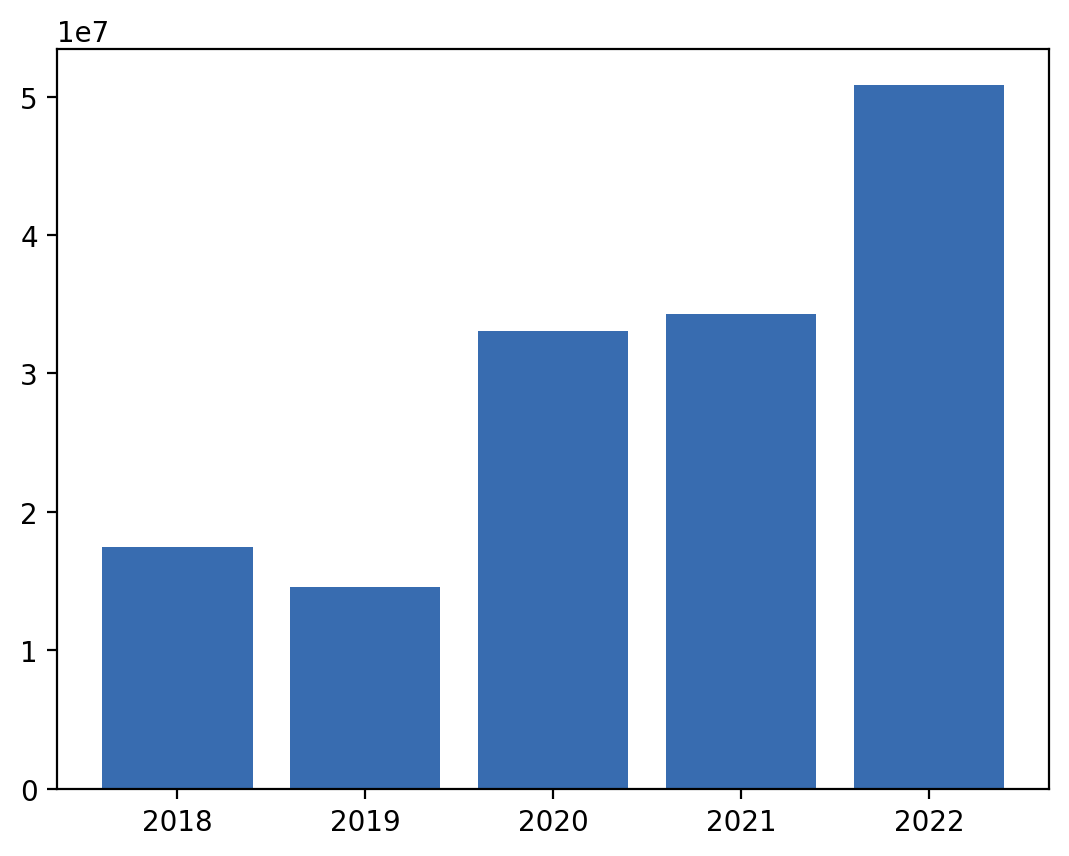

In [94]:
# Alternative fuels
code_list_alternative = ['code_07223']
total_expenses_altFuel = getExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_alternative, 'FACTOR_y')

This plot shows a different history. This plot shows an increase in the purchase of alternative fuels over the years.  Inflation most likely plays a considerable role here.  
It is essential to notice that the fuel spending is around 1x10^<sup>10</sup> and alternative fuel spending 1x10^<sup>7</sup>.

**Urban Areas**

[4098692583.51, 4044966716.63, 2669752074.41, 3401878729.8999996, 4306765596.54]


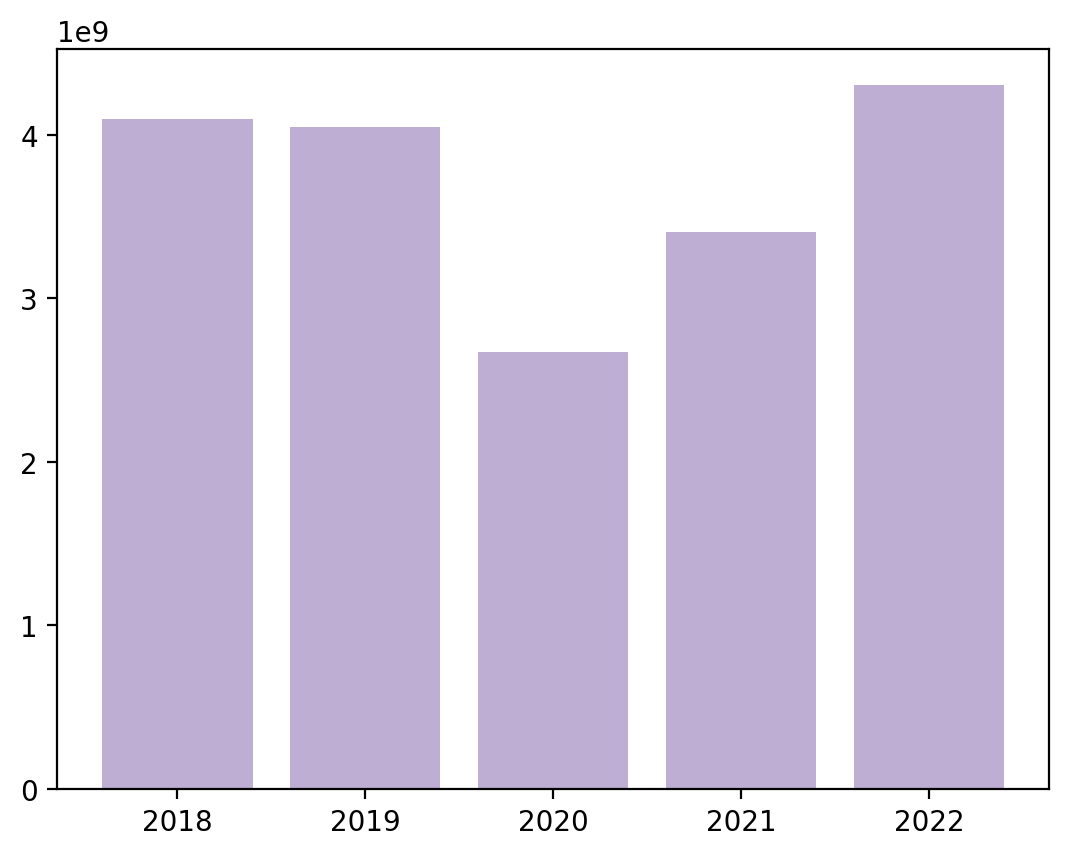

In [95]:
# Get total spending on car usage for urban population
total_expenses_fuel_urban = getExpenses(dict_df_HBS_urban, dict_df_HBS_urban.keys(), 
                                        code_list_fuel, 'FACTOR_y')

> After COVID-19, the trend is similar to the rest of the population.

[1517.37, 3241583.3600000003, 16725402.219999999, 10528674.94, 10000681.969999999]


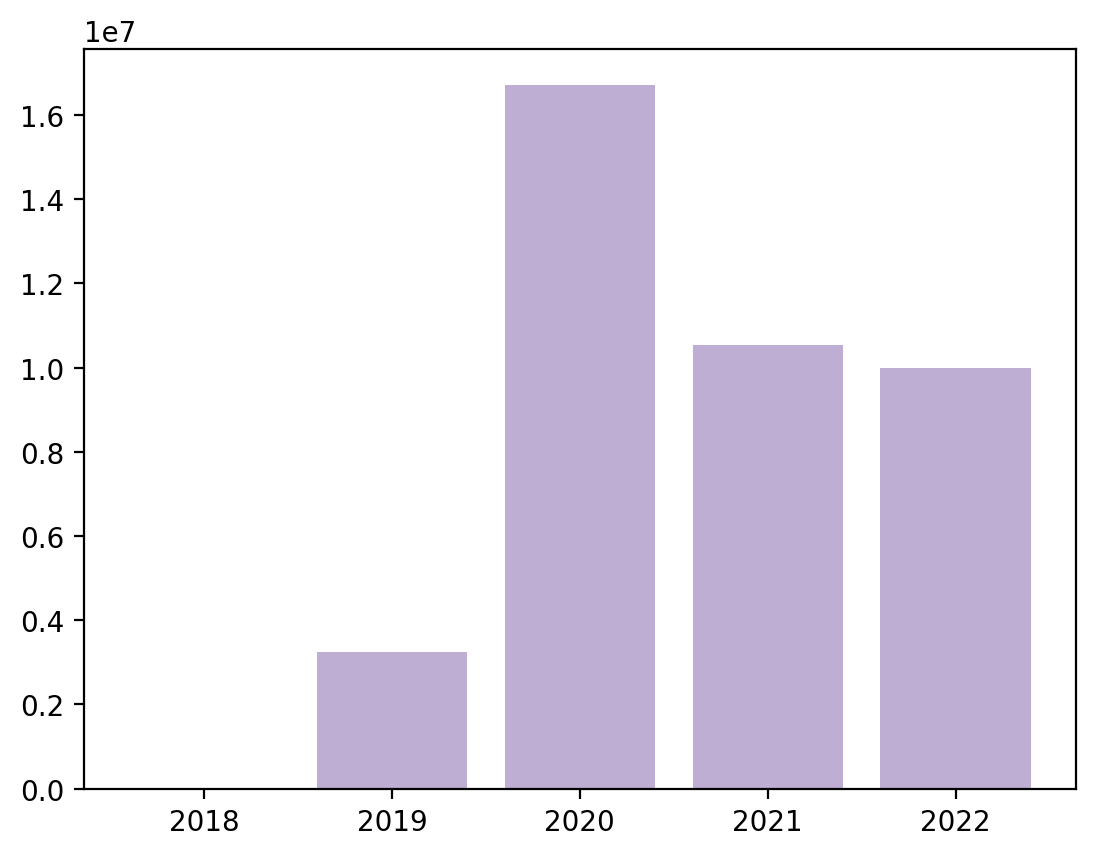

In [96]:
# Get alternative fuel spending- urban
total_expenses_fuel_urban = getExpenses(dict_df_HBS_urban, dict_df_HBS_urban.keys(), 
                                        code_list_alternative, 'FACTOR_y')

> Regarding alternative fuels, urban areas show different movements from the rest of the population.

*2.3 Exploration of driving licenses and private vehicle circulatory tax expenditure.*

**Statistical Comparison**

In [97]:
# Test driving licences
stats.kruskal(dict_df_HBS['2018']['code_07244'], 
                dict_df_HBS['2019']['code_07244'], 
                dict_df_HBS['2020']['code_07244'], 
                dict_df_HBS['2021']['code_07244'], 
                dict_df_HBS['2022']['code_07244'])

KruskalResult(statistic=210.59056297640277, pvalue=1.983144069643113e-44)

The output shows that the test statistic is 210.59, and the corresponding p-value is 1.983144069643113e-44.
Since the p-value is less than .05, we reject the null hypothesis of the H test.  
The tests suggest differences in the obtention of driving licenses over the years, but these differences cannot be attributed to the arrival of new mobility ways.

**Visual inspection**

[873234738.3199999, 1002134778.8400002, 772427439.62, 1016163116.2800001, 951832964.51]


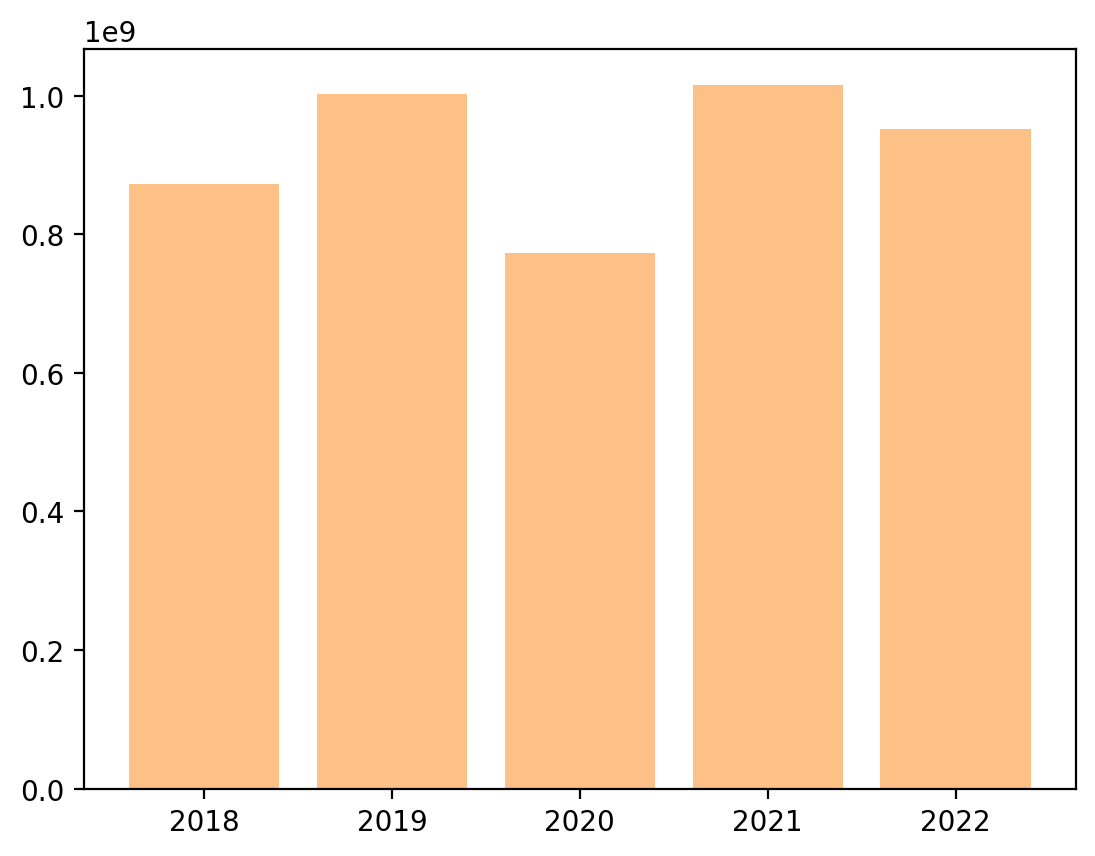

In [98]:
# Driving licenses expenditures 
code_list_driving = ['code_07244']
total_expenses_drivngLicence = getExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_driving, 'FACTOR_y')

This plot shows a steep rise before COVID-19. Then up in 2021, reaching even higher amounts than 2019, and surprisingly dropping in 2022.

[640135606.54, 648682078.17, 626279699.26, 672186639.7, 705255389.73]


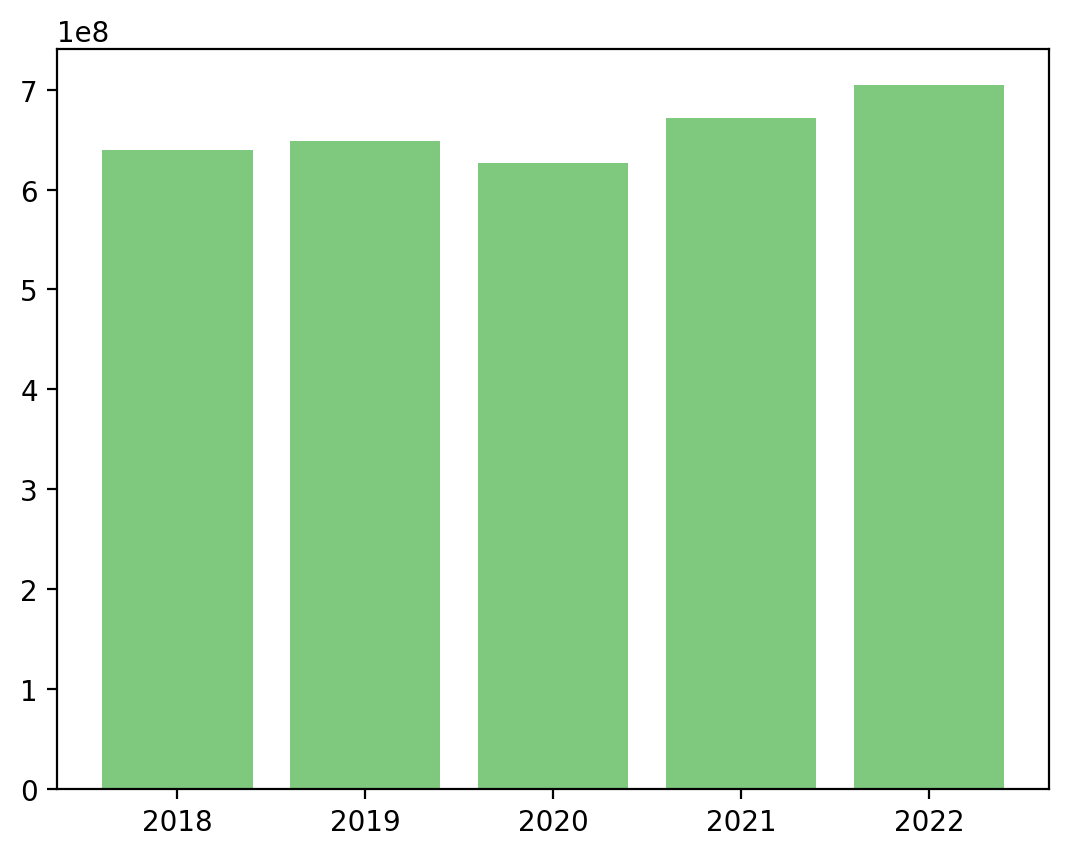

In [99]:
# Circulatory tax expenditures
code_list_ITV = ['code_07245']
total_expenses_ITV = getExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_ITV, 'FACTOR_y')

*2.4 Has the share of income spent on owning and running motor vehicles changed over the years?*

The percentage of income spent on owning and running motor vehicles is presented below.

In [100]:
# Create list with codes that imply car expenses 
private_car_expenses = ['code_07111', 'code_07112',
                        'code_07211', 'code_07212',
                        'code_07213', 'code_07221', 
                        'code_07222', 'code_07223',
                        'code_07224', 'code_07230',
                        'code_07242', 'code_07245']

In [101]:
# Create car mobility variable (purchase + usage expenses + maintenance)                        
for i, year in enumerate(df_dict_keys):
    dict_df_HBS[year]['carMobility'] = dict_df_HBS[year][private_car_expenses].sum(axis=1)

In [102]:
# Look at basic income statistics 
dict_df_HBS[year]['IMPEXAC'].describe()

count    16997.000000
mean      2560.260928
std       1421.015584
min          0.000000
25%       1650.000000
50%       2300.000000
75%       3226.000000
max      17000.000000
Name: IMPEXAC, dtype: float64

In [103]:
# Get share of income spent on 'owning and running motor vehicles'
income_percentage = []
for year in df_dict_keys:
    dict_df_HBS[year].loc[:,'percentage_income'] = (
        dict_df_HBS[year]['carMobility'] * 100).div(dict_df_HBS[year]['IMPEXAC'])

In [104]:
# Print mean percentage of income for all years
for year in df_dict_keys:
    print(dict_df_HBS[year].loc[:,'percentage_income'].quantile(0.25))

1.6476384424774697
1.3120880766900063
0.3871456989065749
0.3998914919195732
0.4192491427117642


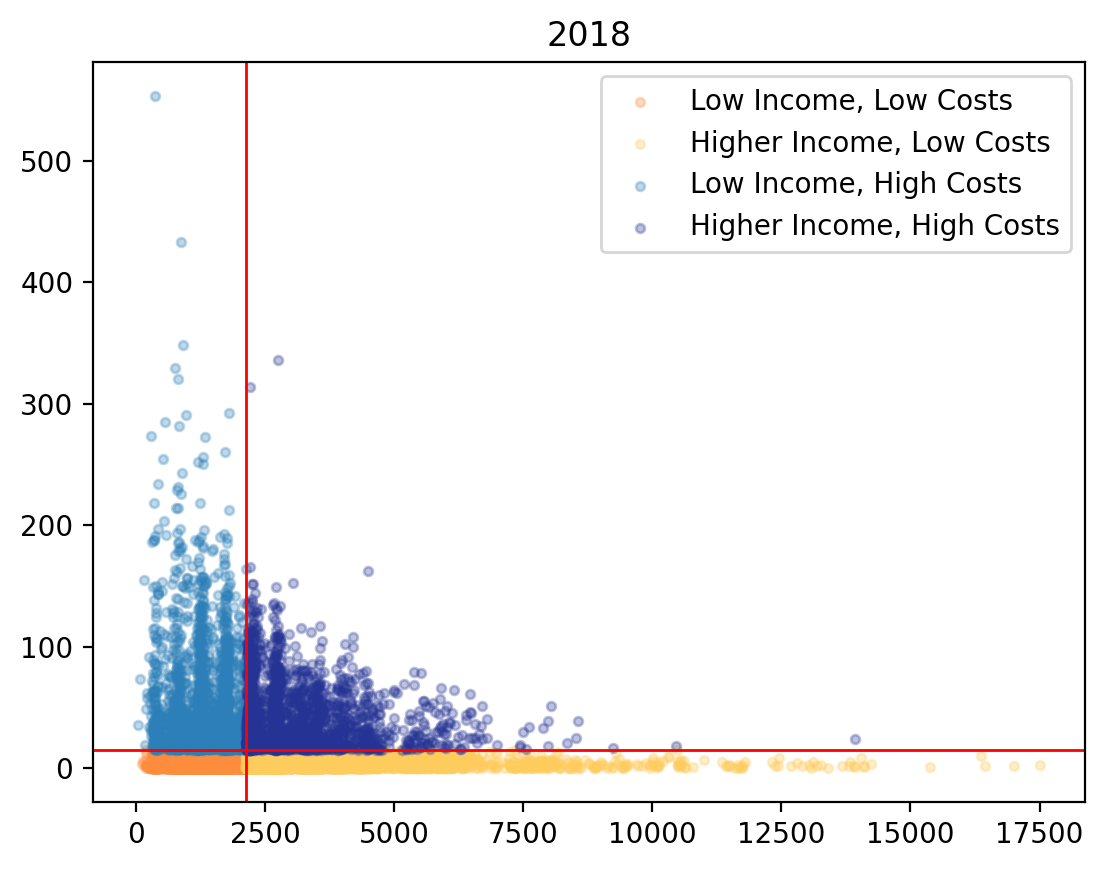

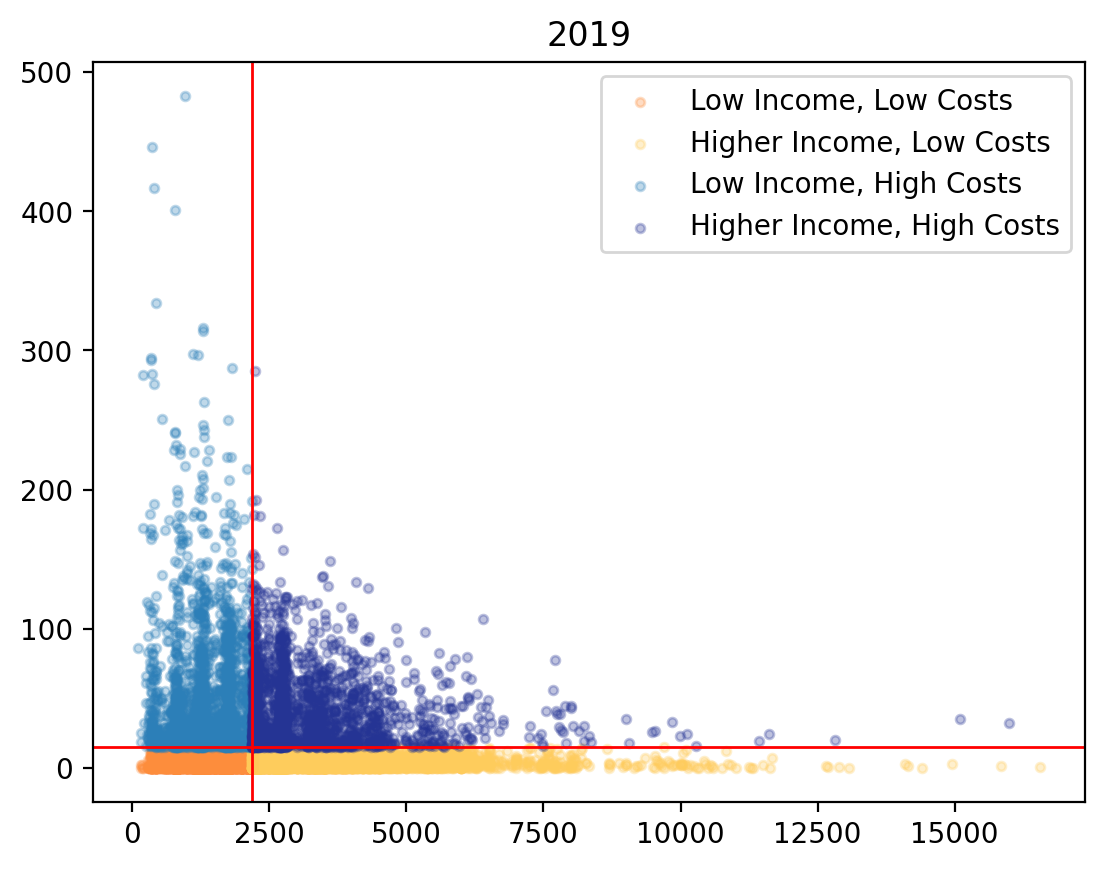

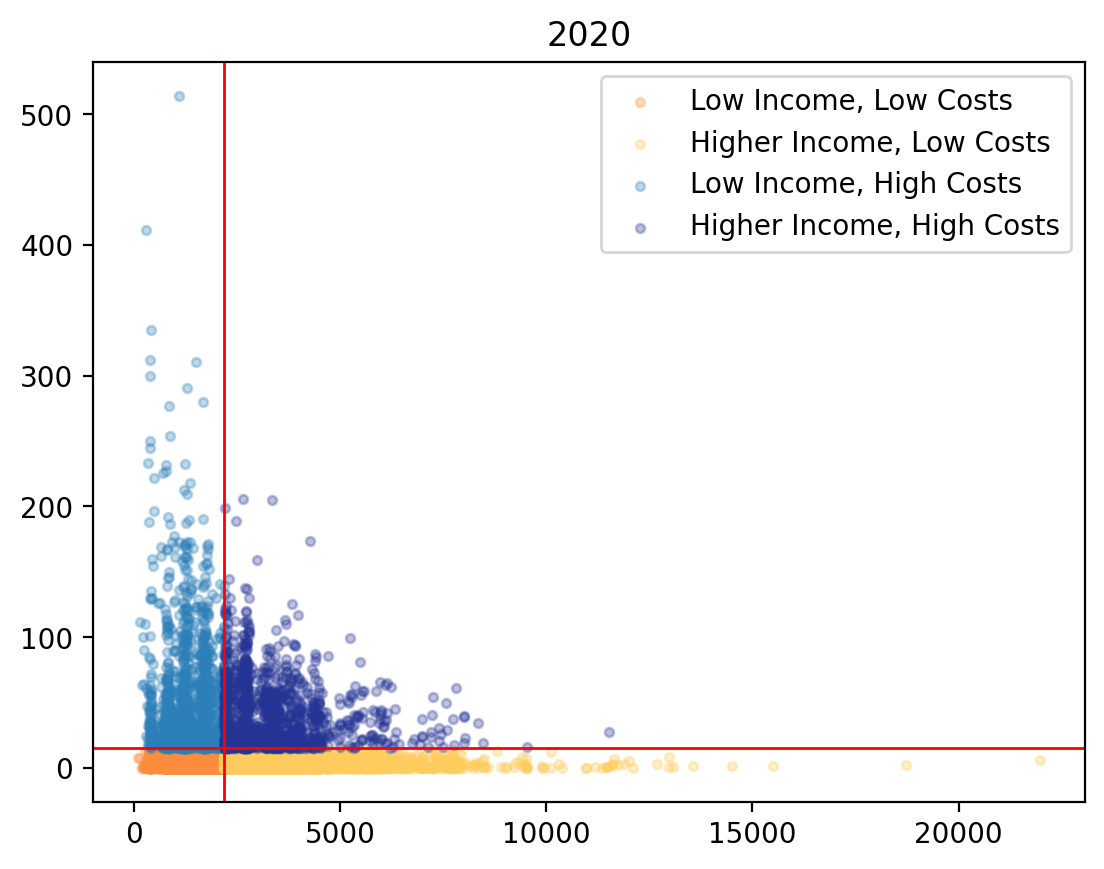

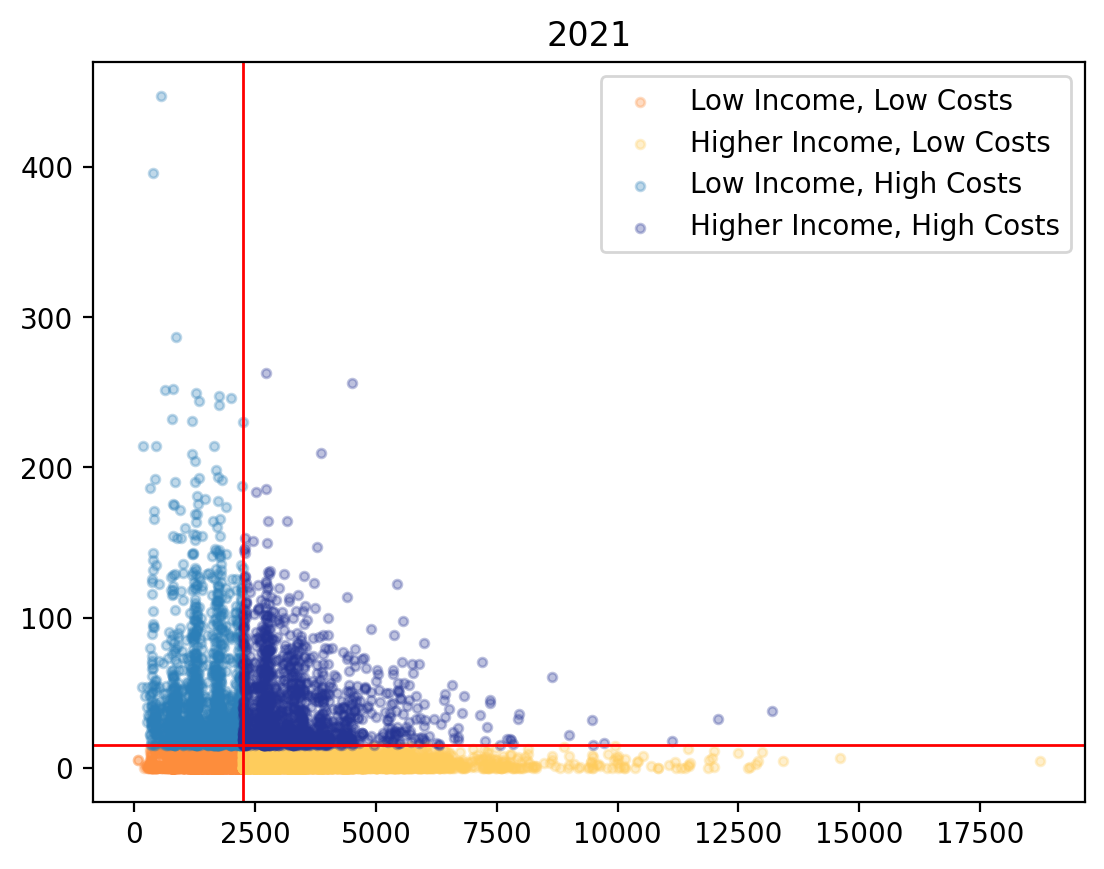

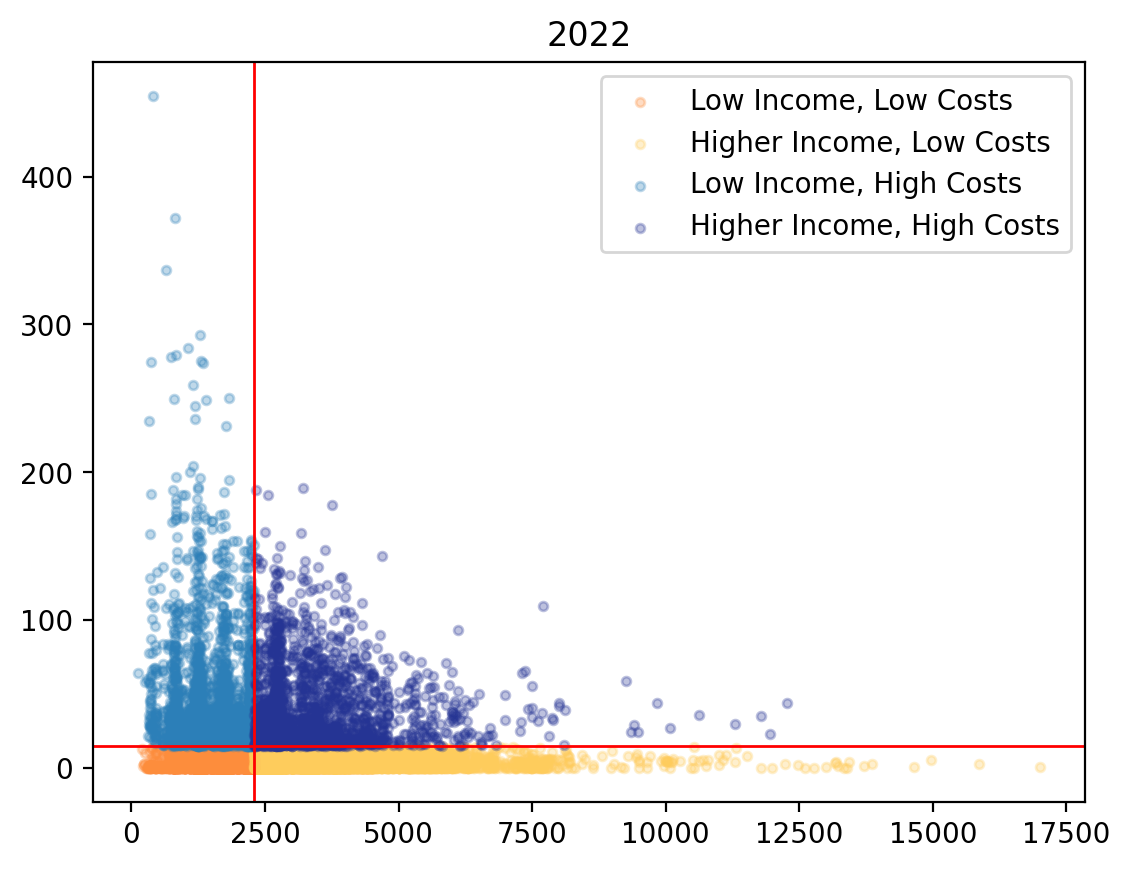

In [105]:
# Plot
values_ = []
for year in df_dict_keys:
    val = scatter_plot(dict_df_HBS, year)
    values_.append(val)

In [106]:
# Look at 2022 plot conditions
year_2022 = values_[4]; year_2022
for i in range(4):
    for pair in year_2022[i]:
        print(pair.count())

8569
11796
8428
11796
8569
5192
8428
5192


In [107]:
# Look at median
dict_df_HBS['2022']['IMPEXAC'].median()

2300.0

**Urban Areas**

In [108]:
# Create car mobility variable (urban areas)
for i, year in enumerate(df_dict_keys):
    dict_df_HBS_urban[year]['carMobility'] = dict_df_HBS_urban[year][private_car_expenses].sum(axis=1)

In [109]:
# Get the share of income spent on 'owning and running motor vehicles' (urban areas)
income_percentage = []
for year in df_dict_keys:
    dict_df_HBS_urban[year].loc[:,'percentage_income'] = (
                                                dict_df_HBS_urban[year]['carMobility'] * 100) \
                                                / dict_df_HBS_urban[year]['IMPEXAC']

In [110]:
for year in df_dict_keys:
    print(dict_df_HBS_urban[year].loc[:,'percentage_income'].quantile(0.75))

9.117779405135238
9.600934459317262
6.306043323896232
7.978529291426728
10.107203324489127


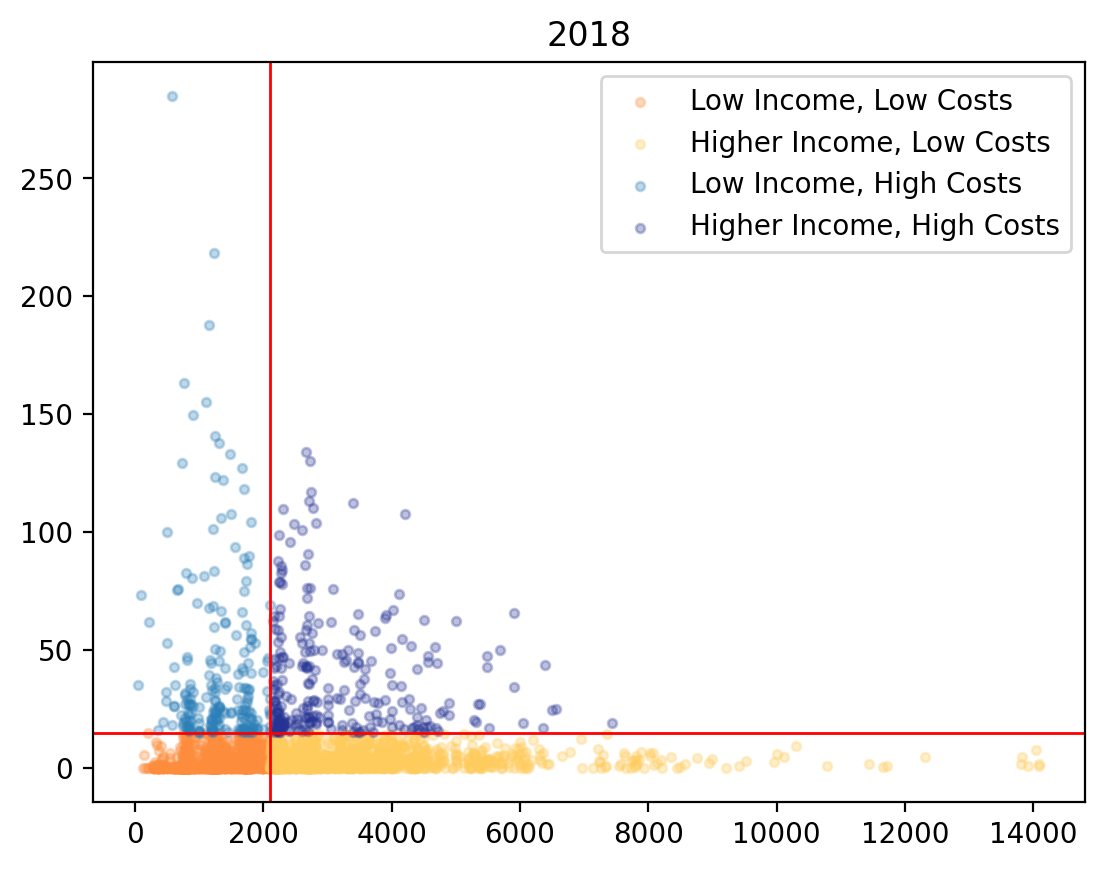

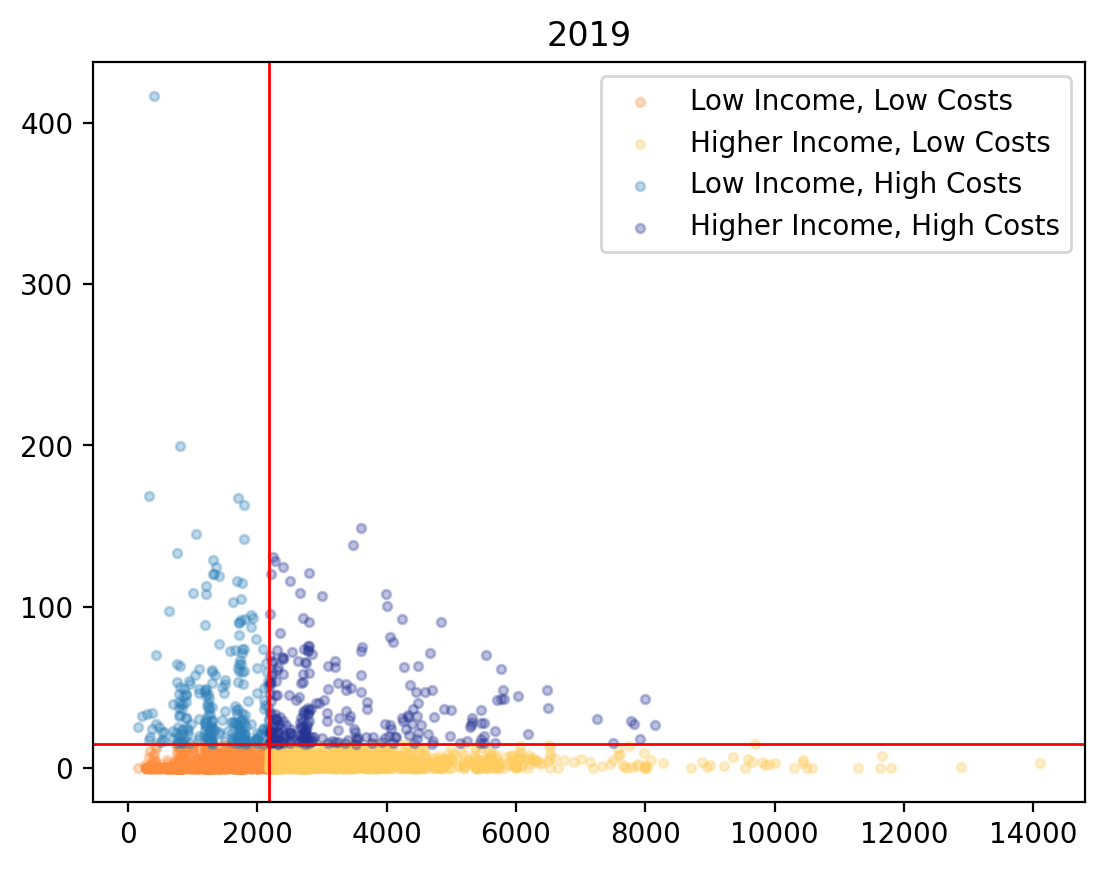

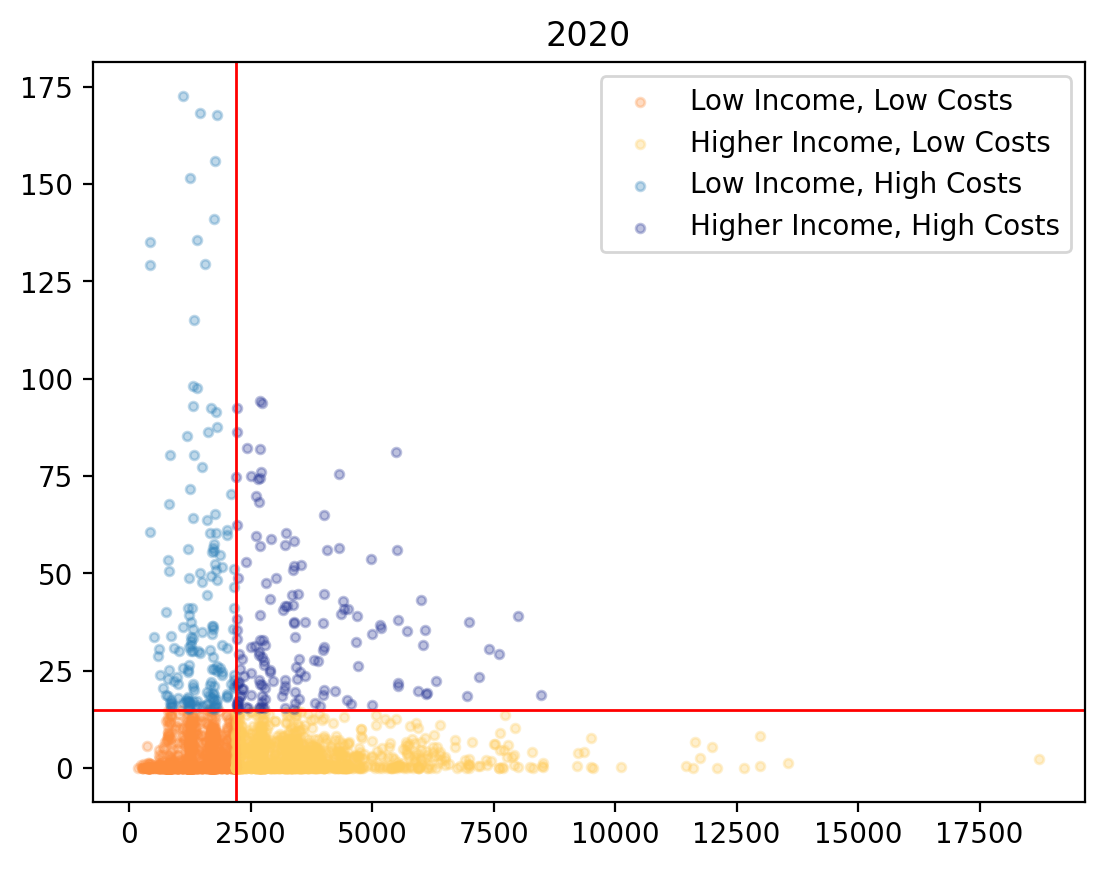

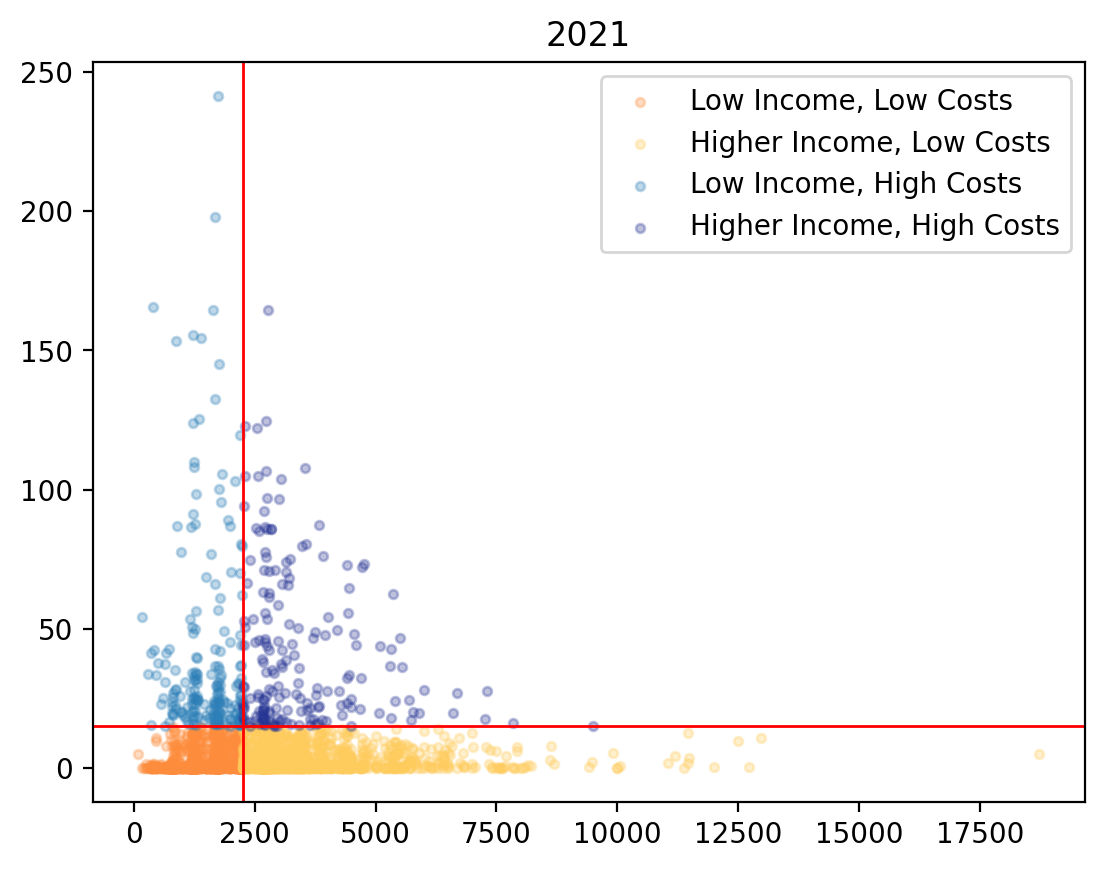

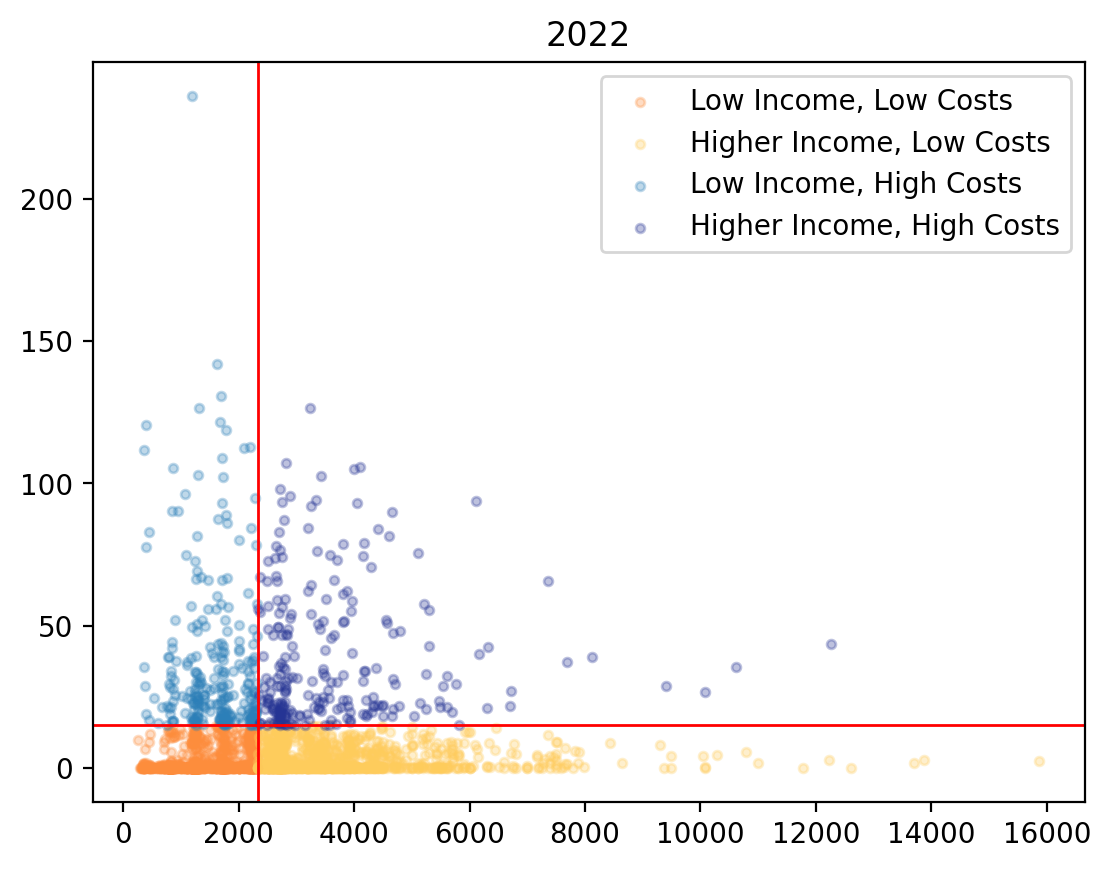

In [111]:
for year in df_dict_keys:
    scatter_plot(dict_df_HBS_urban, year)

#### 3. *Is the use of Personal Mobility Vehicles (kickscooters, bikes, etc.) rising?*

*3.1 Exploration of personal mobility vehicle purchases.*

**Statistical Comparison**

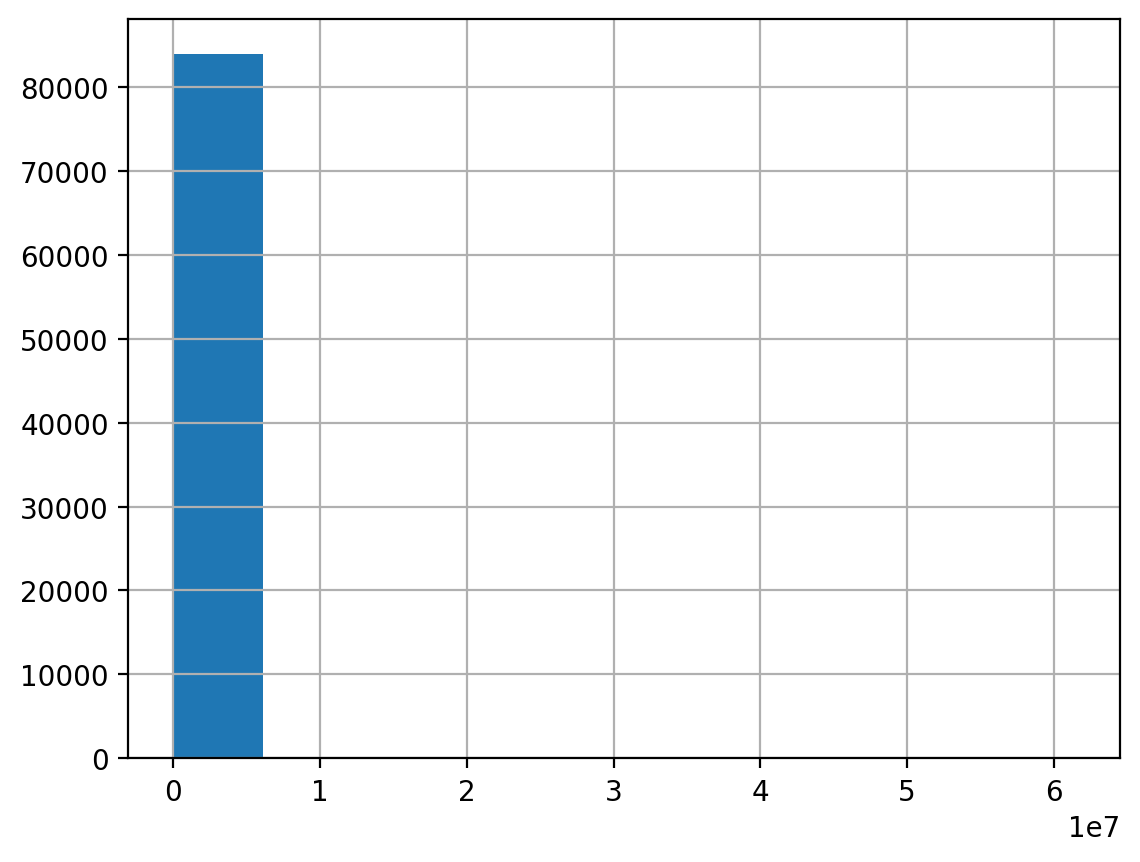

In [112]:
# Look at histograms
df_HBS_all_pop['code_07120'].hist();

> Plots from different years showed right-skewed histograms for PMV purchases.

The samples from different years will be compared, testing the following hypothesis:  
H<sub>o</sub> = samples belongs to same population  
H<sub>1</sub> = samples do not belong to same population  

As before, the test employed to check their differences is the H-test.  

In [113]:
# Test personal mobility purchases 
stats.kruskal(dict_df_HBS['2018']['code_07120'], 
              dict_df_HBS['2019']['code_07120'], 
              dict_df_HBS['2020']['code_07120'], 
              dict_df_HBS['2021']['code_07120'], 
              dict_df_HBS['2022']['code_07120'])

KruskalResult(statistic=46.69587523126043, pvalue=1.7643376833730408e-09)

>The output shows that the test statistic is 46.70, and the corresponding p-value is 
1.7643376833730408e-09 (close to 0).  
>Since the p-value is less than 0.05, we reject the null hypothesis of the H test.  
The tests suggest significant differences in the purchases of PMV over the years.

**Visual inspection**

[1086993492.85, 1676430003.53, 1211877694.85, 1473865811.0600002, 1551879649.7300003]


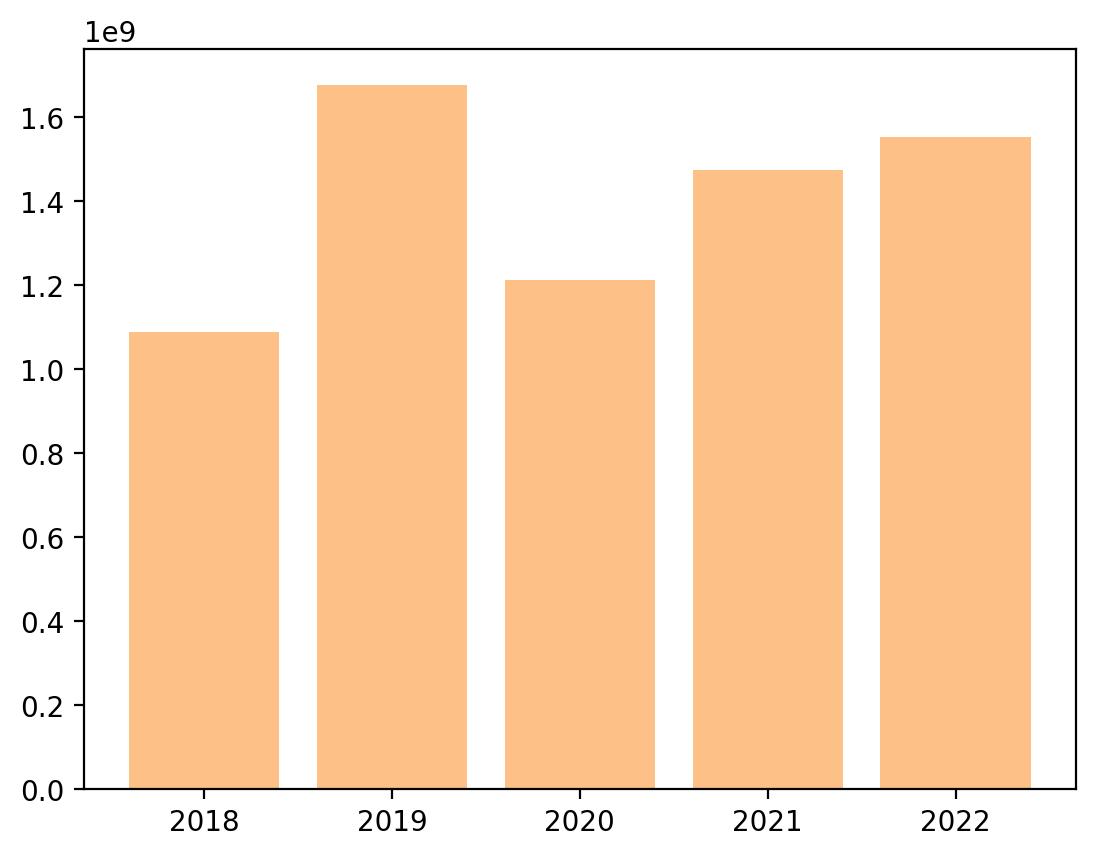

In [114]:
# Plot bikes and personal mobility vehicles purchases (total population)
code_list_PMV = ['code_07120', 'code_07130']
total_expenses_PMV = getExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_PMV, 'FACTOR_y')

>The personal mobility vehicles (scooter, bikes electric bikes, etc.) were the only expenditure that did not have its lowest value in 2020. As shown, the values of 2020 compared to 2019 were lower but not compared to 2018.

**Urban Areas**

[210858053.3, 475336531.98, 260217517.83999997, 338038661.47, 306816245.59000003]


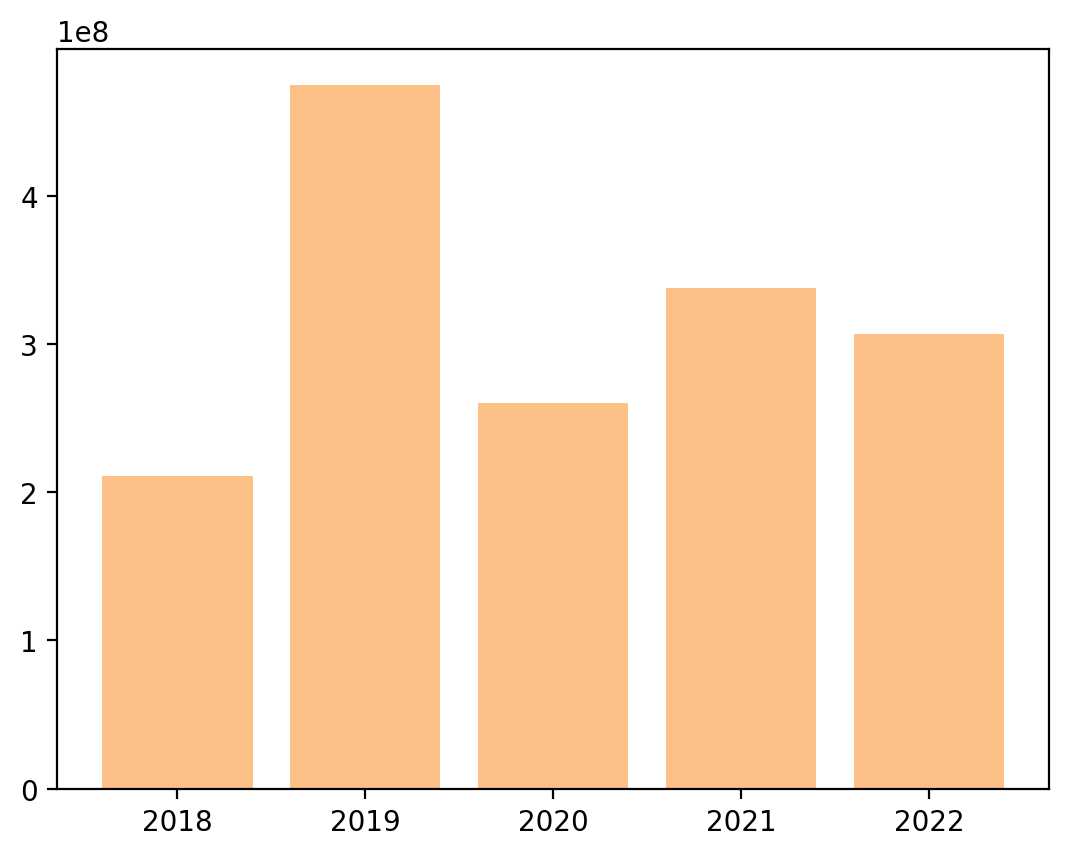

In [115]:
# Plot personal mobility purchases (urban population)
code_list_PMV = ['code_07120', 'code_07130']
urban_expenses_PMV = getExpenses(dict_df_HBS_urban, dict_df_HBS.keys(), 
                                        code_list_PMV, 'FACTOR_y')

> Urban areas showed different PMV purchase tendencies. Both share an increase in purchases from 2019 and a drop during COVID-19. Opposed to the rest of the population, the rising movement did not continue up until 2022.

#### 4. _Are we spending more on public transportation?_

_4.1 Exploration of public transportation individual and combined tickets_

[1203363424.5300002, 1138884456.42, 552074697.21, 645311742.3, 749966903.99]


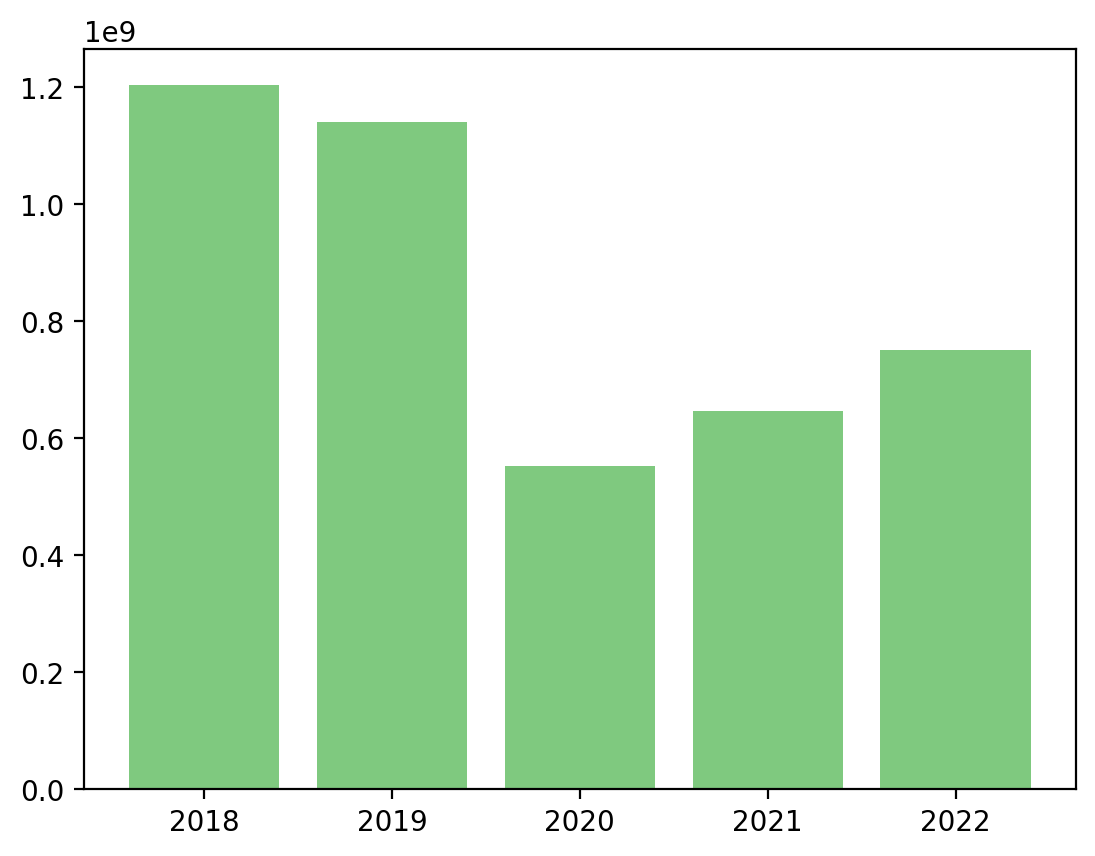

In [116]:
# Plot public transportation spendings (individual usage)
code_list_PT = ['code_07311', 'code_07313', 'code_07321']
total_expenses_urbanPT = getExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_PT, 'FACTOR_y')

[1997847525.4299998, 1766728075.98, 894759529.97, 1024312903.69, 955614318.47]


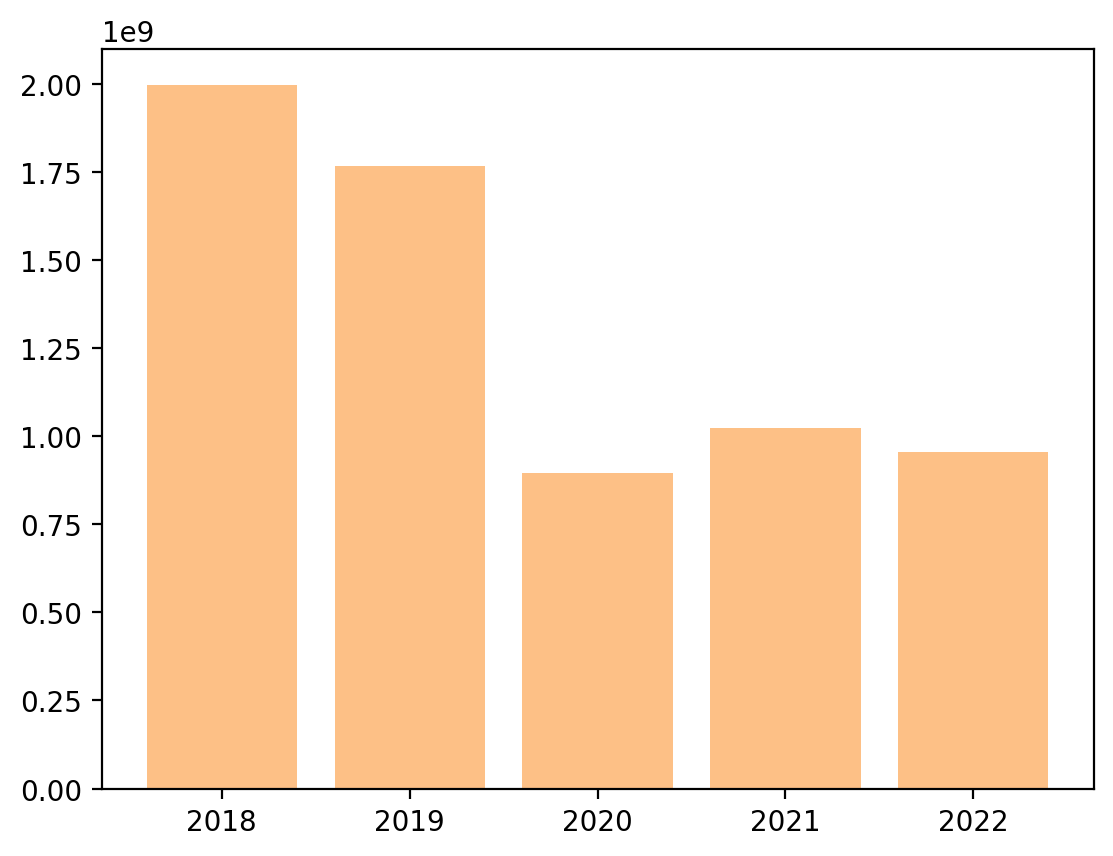

In [117]:
# Plot public transportation spendings (combined usage)
code_list_cPT = ['code_07350']
total_expenses_combinedPT = getExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_cPT, 'FACTOR_y')

[3201210949.96, 2905612532.4, 1446834227.18, 1669624645.99, 1705581222.46]


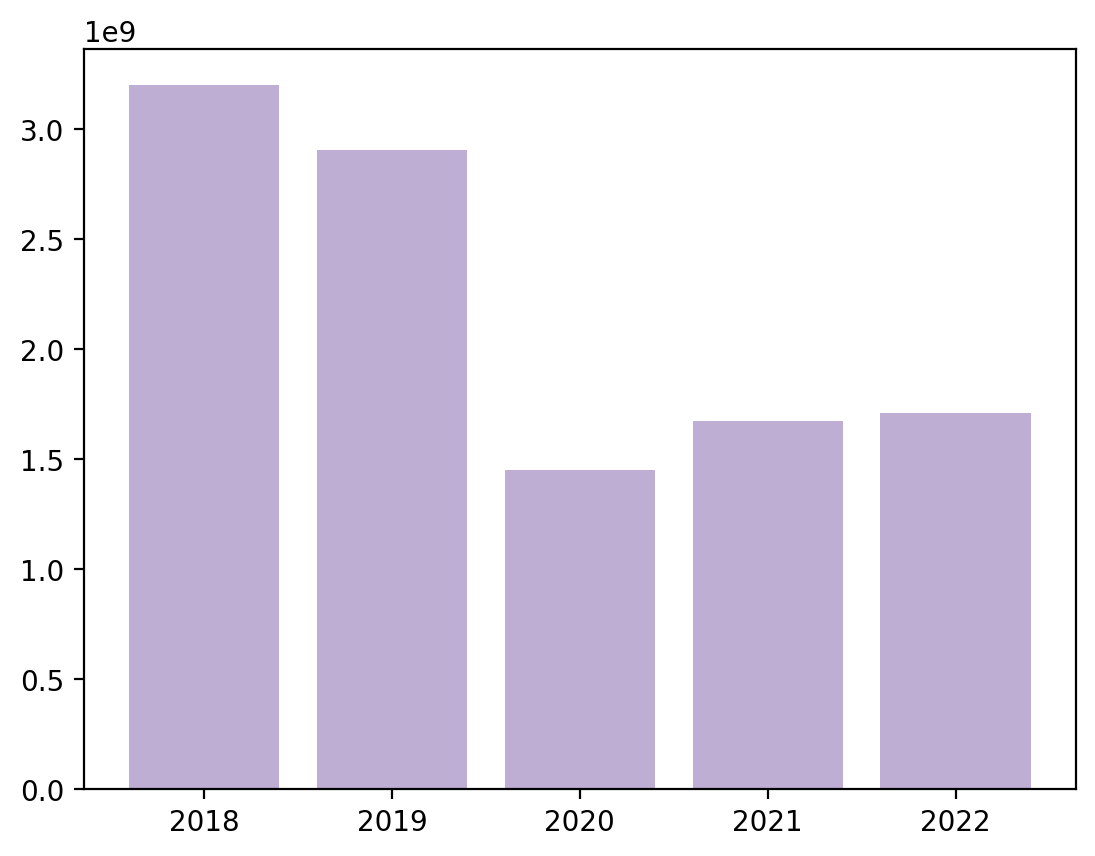

In [118]:
# Plot all public transportation spendings
code_list_PT_all = code_list_PT + code_list_cPT
total_expenses_PTall = getExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_PT_all, 'FACTOR_y')

> This plot shows the impact of combined tickets on total expenditures.

#### 5. _What variables correlate well with car-oriented mobility?_ 

This question requires the definition of car-oriented mobility as a response variable. The variables that imply car mobility are:
-   Car purchases (old or new),
-   Fuel spending (all kinds),
-   Mandatory circulatory tax.  
Other variables like driving license do not necessarily mean the household owns a car. This is consistent with studies found in the literature [10].

In [119]:
# Look at statistics
dict_df_HBS_urban['2019'].describe()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning:

invalid value encountered in subtract



NUMERO   code_07111   code_07112   code_07120   code_07130  \
count   3034.000000  2544.000000  2544.000000  2544.000000  2544.000000   
mean   10284.885959    87.393233    20.592192     8.090053     1.875836   
std     6002.465801   422.078657   151.124843    67.879026    17.005029   
min        1.000000     0.000000     0.000000     0.000000     0.000000   
25%     5002.250000     0.000000     0.000000     0.000000     0.000000   
50%    10251.500000     0.000000     0.000000     0.000000     0.000000   
75%    15346.500000     0.000000     0.000000     0.000000     0.000000   
max    20815.000000  5000.000000  2916.666667  1229.750000   441.666667   

        code_07211   code_07212   code_07213   code_07221   code_07222  ...  \
count  2544.000000  2544.000000  2544.000000  2544.000000  2544.000000  ...   
mean      4.936065     1.797492     0.950388    47.265096    57.107150  ...   
std      41.172679    15.837461    11.694222    90.456435    97.319292  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     4.412767  ...   
75%       0.000000     0.000000     0.000000    53.589250    89.685965  ...   
max     720.109549   417.976333   409.377143   717.062595  1036.714421  ...   

            NMIEM7       NMIEM8      NMIEM12      NMIEM13       EDADSP  \
count  3034.000000  3034.000000  3034.000000  3034.000000  3034.000000   
mean      0.114041     0.295979     0.420567     0.071852    55.996704   
std       0.369699     0.642030     0.701220     0.289580    15.333096   
min       0.000000     0.000000     0.000000     0.000000    19.000000   
25%       0.000000     0.000000     0.000000     0.000000    44.000000   
50%       0.000000     0.000000     0.000000     0.000000    55.000000   
75%       0.000000     0.000000     1.000000     0.000000    68.000000   
max       3.000000     4.000000     3.000000     2.000000    85.000000   

            SEXOSP   ESTUDIOSSP       IMPEXAC  carMobility  percentage_income  
count  3034.000000  3034.000000   3034.000000  3034.000000        3020.000000  
mean      2.895188     4.589651   2430.684904   231.392240                inf  
std       2.426137     1.867355   1585.256619   479.688755                NaN  
min       1.000000     1.000000      0.000000     0.000000           0.000000  
25%       1.000000     3.000000   1300.000000     0.000000           0.000000  
50%       1.000000     4.000000   2183.500000    65.206013           2.989892  
75%       6.000000     7.000000   3100.000000   234.278696           9.600934  
max       6.000000     8.000000  14100.000000  5363.545867                inf  

[8 rows x 42 columns]

The DataFrames have 38 columns, but not all will be included in the analysis. For instance, 'NUMERO' is the family ID, and 'FACTOR' is the spatial weight. Columns starting with *code_* are expenses, the ‘ANOENC’ is the year when the survey was carried out, etc. 

In [120]:
# Select relevant columns
relevant_columns = dict_df_HBS_urban['2020'].loc[:, ['DENSIDAD',
    'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
    'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' ,
    'IMPEXAC', 'carMobility']]

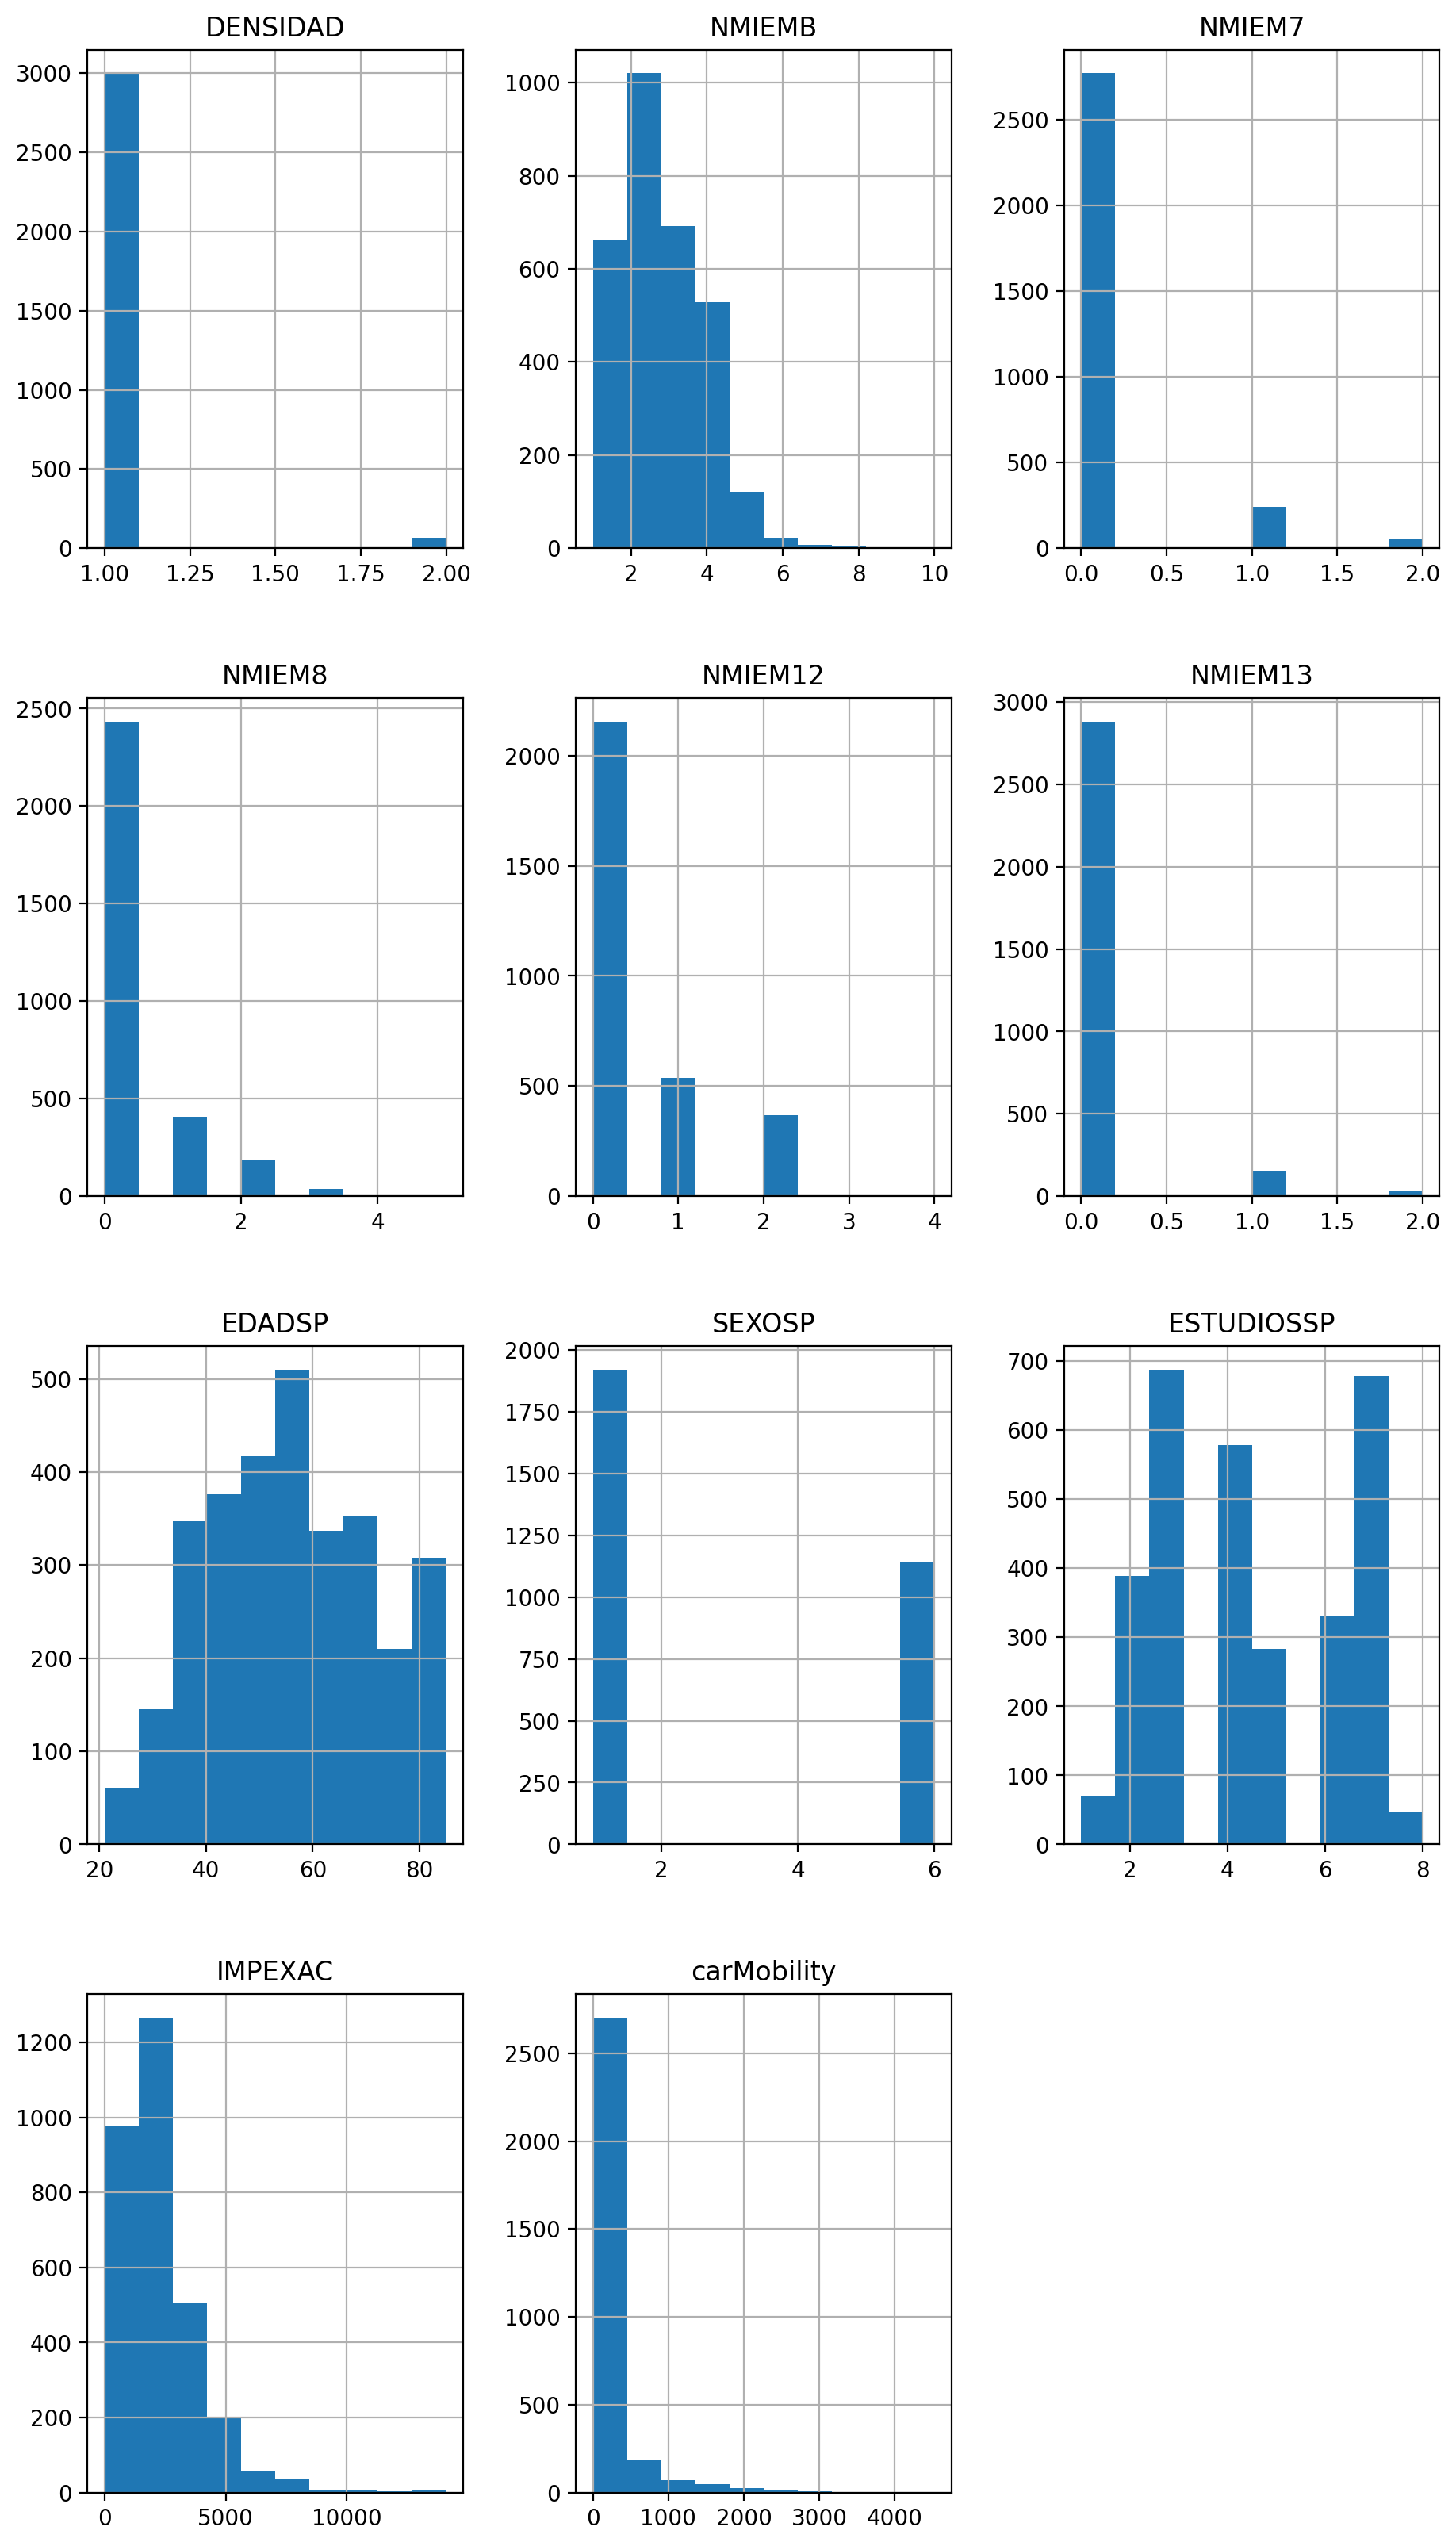

In [121]:
# Look at histograms
dict_df_HBS_urban['2018'].hist(column = relevant_columns.columns, figsize = (11,20));

The variables selected for the study will be saved in a new DataFrame to create a correlation matrix.

In [122]:
dict_df_HBS_urban['2020'].head()

NUMERO  code_07111  code_07112  code_07120  code_07130  code_07211  \
0      24         0.0         0.0         0.0         0.0         0.0   
1      37         0.0         0.0         0.0         0.0         0.0   
2      39         NaN         NaN         NaN         NaN         NaN   
3      60         0.0         0.0         0.0         0.0         0.0   
4      63         0.0         0.0         0.0         0.0         0.0   

   code_07212  code_07213  code_07221  code_07222  ...  NMIEM8  NMIEM12  \
0    0.000000         0.0  109.574833    0.000000  ...       0        1   
1    0.087975         0.0   48.019667   33.954683  ...       1        1   
2         NaN         NaN         NaN         NaN  ...       0        1   
3    0.000000         0.0    0.000000    0.000000  ...       0        0   
4    0.000000         0.0    0.000000    0.000000  ...       0        0   

   NMIEM13  EDADSP  SEXOSP  ESTUDIOSSP  IMPEXAC  CAPROV_bool  carMobility  \
0        0      65       1           4     2275         True   109.574833   
1        0      32       1           3      600         True   183.410253   
2        0      65       1           4      782         True     0.000000   
3        0      54       6           6     1260         True     0.000000   
4        0      53       6           5     3317         True     4.763334   

   percentage_income  
0           4.816476  
1          30.568376  
2           0.000000  
3           0.000000  
4           0.143604  

[5 rows x 43 columns]

In [123]:
# Look at correlation matrix
x = dict_df_HBS_urban['2022'].loc[:, ['TAMAMU', 'DENSIDAD',
    'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
    'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' ,
    'IMPEXAC', 'carMobility']]

In [124]:
x.columns = ['Municipality size', 'Spatial density', 'Total family size', 
             'Family size: 7','Family size: 8', 'Family size: 12',
             'Family size: 13', "Breadwinner's age", 
             "Breadwinner's gender", "Breadwinner's education", 
             'Net Income', 'Vehicle ownership/use']

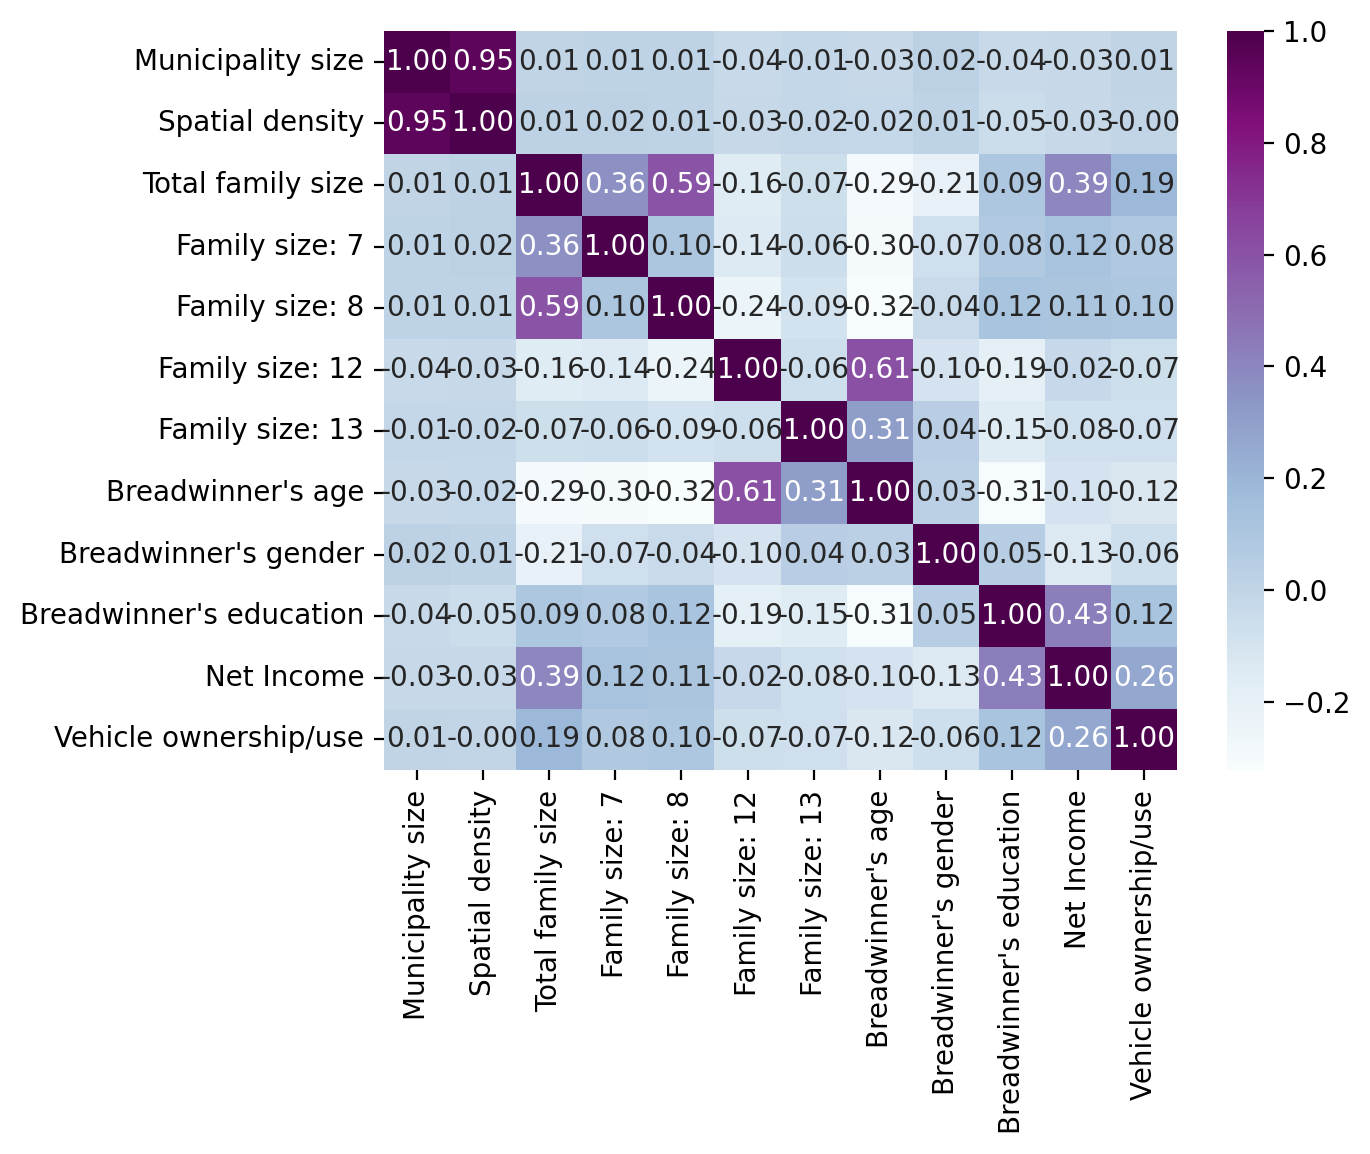

In [125]:
sns.heatmap(x.corr(), annot=True, fmt=".2f", cmap='BuPu');

> None of the selected variables show a remarkable correlation with car expenditures. The one with a higher correlation is income, followed by household size (NMIEMB).

The model applied will be a linear regression considering the data to be cross-sectional. This is one model per year.

In [126]:
# Create function to model data

def split_fit_linearModel(control_X, response_y, test_size=.3, rand_state=42):

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = .30, random_state=42)

    # Fit model
    lm_model = LinearRegression()
    lm_model.fit(X_train, y_train)

    # Predict  model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    # Score model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    # Get error
    squared_error_ = mean_squared_error(y_test, y_test_preds)

    print(f'The test score is {test_score} and the train score is {train_score}')
    return test_score, train_score

In [127]:
# Drop null values for newly created response
for year in df_dict_keys:
    dict_df_HBS_urban[year].dropna(axis = 0, inplace = True)

In [128]:
# Create x matrix and y vector
for year in df_dict_keys:
    y = dict_df_HBS_urban[year].loc[:,'carMobility']
    X = dict_df_HBS_urban[year].loc[:,['TAMAMU', 'DENSIDAD',
                                'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
                                'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' , 
                                'IMPEXAC']]
    # Run model
    split_fit_linearModel(X,y)

The test score is 0.056993341027717026 and the train score is 0.05720271854592751
The test score is 0.07541305052993186 and the train score is 0.05471452139210731
The test score is 0.03303110857409708 and the train score is 0.04681897877024954
The test score is 0.01835913578546955 and the train score is 0.04493890850367699
The test score is 0.049658435079969365 and the train score is 0.07260903708649402


> Seems like these variables explain very little of the reasons behind private car-based mobility.

Revising the literature on the subject, it seems like it could help model fuel expenditure separate from the rest [11-12].  
The first step will be to separate car purchases from fuel spending and model the second.  
Additionally, some authors use the logarithm of the income. This means salary values have to be over 0.

In [129]:
# Modify response variable
for year in df_dict_keys:
    dict_df_HBS_urban[year]['df_fuelExpenditure'] = dict_df_HBS_urban[year]['code_07221']
    + dict_df_HBS_urban[year]['code_07222'] + dict_df_HBS_urban[year]['code_07223']

In [130]:
# Look at statistics
dict_df_HBS_urban[year]['df_fuelExpenditure'].describe()

count    2160.000000
mean       57.525381
std       135.995005
min         0.000000
25%         0.000000
50%         0.000000
75%        16.894958
max       992.083852
Name: df_fuelExpenditure, dtype: float64

In [131]:
# Select households with salaries higher than 0
new_dfs = []
for year in df_dict_keys:
    df = dict_df_HBS_urban[year].loc[dict_df_HBS_urban[year]['IMPEXAC'] > 0]
    new_dfs.append(df)
dict_df_EPFSalaries = dict(zip(df_dict_keys, new_dfs))

In [132]:
# Create new variable (log-salary)
for year in df_dict_keys:
    dict_df_EPFSalaries[year] = dict_df_EPFSalaries[year].copy()
    dict_df_EPFSalaries[year].loc[:,'log_netIncome'] = np.log(dict_df_EPFSalaries[year]['IMPEXAC'])

In [133]:
# Look at correlation matrix
df_ = dict_df_EPFSalaries['2020'].loc[:, ['TAMAMU', 'DENSIDAD',
    'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
    'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' ,
    'IMPEXAC', 'log_netIncome', 'df_fuelExpenditure']]

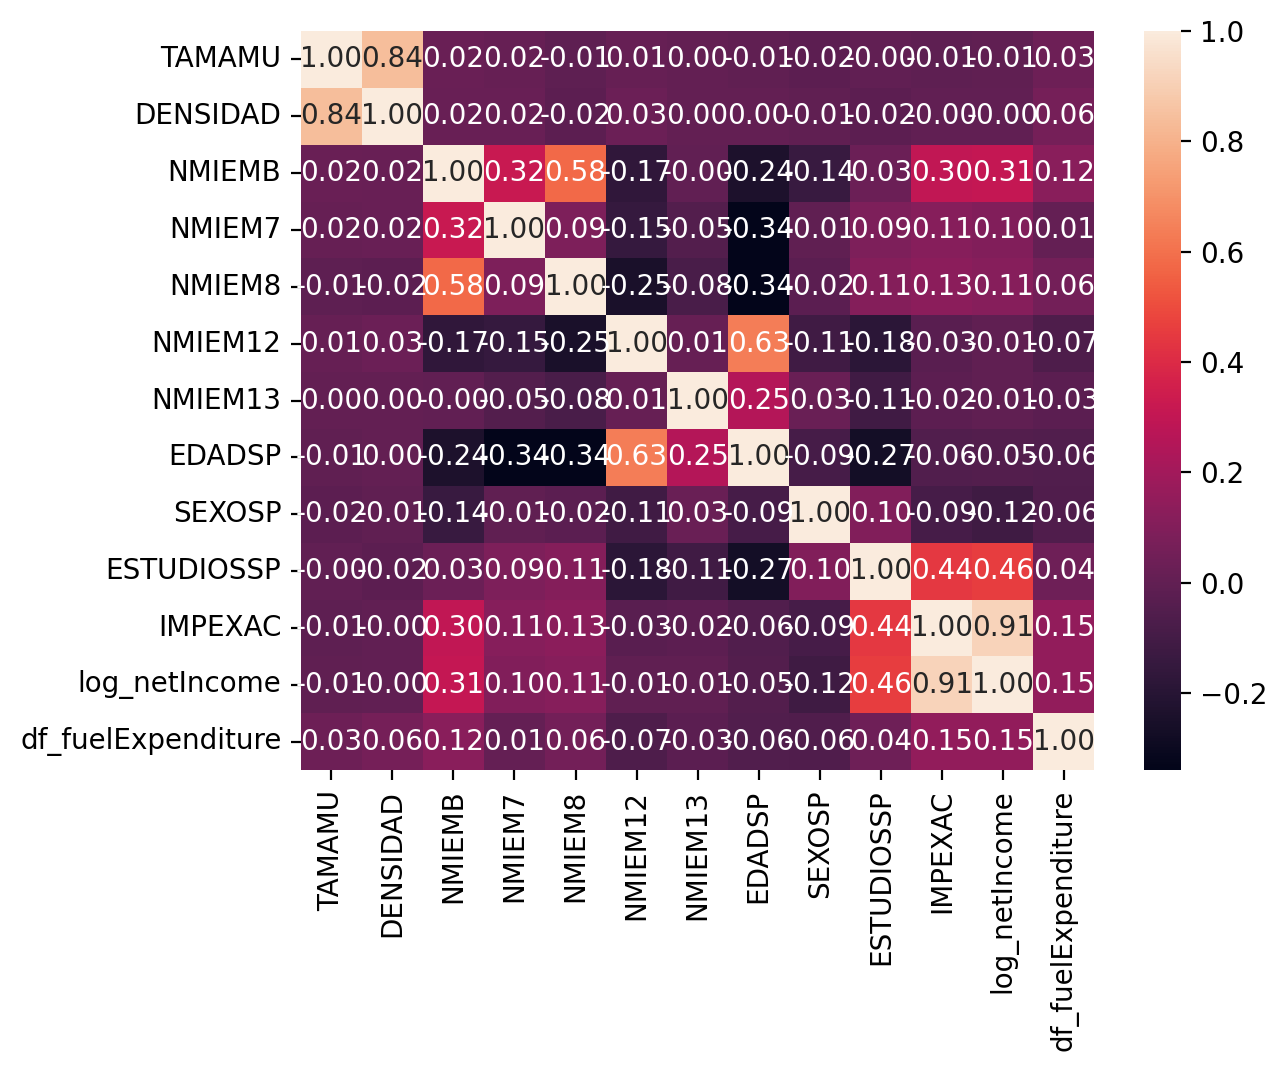

In [134]:
sns.heatmap(df_.corr(), annot=True, fmt=".2f");

> It seems like the income correlates better to fuel expenditure than its log.

In [135]:
# Create x matrix and y vector
for year in df_dict_keys:
    y = dict_df_EPFSalaries[year].loc[:,'df_fuelExpenditure']
    X = dict_df_EPFSalaries[year].loc[:,['TAMAMU', 'DENSIDAD',
                                        'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
                                        'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' , 
                                        'log_netIncome', 'CAPROV_bool']]
    # Run model
    split_fit_linearModel(X,y)


The test score is 0.06015588758526802 and the train score is 0.05748076616362807
The test score is 0.0445882441976474 and the train score is 0.05605789654572435
The test score is 0.03630405368502354 and the train score is 0.04243373892067226
The test score is 0.014455380617232505 and the train score is 0.0267021666129984
The test score is 0.020458922291326953 and the train score is 0.04198399440642231


> For some years, scores improved and, for some, worsened. Another attempt will express the response variable as a logarithm too.

In [136]:
# Modify response variable to be fuel expenditure's log
# Select values higher than 0
new_dfs_log_Fuel = []
for year in df_dict_keys:
    df = dict_df_HBS_urban[year].loc[dict_df_HBS_urban[year]['df_fuelExpenditure'] > 0]
    new_dfs_log_Fuel.append(df)
dict_df_EPF_logExpenditures = dict(zip(df_dict_keys, new_dfs_log_Fuel))

In [137]:
dict_df_HBS_urban['2020']

NUMERO   code_07111  code_07112  code_07120  code_07130  code_07211  \
0         24     0.000000       0.000         0.0        0.00         0.0   
1         37     0.000000       0.000         0.0        0.00         0.0   
3         60     0.000000       0.000         0.0        0.00         0.0   
4         63     0.000000       0.000         0.0        0.00         0.0   
6         76  1145.524421       0.000         0.0        0.00         0.0   
...      ...          ...         ...         ...         ...         ...   
2797   19132     0.000000    2757.425         0.0      100.27         0.0   
2798   19134     0.000000       0.000         0.0        0.00         0.0   
2799   19148     0.000000       0.000         0.0        0.00         0.0   
2801   19156     0.000000       0.000         0.0        0.00         0.0   
2802   19157     0.000000       0.000         0.0        0.00         0.0   

      code_07212  code_07213  code_07221  code_07222  ...  NMIEM12  NMIEM13  \
0       0.000000    0.000000  109.574833    0.000000  ...        1        0   
1       0.087975    0.000000   48.019667   33.954683  ...        1        0   
3       0.000000    0.000000    0.000000    0.000000  ...        0        0   
4       0.000000    0.000000    0.000000    0.000000  ...        0        0   
6       0.000000  101.389167    0.000000   11.293400  ...        0        0   
...          ...         ...         ...         ...  ...      ...      ...   
2797    0.000000    0.000000    3.288216  308.741344  ...        0        0   
2798    0.000000    0.000000    0.000000    0.000000  ...        2        0   
2799    0.000000    0.000000  122.689618    5.833751  ...        0        0   
2801    0.000000    0.000000    0.000000    0.000000  ...        0        0   
2802    0.000000    0.000000    0.000000    0.000000  ...        2        0   

      EDADSP  SEXOSP  ESTUDIOSSP  IMPEXAC  CAPROV_bool  carMobility  \
0         65       1           4     2275         True   109.574833   
1         32       1           3      600         True   183.410253   
3         54       6           6     1260         True     0.000000   
4         53       6           5     3317         True     4.763334   
6         63       6           3     1305         True  1281.109178   
...      ...     ...         ...      ...          ...          ...   
2797      50       1           5     5500         True  3082.032852   
2798      65       6           7     4604         True   116.221142   
2799      57       1           3     1242         True   132.731701   
2801      34       6           5      838         True     3.443333   
2802      70       1           2     1319         True     4.583334   

      percentage_income  df_fuelExpenditure  
0              4.816476          109.574833  
1             30.568376           48.019667  
3              0.000000            0.000000  
4              0.143604            0.000000  
6             98.169286            0.000000  
...                 ...                 ...  
2797          56.036961            3.288216  
2798           2.524351            0.000000  
2799          10.686932          122.689618  
2801           0.410899            0.000000  
2802           0.347485            0.000000  

[2216 rows x 44 columns]

In [138]:
# Create variable
for year in df_dict_keys:
    dict_df_EPF_logExpenditures[year] = dict_df_EPF_logExpenditures[year].copy()
    dict_df_EPF_logExpenditures[year]['df_log_fuelExpenditure'] = np.log(
        dict_df_EPF_logExpenditures[year]['df_fuelExpenditure'])

In [139]:
for year in df_dict_keys:
    dict_df_EPF_logExpenditures[year] = dict_df_EPF_logExpenditures[year].copy()
    dict_df_EPF_logExpenditures[year]['shared_mobility1'] = dict_df_EPF_logExpenditures[year]['code_07324']

In [140]:
dict_df_EPF_logExpenditures[year]

NUMERO  code_07111  code_07112  code_07120  code_07130  code_07211  \
2         29         0.0         0.0         0.0    0.000000    0.000000   
4         47         0.0         0.0         0.0    0.000000    0.000000   
8        119         0.0         0.0         0.0    0.000000    0.000000   
9        131         0.0         0.0         0.0    0.000000    0.099506   
11       147         0.0         0.0         0.0    0.000000    0.000000   
...      ...         ...         ...         ...         ...         ...   
2756   20474         0.0         0.0         0.0    0.105508    0.000000   
2757   20476         0.0         0.0         0.0    0.000000    0.000000   
2760   20542         0.0         0.0         0.0    0.000000    0.000000   
2764   20559         0.0         0.0         0.0    0.000000    0.000000   
2768   20576         0.0         0.0         0.0    0.000000    0.000000   

      code_07212  code_07213  code_07221  code_07222  ...  EDADSP  SEXOSP  \
2       0.000000     0.00000  115.358780    0.000000  ...      71       1   
4       0.000000     0.00000  279.867456    0.000000  ...      45       1   
8       0.000000     0.00000   24.711300   31.016384  ...      79       1   
9       0.025203     0.00869    0.891643  291.425364  ...      44       1   
11      0.000000     0.00000    5.179892    9.949175  ...      52       6   
...          ...         ...         ...         ...  ...     ...     ...   
2756    0.000000     0.00000   10.274683    8.683117  ...      64       6   
2757    0.000000     0.00000  404.632380    0.000000  ...      39       6   
2760    0.000000     0.00000   14.142267   16.609650  ...      58       1   
2764    0.000000     0.00000  167.920560    0.000000  ...      44       1   
2768    0.000000     0.00000    2.420416  187.631917  ...      57       1   

      ESTUDIOSSP  IMPEXAC  CAPROV_bool  carMobility  percentage_income  \
2              6     5715         True   119.525446           2.091434   
4              4     2230         True   449.923457          20.175940   
8              7     2957         True   360.760009          12.200203   
9              7     3709         True   317.282014           8.554382   
11             5     2804         True    15.174459           0.541172   
...          ...      ...          ...          ...                ...   
2756           4     2733         True    23.124467           0.846120   
2757           7     2767         True   407.911713          14.742021   
2760           7     6300         True    39.034873           0.619601   
2764           7     5247         True  1081.898760          20.619378   
2768           3     1224         True   254.273386          20.773969   

      df_fuelExpenditure  df_log_fuelExpenditure  shared_mobility1  
2             115.358780                4.748047          0.000000  
4             279.867456                5.634316          0.000000  
8              24.711300                3.207261          0.000000  
9               0.891643               -0.114689          0.029982  
11              5.179892                1.644784          0.000000  
...                  ...                     ...               ...  
2756           10.274683                2.329683          1.210642  
2757          404.632380                6.002979          0.000000  
2760           14.142267                2.649168          3.271150  
2764          167.920560                5.123491        207.645195  
2768            2.420416                0.883939          0.881850  

[899 rows x 46 columns]

In [141]:
# Look at correlation matrix
x = dict_df_EPF_logExpenditures[year].loc[:, ['TAMAMU', 'DENSIDAD',
    'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
    'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' ,
    'IMPEXAC', 'shared_mobility1']]

In [142]:
x.columns = ['Municipality size', 'Spatial density', 'Total family size', 
             'Family size: 7', 'Family size: 8', 'Family size: 12', 
             'Family size: 13', "Breadwinner's age", "Breadwinner's gender", 
             "Breadwinner's education", 'Income', 'Shared mobility (1)']

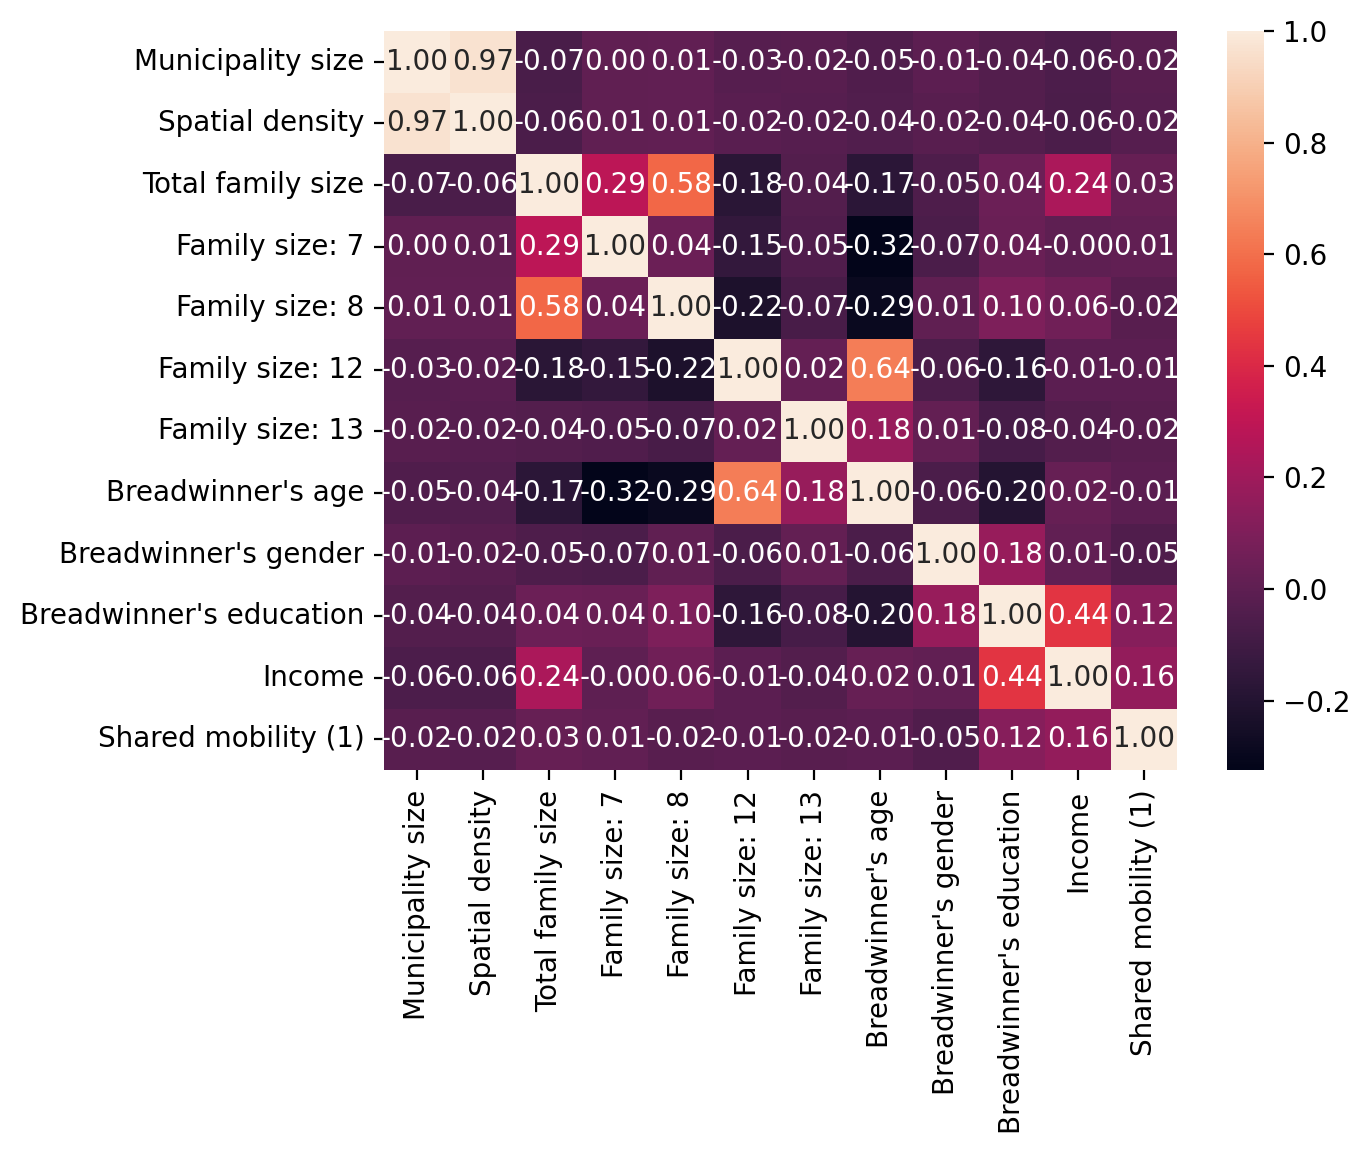

In [143]:
sns.heatmap(x.corr(), annot=True, fmt=".2f");

> Some variables' influence on the response has increased with the modification. But the impact of the salary decreased.

In [144]:
# Create x matrix and y vector
for year in df_dict_keys:
    y = dict_df_EPF_logExpenditures[year].loc[:,'df_log_fuelExpenditure']
    X = dict_df_EPF_logExpenditures[year].loc[:,['TAMAMU', 'DENSIDAD',
                                        'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
                                        'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' , 
                                        'IMPEXAC', 'CAPROV_bool']]
    # Run model
    split_fit_linearModel(X,y)

The test score is 0.07411924886010357 and the train score is 0.11342359552604242
The test score is 0.0463820294269629 and the train score is 0.06805656493928913
The test score is 0.0001763529061006297 and the train score is 0.026158595250893146
The test score is -0.006486901648534937 and the train score is 0.10305102478321337
The test score is 0.011040484603758838 and the train score is 0.06853757594908472


That did not improve the model. One last try will use the salary logarithm to infer the fuel expenditure's logarithm (log-log model).

In [145]:
# Modify explanatory variable 'Salary' to be its log
new_dfs_loglog = []
for year in df_dict_keys:
    df = dict_df_HBS_urban[year].loc[(dict_df_HBS_urban[year]['IMPEXAC'] > 0) & (
        dict_df_HBS_urban[year]['df_fuelExpenditure'] > 1)]
    new_dfs_loglog.append(df)
dict_df_EPF_loglog = dict(zip(df_dict_keys, new_dfs_loglog))

In [146]:
# Define new response with selected rows 
for year in df_dict_keys:
    dict_df_EPF_loglog[year] = dict_df_EPF_loglog[year].copy()
    dict_df_EPF_loglog[year]['df_log_fuelExpenditure'] = np.log(
        dict_df_EPF_loglog[year]['df_fuelExpenditure'])

In [147]:
# Modify new explanatory variable
for year in df_dict_keys:
    dict_df_EPF_loglog[year] = dict_df_EPF_loglog[year].copy()
    dict_df_EPF_loglog[year]['df_log_salary'] = np.log(
        dict_df_EPF_loglog[year]['IMPEXAC'])

In [148]:
# Look at correlation matrix
x = dict_df_EPF_loglog[year].loc[:, ['TAMAMU', 'DENSIDAD',
    'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
    'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' ,
    'IMPEXAC', 'df_log_salary', 'df_fuelExpenditure']]



In [149]:
x.columns = ['Municipality size', 'Spatial density', 'Total family size', 
             'Family size: 7','Family size: 8', 'Family size: 12',
             'Family size: 13', "Breadwinner's age", 
             "Breadwinner's gender", "Breadwinner's education", 
             'Net Income', "Net Income's log", 'Fuel expenditures']

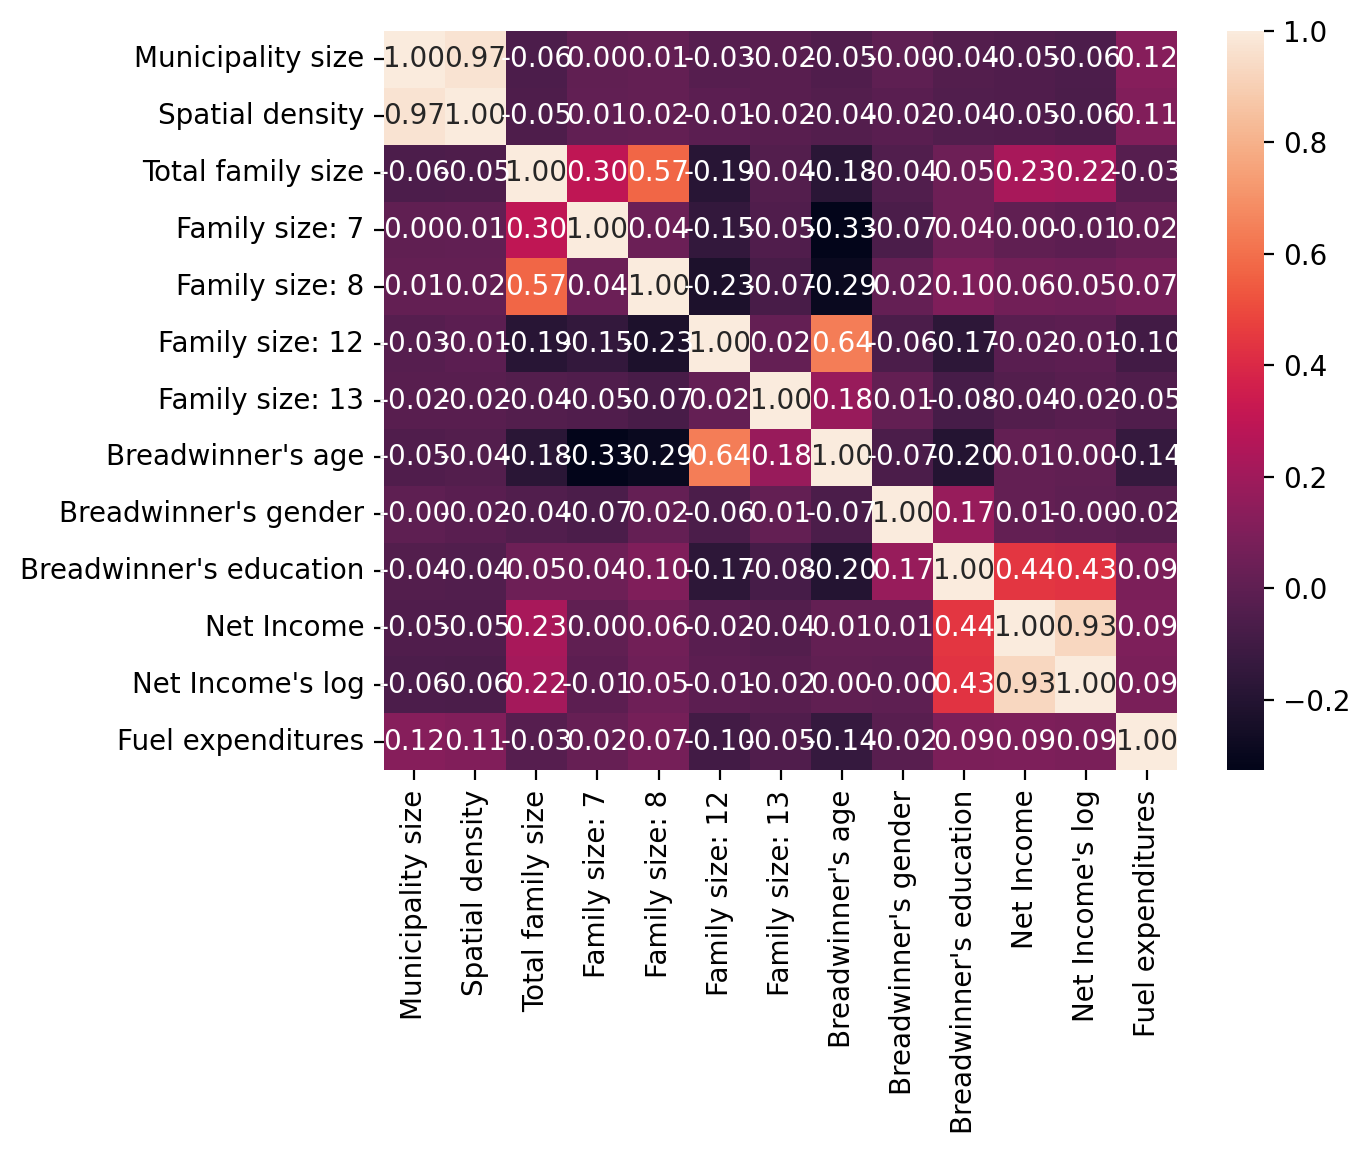

In [150]:
sns.heatmap(x.corr(), annot=True, fmt=".2f");

> It Seems like the response variable correlates more to the salary than its log.

In [151]:
# Create x matrix and y vector
for year in df_dict_keys:
    y = dict_df_EPF_loglog[year].loc[:,'df_log_fuelExpenditure']
    X = dict_df_EPF_loglog[year].loc[:,['TAMAMU', 'DENSIDAD',
                                        'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
                                        'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' , 
                                        'df_log_salary', 'CAPROV_bool']]
    # Run model
    split_fit_linearModel(X,y)

The test score is 0.1227346737609053 and the train score is 0.11188002760077298
The test score is 0.09186707646134229 and the train score is 0.07358607953484764
The test score is -0.02721310504975838 and the train score is 0.041926164366641094
The test score is 0.04286844399423129 and the train score is 0.0820458248312238
The test score is 0.02521889705205671 and the train score is 0.07733181413684742


With these changes, we can explain up to 12.2% of the variability in household fuel expenditures. The model prediction is not good, but it seems like there is no overfitting. Perhaps changing the equation could improve the model or add other relevant variables. In this case, the prediction will be left as this and will not be included in the final communication.

#### 6.	*Are new mobility trends allowing us to spend less?*

**Urban Areas**

This only makes sense in the selected urban areas because the rest of the country does not have such services.

_6.1 Exploration of ridehailing and ridesharing expenditures_

[318501531.64, 358450284.68, 239006224.23000002, 294020722.76, 286673873.20000005]


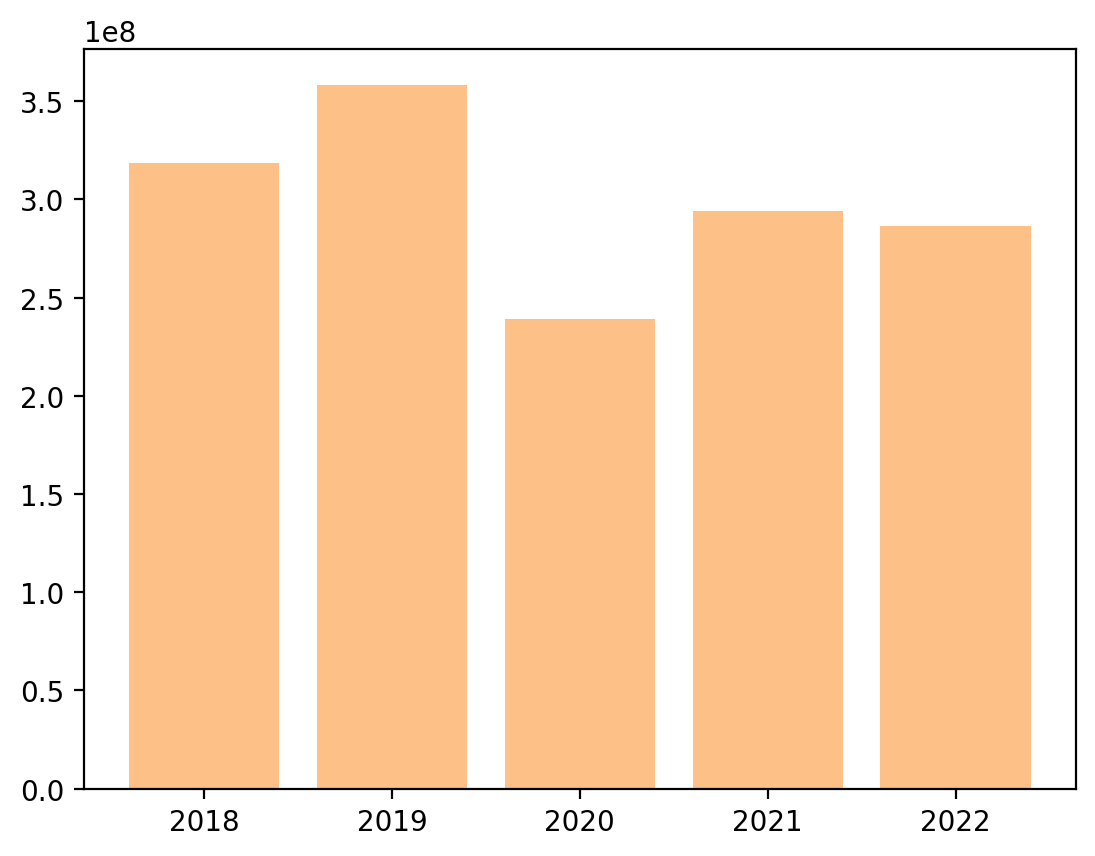

In [152]:
# Plot shared mobility expenditures: ridesharing, taxis and ridehailing
code_list_Shared_ride = ['code_07324']
total_expenses_sharedMobility = getExpenses(dict_df_HBS_urban, dict_df_HBS.keys(), 
                                        code_list_Shared_ride, 'FACTOR_y')

In [153]:
for _year in dict_df_allExpenses_tidy.keys():
    print(dict_df_HBS_urban[_year].shape)

(2573, 44)
(2540, 44)
(2216, 44)
(2257, 44)
(2160, 44)


In [154]:
df3= dict_df_HBS_urban['2018'][['code_07230','FACTOR_y' ]]

In [155]:
df3.head()

code_07230     FACTOR_y
0    0.000000   422.866646
1    0.000000  1349.187753
3    0.000000  1125.900409
4    2.920475  1469.621882
6    0.000000   553.020248

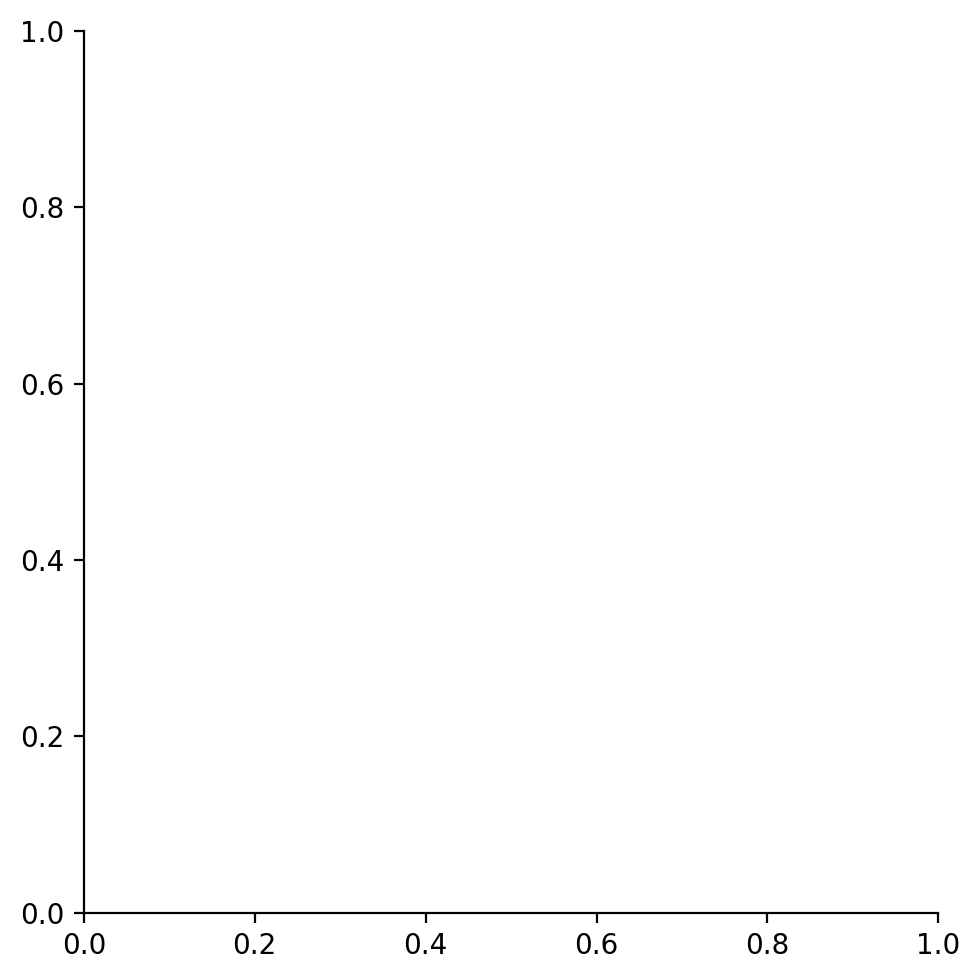

In [156]:
sns.catplot(value = df3['code_07230'])

In [157]:
#  medians for shared mobility
leasing = []
for _year in dict_df_allExpenses_tidy.keys():
    df = dict_df_HBS_urban[_year]
    df['shared_m_exp'] = df['code_07241']
    df['shared_m_exp']=  df['shared_m_exp'].replace(0, np.nan)
    leasing.append(df['shared_m_exp'].mean())

In [158]:
leasing

[41.1877830273298,
 19.409208223757908,
 41.85273218340589,
 68.21337486451596,
 53.485354779120875]

In [159]:
ridehailing_years = []
#  medians for public transportation
for _year in dict_df_allExpenses_tidy.keys():
    total_families_year = dict_df_HBS_urban[_year]['code_07241'].mean()
    ridehailing_years.append(total_families_year)

In [160]:
ridehailing_years

[4.770291232858251,
 2.2771433270393135,
 4.060621579166185,
 5.3796990367230135,
 5.373297216235755]

In [161]:
#plot2print(mothly_all_series.index.to_list(), mothly_all_series.to_list(), b_colors=['#1c9099']*5,  ylabel='Median Monthly expense (€)', title='ok')

In [162]:
ridehailing_years = []
#  medians for public transportation
for _year in dict_df_allExpenses_tidy.keys():
    total_families_year = dict_df_HBS_urban[_year]['code_07241'].sample(2100)
    ridehailing_years.append(total_families_year)

In [163]:
dict_exp = dict(zip(dict_df_allExpenses_tidy.keys(), ridehailing_years))

In [164]:
df = pd.DataFrame(dict_exp)

In [165]:
df.head()

2018  2019  2020  2021  2022
0   NaN   0.0   0.0   NaN   0.0
1   0.0   0.0   0.0   0.0   0.0
2   NaN   NaN   NaN   0.0   0.0
3   0.0   0.0   0.0   0.0   0.0
4   NaN   NaN   0.0   0.0   NaN

/var/folders/1t/53y3yrmj43vbkbdzpf5gc28h0000gn/T/ipykernel_77949/3735061277.py:1: UserWarning:

The palette list has more values (6) than needed (5), which may not be intended.



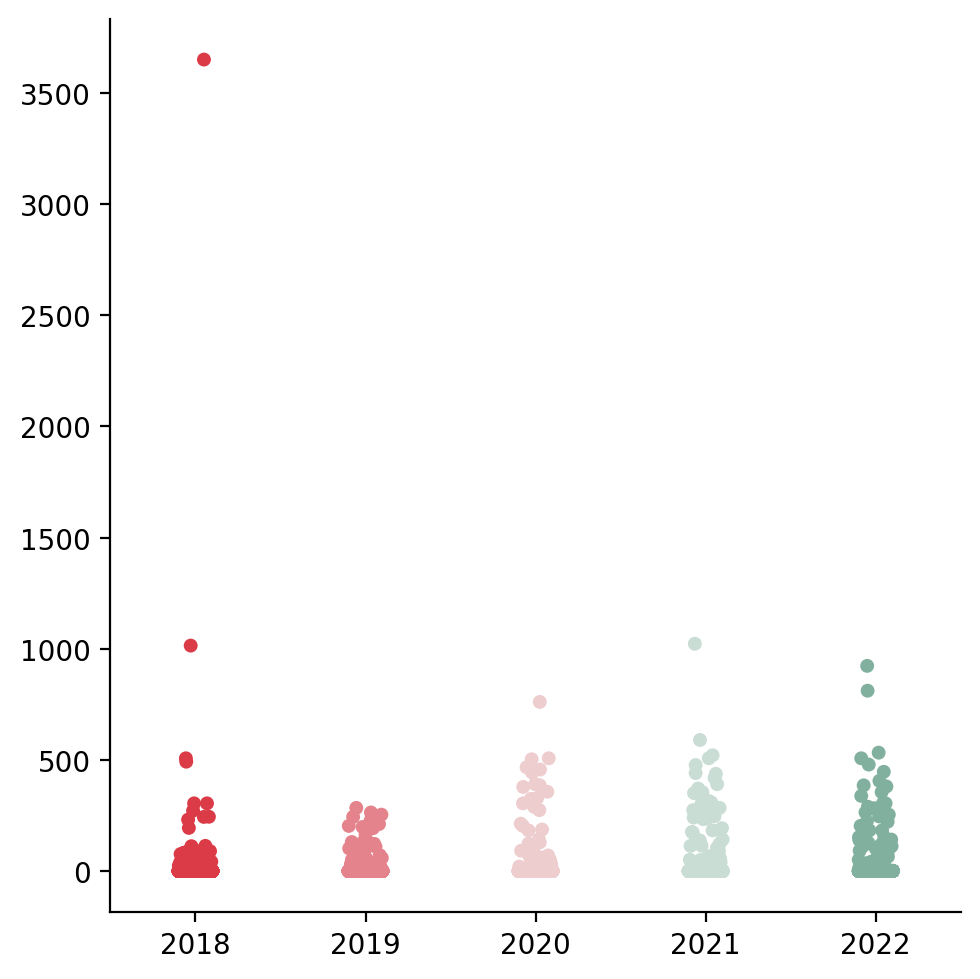

In [166]:
sns.catplot(data = df, palette=sns.diverging_palette(10, 155));

In [167]:
dict_df_HBS_urban[_year]['code_07324']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
           ...    
2762      0.000000
2764    207.645195
2765      0.000000
2767      0.000000
2768      0.881850
Name: code_07324, Length: 2160, dtype: float64

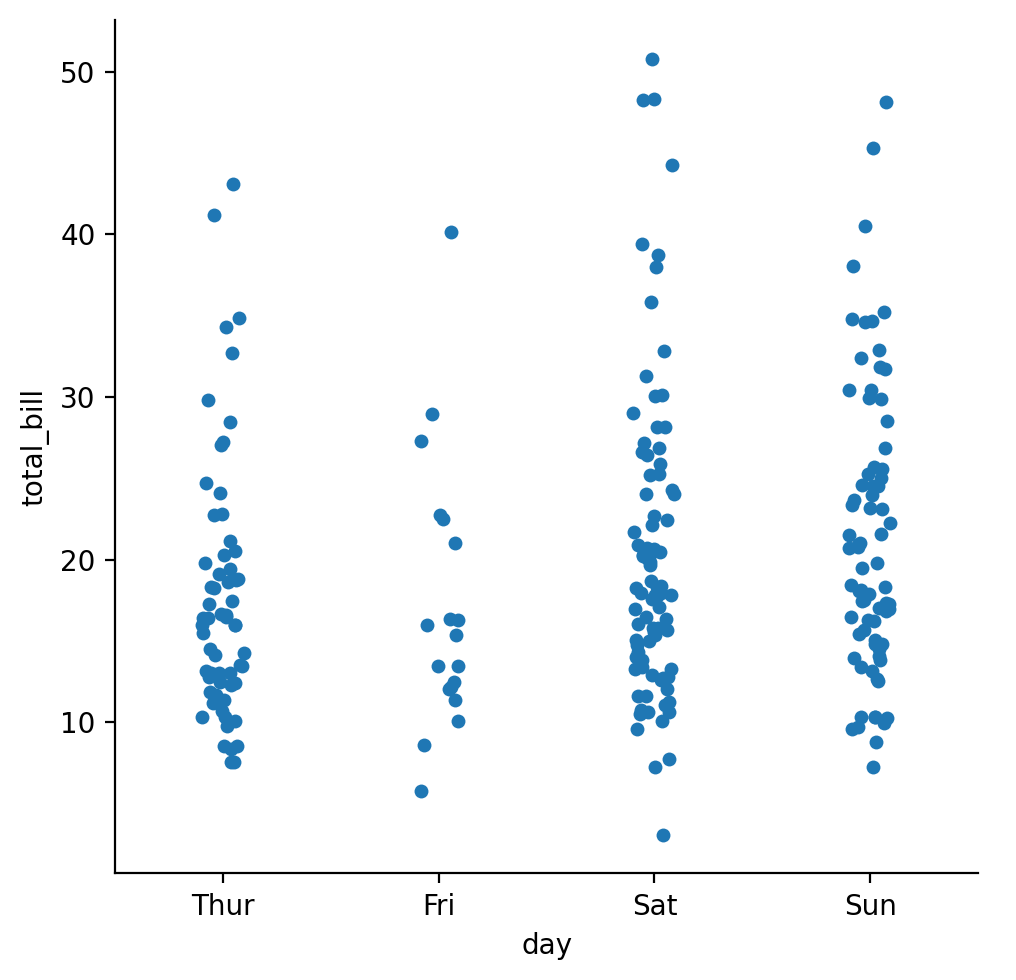

In [168]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
tips = sns.load_dataset("tips")
sns.catplot(data=tips, x="day", y="total_bill")

In [169]:
ridehailing_years

[1292    0.000000
 1035    0.000000
 1672    0.000000
 38      0.000000
 2270    0.000000
           ...   
 1583    0.000000
 499     0.119825
 1444    0.000000
 2691    0.000000
 2258    0.000000
 Name: code_07241, Length: 2100, dtype: float64,
 1164    0.000000
 546     0.000000
 568     0.000000
 450     0.045575
 902     0.000000
           ...   
 2816    0.000000
 1282    0.000000
 2640    0.000000
 2591    0.000000
 2815    0.011732
 Name: code_07241, Length: 2100, dtype: float64,
 2541    0.0
 488     0.0
 272     0.0
 2249    0.0
 2332    0.0
        ... 
 2239    0.0
 2300    0.0
 264     0.0
 2013    0.0
 437     0.0
 Name: code_07241, Length: 2100, dtype: float64,
 2021      0.000000
 2683      0.000000
 2143      0.000000
 199     236.145508
 714       0.000000
            ...    
 735       0.000000
 817       0.000000
 1656      0.074200
 2105      0.000000
 1405      0.000000
 Name: code_07241, Length: 2100, dtype: float64,
 1006    0.0
 487     0.0
 497     0.0
 873  

> This follows the same trends as the rest.

6.2 _Exploration of vehicle rent_

[180851477.26, 92398064.68, 168467271.65, 200297672.67000002, 191990109.16]


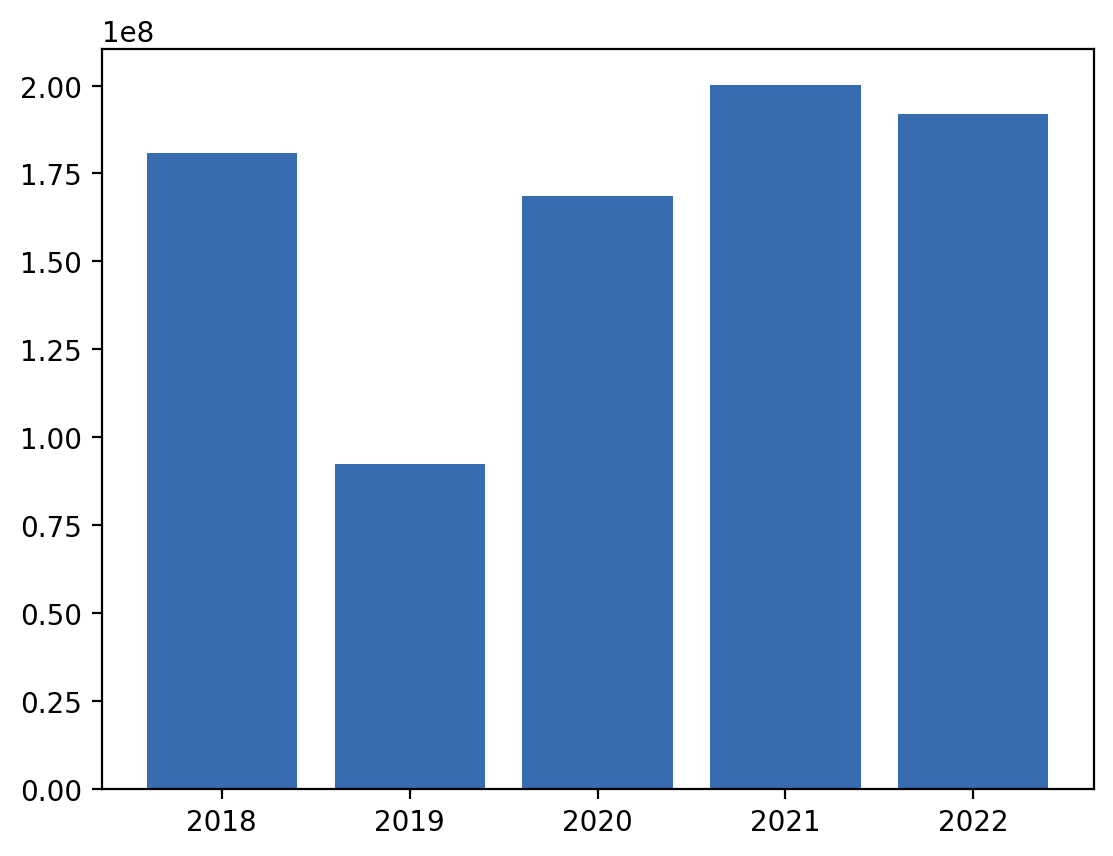

In [170]:
# Plot shared mobility expenditures: ridesharing, taxis and ridehailing
code_list_Shared_vehicle = ['code_07241']
total_expenses_sharedMobility = getExpenses(dict_df_HBS_urban, dict_df_HBS.keys(), 
                                        code_list_Shared_vehicle, 'FACTOR_y')

This plot shows that car sharing, leasing, and renting expenses had their lowest numbers in 2019.

[499353008.9, 450848349.36, 407473495.88, 494318395.43, 478663982.36]


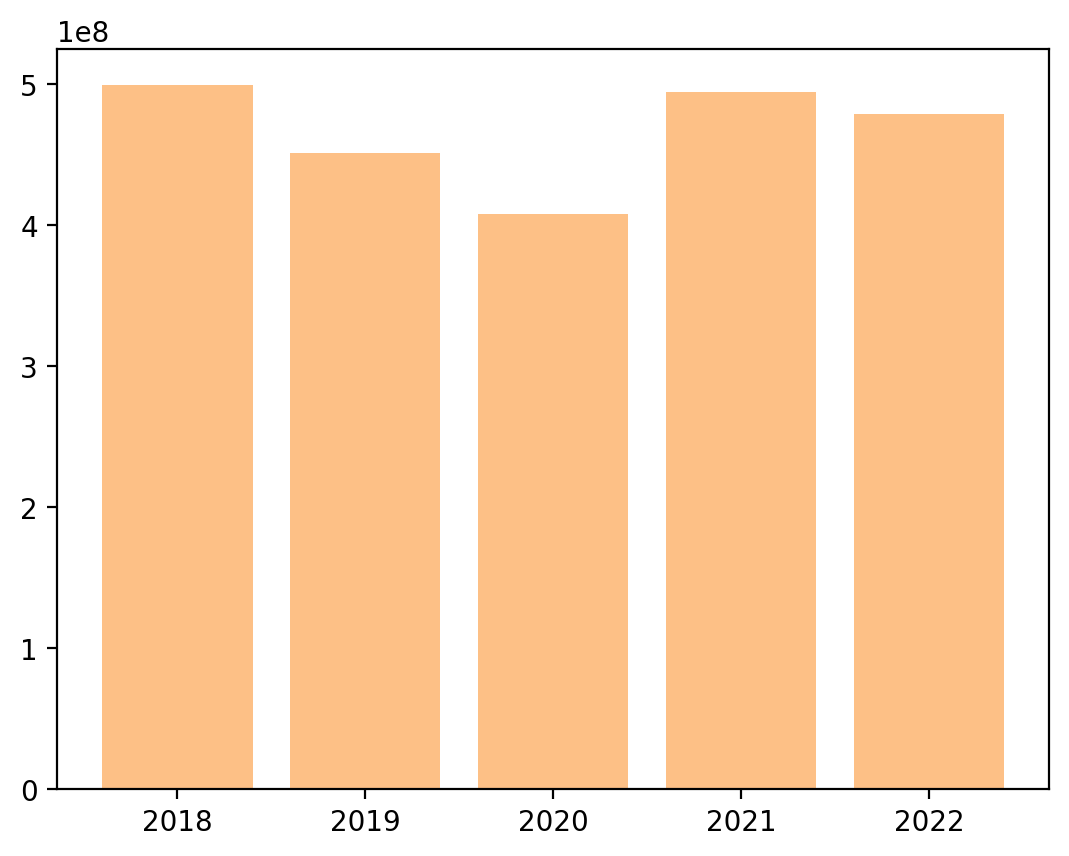

In [171]:
# Plot shared mobility (all)
code_list_Shared_all = code_list_Shared_ride + code_list_Shared_vehicle
total_expenses_SMall = getExpenses(dict_df_HBS_urban, dict_df_HBS.keys(), 
                                        code_list_Shared_all, 'FACTOR_y')

6.3 _Exploration of shared mobility vs. traditional means_

The following analysis separates households that own a car and those that do not.  
The segmentation aims to see if there is an expenditure replacement. This 'substitution' would be taking place if there were evidence of decreased expenditures on traditional transportation and increased expenses on shared mobility services over the last years.  
For those households with a car, the substitution would be evidenced by fewer fuel expenditures and those that do not owe a car their public transportation expenditure.  
This exploration is very superficial because being certain would require more data, but this could be an excellent initial approximation.

In [172]:
# Identify households that most likely own a car
# Create variable with fuel expenditure
fuel_codes = ['code_07221', 'code_07222', 'code_07223']
df_HBS_urban['df_fuelExpenditure'] = df_HBS_urban[fuel_codes].sum(axis=1)

car_codes = ['code_07111', 'code_07112']
# Create variable with car purchase
df_HBS_urban['car_purchase'] = df_HBS_urban[car_codes].sum(axis=1)

In [173]:
# Create new DataFrame with houses without fuel and car expenditures
df_HBS_urban_nocar = df_HBS_urban.loc[(
    df_HBS_urban['df_fuelExpenditure'] <= 0) & (df_HBS_urban['car_purchase']<= 0)]

households_noCar_iD = df_HBS_urban_nocar.NUMERO.to_list()

df_HBS_urban_car = df_HBS_urban.query("NUMERO not in @households_noCar_iD")


In [174]:
# Inspect final numbers
print(df_HBS_urban_car.shape[0], df_HBS_urban_nocar.shape[0])

6133 6613


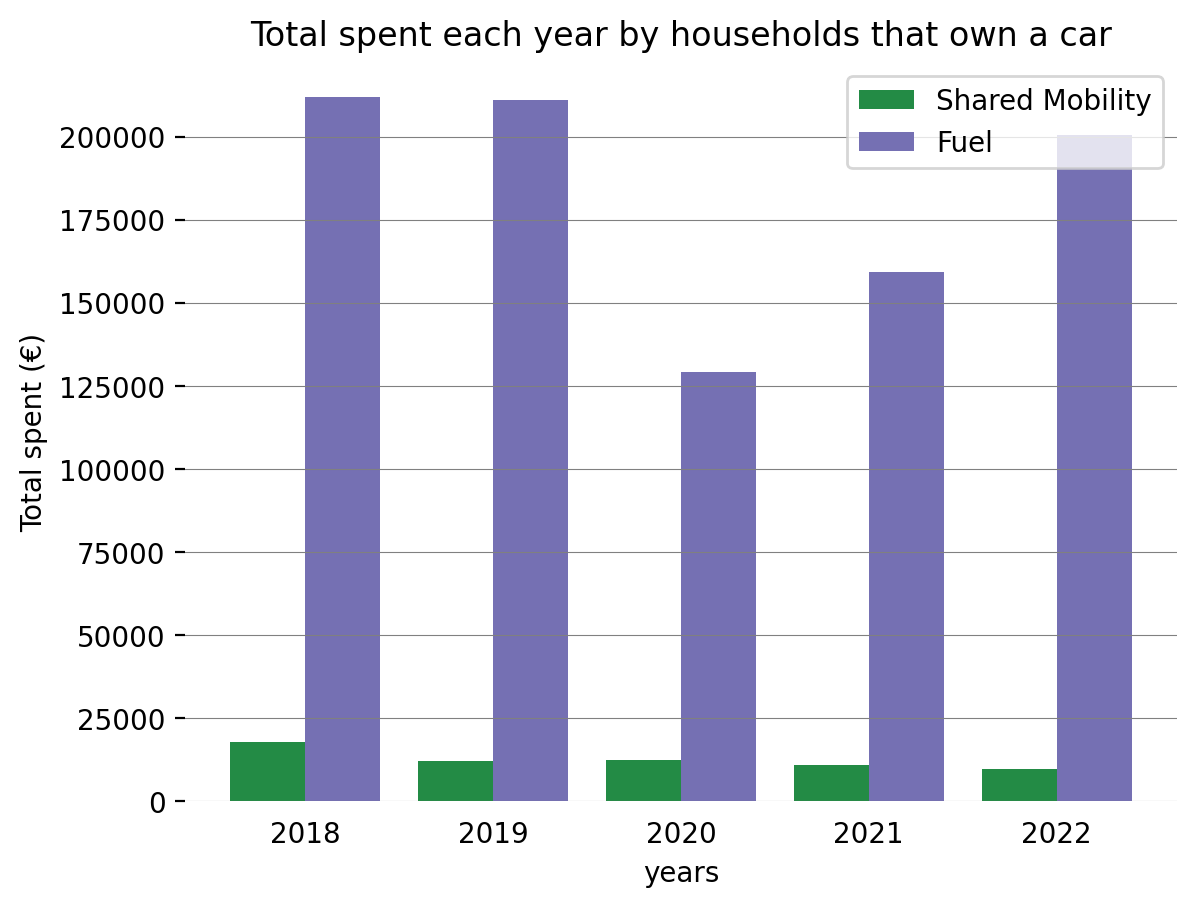

In [175]:
# Plot both DataFrames
codes_shared_mobility = ['code_07324', 'code_07241']
df_HBS_urban_car = df_HBS_urban_car.copy()
df_HBS_urban_car.loc[:,'shared_mobility'] = df_HBS_urban_car[codes_shared_mobility].sum(axis=1)

x = np.array(df_dict_keys, dtype = int)
Y1 = np.array(
        df_HBS_urban_car.groupby(['ANOENC'])['shared_mobility'].sum(), 
        dtype = float,
        )
Y2 = np.array(
        df_HBS_urban_car.groupby(['ANOENC'])['df_fuelExpenditure'].sum().to_list(), 
        dtype = float
        )

plt.bar(x - 0.2, Y1, 0.4,  
        label = 'Shared Mobility', 
        color = '#238b45')
plt.bar(x + 0.2 , Y2, 0.4, 
        label = 'Fuel',
        color = '#7570b3')

# Grid
plt.grid(axis = 'y', color = "grey", linewidth = "0.4")
plt.rc('axes', axisbelow=True)

# Remove ticks
plt.tick_params(
    axis='x',         
    which='both',     
    bottom=False,      
    top=False,        
    labelbottom=True)

plt.box()


plt.xlabel("years")
plt.ylabel("Total spent (€)")
plt.title("Total spent each year by households that own a car")
plt.legend()
plt.show();

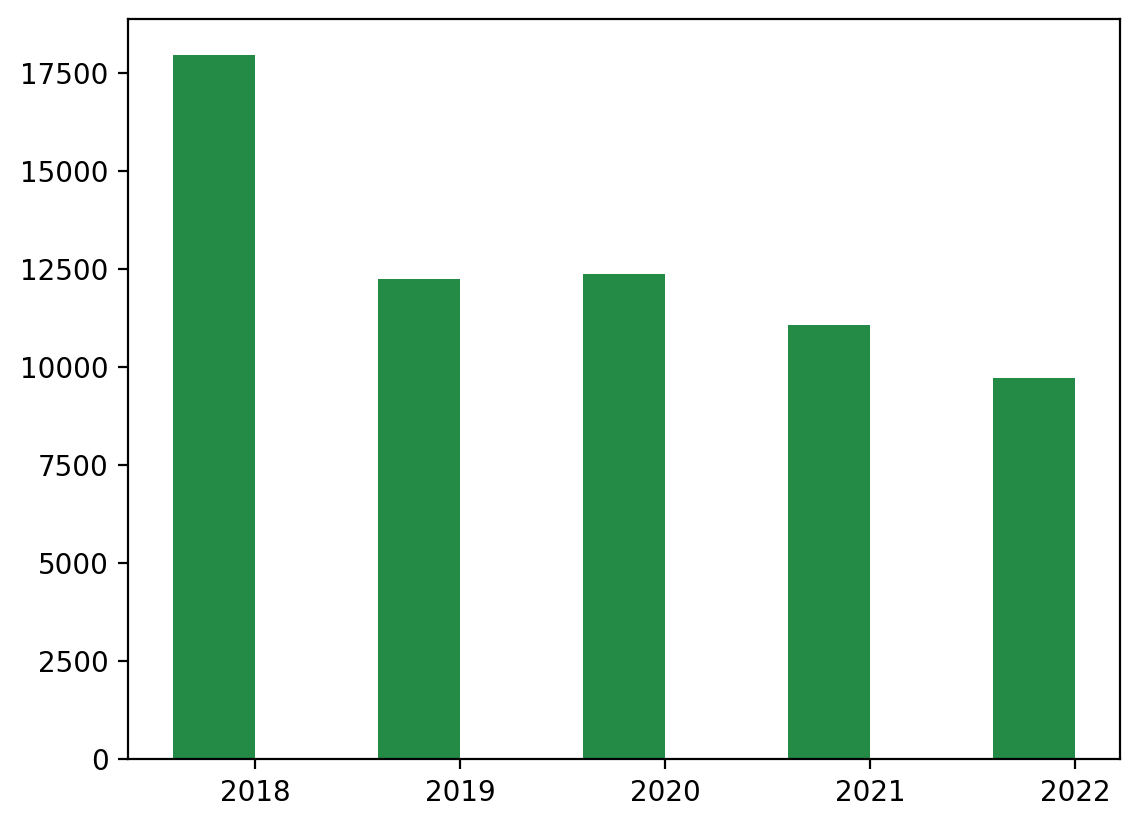

In [176]:
# Better look at shared mobility
plt.bar(x - 0.2, Y1, 0.4,  label = 'Shared Mobility Expenditures', color='#238b45');

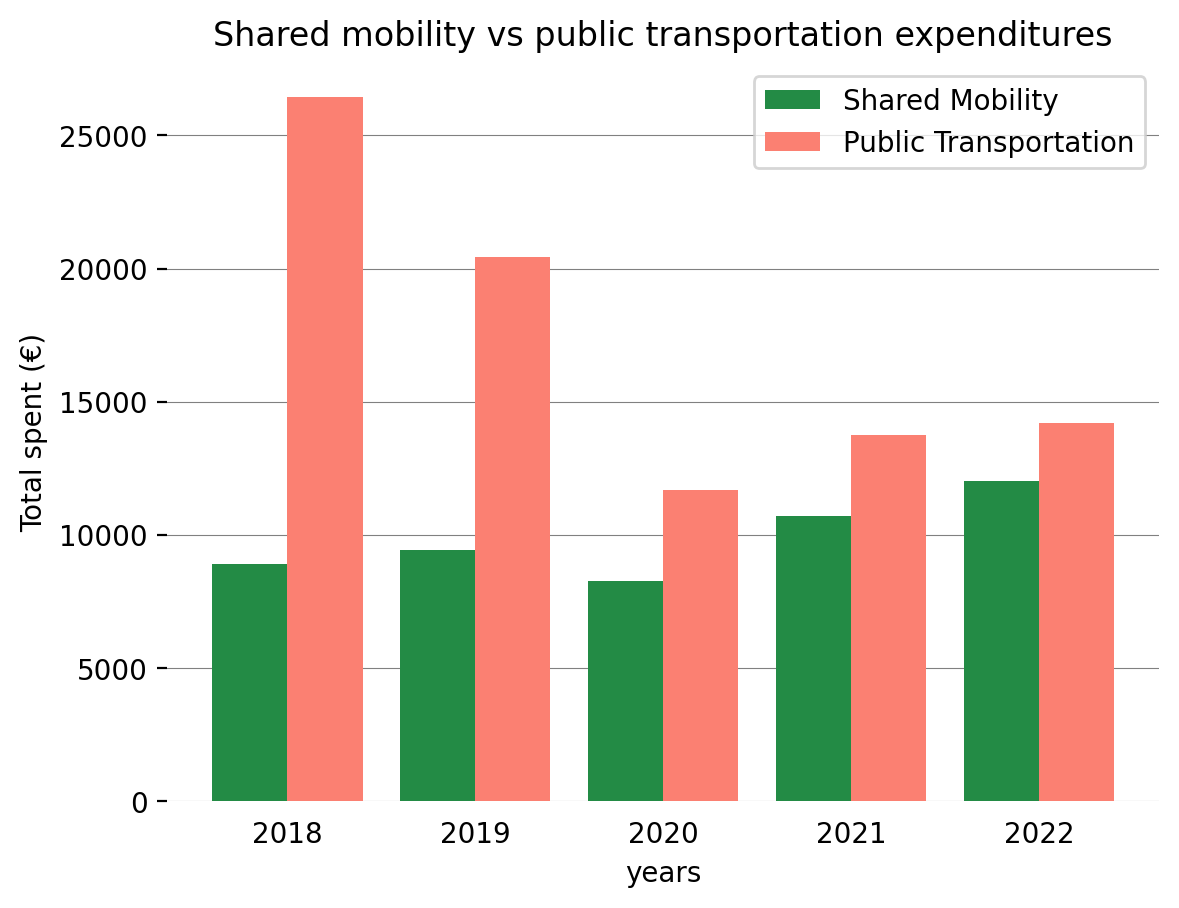

In [177]:
# Plot both DataFrames
df_HBS_urban_nocar = df_HBS_urban_nocar.copy()

df_HBS_urban_nocar.loc[:,'shared_mobility'] = df_HBS_urban_nocar[codes_shared_mobility].sum(axis=1)
df_HBS_urban_nocar.loc[:,'public_transport'] = df_HBS_urban_nocar[code_list_PT_all].sum(axis=1)

x = np.array(df_dict_keys, dtype = int)
Y1 = np.array(
        df_HBS_urban_nocar.groupby(['ANOENC'])['shared_mobility'].sum(), 
        dtype = float,
        )
Y2 = np.array(
        df_HBS_urban_nocar.groupby(['ANOENC'])['public_transport'].sum().to_list(), 
        dtype = float
        )

plt.bar(x - 0.2, Y1, 0.4,  
        label = 'Shared Mobility', 
        color = '#238b45')
plt.bar(x + 0.2 , Y2, 0.4, 
        label = 'Public Transportation',
        color = '#fb8072')

# Grid
plt.grid(axis = 'y', color = "grey", linewidth = "0.4")
plt.rc('axes', axisbelow=True)

# Remove ticks
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,        
    labelbottom=True)

plt.box()


plt.xlabel("years")
plt.ylabel("Total spent (€)")
plt.title("Shared mobility vs public transportation expenditures")
plt.legend()
plt.show();

In [178]:
df_HBS_urban_nocar.head(20)

NUMERO  code_07111  code_07112  code_07120  code_07130  code_07211  \
2        4         NaN         NaN         NaN         NaN         NaN   
5       12         NaN         NaN         NaN         NaN         NaN   
8       32         NaN         NaN         NaN         NaN         NaN   
14      62         0.0         0.0         0.0        0.00         0.0   
21     123         NaN         NaN         NaN         NaN         NaN   
27     157         0.0         0.0         0.0        0.00         0.0   
29     190         0.0         0.0         0.0        0.00         0.0   
31     197         NaN         NaN         NaN         NaN         NaN   
40     246         0.0         0.0         0.0        0.00         0.0   
41     259         NaN         NaN         NaN         NaN         NaN   
42     261         0.0         0.0         0.0        0.00         0.0   
45     278         NaN         NaN         NaN         NaN         NaN   
46     293         0.0         0.0         0.0       10.75         0.0   
47     304         0.0         0.0         0.0        0.00         0.0   
48     307         NaN         NaN         NaN         NaN         NaN   
49     312         NaN         NaN         NaN         NaN         NaN   
53     346         0.0         0.0         0.0        0.00         0.0   
54     354         0.0         0.0         0.0        0.00         0.0   
56     366         0.0         0.0         0.0        0.00         0.0   
57     367         NaN         NaN         NaN         NaN         NaN   

    code_07212  code_07213  code_07221  code_07222  ...  NMIEM13  EDADSP  \
2          NaN         NaN         NaN         NaN  ...        1      85   
5          NaN         NaN         NaN         NaN  ...        0      36   
8          NaN         NaN         NaN         NaN  ...        1      85   
14         0.0    0.000000         0.0         0.0  ...        0      38   
21         NaN         NaN         NaN         NaN  ...        0      84   
27         0.0    0.000000         0.0         0.0  ...        0      36   
29         0.0  105.414317         0.0         0.0  ...        0      26   
31         NaN         NaN         NaN         NaN  ...        0      82   
40         0.0    0.000000         0.0         0.0  ...        0      42   
41         NaN         NaN         NaN         NaN  ...        0      68   
42         0.0    0.000000         0.0         0.0  ...        0      37   
45         NaN         NaN         NaN         NaN  ...        0      62   
46         0.0    0.000000         0.0         0.0  ...        0      48   
47         0.0    0.000000         0.0         0.0  ...        0      78   
48         NaN         NaN         NaN         NaN  ...        0      47   
49         NaN         NaN         NaN         NaN  ...        0      60   
53         0.0    0.000000         0.0         0.0  ...        0      67   
54         0.0    0.000000         0.0         0.0  ...        0      84   
56         0.0    0.000000         0.0         0.0  ...        0      68   
57         NaN         NaN         NaN         NaN  ...        0      59   

    SEXOSP  ESTUDIOSSP  IMPEXAC  CAPROV_bool  df_fuelExpenditure  \
2        1           3      746         True                 0.0   
5        6           4      791         True                 0.0   
8        6           2      735         True                 0.0   
14       6           6     3301         True                 0.0   
21       6           2      800         True                 0.0   
27       1           6     1221         True                 0.0   
29       1           4     7824         True                 0.0   
31       1           2     1183         True                 0.0   
40       1           7     3013         True                 0.0   
41       1           3     1789         True                 0.0   
42       6           7     2156         True                 0.0   
45       6           1      688     

In [179]:
Y1 = np.array(df_HBS_urban_nocar.groupby(['ANOENC'])['code_07324'].quantile(0.95))

medians for shared mobility
for _year in dict_df_allExpenses_tidy.keys():
    df = dict_df_allExpenses_tidy[_year]
    df['shared_m_exp'] = df[shared_mobility].sum(axis=1)
    df['shared_m_exp']=  df['shared_m_exp'].replace(0, np.nan)
    mothly_shared.append(df['shared_m_exp'].quantile(0.75))

In [180]:
df_HBS_urban_nocar

NUMERO  code_07111  code_07112  code_07120  code_07130  code_07211  \
2           4         NaN         NaN         NaN         NaN         NaN   
5          12         NaN         NaN         NaN         NaN         NaN   
8          32         NaN         NaN         NaN         NaN         NaN   
14         62         0.0         0.0         0.0         0.0         0.0   
21        123         NaN         NaN         NaN         NaN         NaN   
...       ...         ...         ...         ...         ...         ...   
14503   20552         0.0         0.0         0.0         0.0         0.0   
14504   20557         NaN         NaN         NaN         NaN         NaN   
14506   20564         0.0         0.0         0.0         0.0         0.0   
14507   20567         NaN         NaN         NaN         NaN         NaN   
14508   20574         0.0         0.0         0.0         0.0         0.0   

       code_07212  code_07213  code_07221  code_07222  ...  NMIEM13  EDADSP  \
2             NaN         NaN         NaN         NaN  ...        1      85   
5             NaN         NaN         NaN         NaN  ...        0      36   
8             NaN         NaN         NaN         NaN  ...        1      85   
14            0.0         0.0         0.0         0.0  ...        0      38   
21            NaN         NaN         NaN         NaN  ...        0      84   
...           ...         ...         ...         ...  ...      ...     ...   
14503         0.0         0.0         0.0         0.0  ...        0      65   
14504         NaN         NaN         NaN         NaN  ...        0      76   
14506         0.0         0.0         0.0         0.0  ...        0      47   
14507         NaN         NaN         NaN         NaN  ...        0      73   
14508         0.0         0.0         0.0         0.0  ...        0      44   

       SEXOSP  ESTUDIOSSP  IMPEXAC  CAPROV_bool  df_fuelExpenditure  \
2           1           3      746         True                 0.0   
5           6           4      791         True                 0.0   
8           6           2      735         True                 0.0   
14          6           6     3301         True                 0.0   
21          6           2      800         True                 0.0   
...       ...         ...      ...          ...                 ...   
14503       1           4     1843         True                 0.0   
14504       1           6     1365         True                 0.0   
14506       6           7     1697         True                 0.0   
14507       6           2      565         True                 0.0   
14508       1           7    11000         True                 0.0   

       car_purchase  shared_mobility  public_transport  
2               0.0         0.000000          0.000000  
5               0.0         0.000000          0.000000  
8               0.0         0.000000          0.000000  
14              0.0        53.064859        206.732297  
21              0.0         0.000000          0.000000  
...             ...              ...               ...  
14503           0.0         0.000000          0.000000  
14504           0.0         0.000000          0.000000  
14506           0.0         0.000000        184.573699  
14507           0.0         0.000000          0.000000  
14508           0.0         0.968976          8.305930  

[6613 rows x 45 columns]

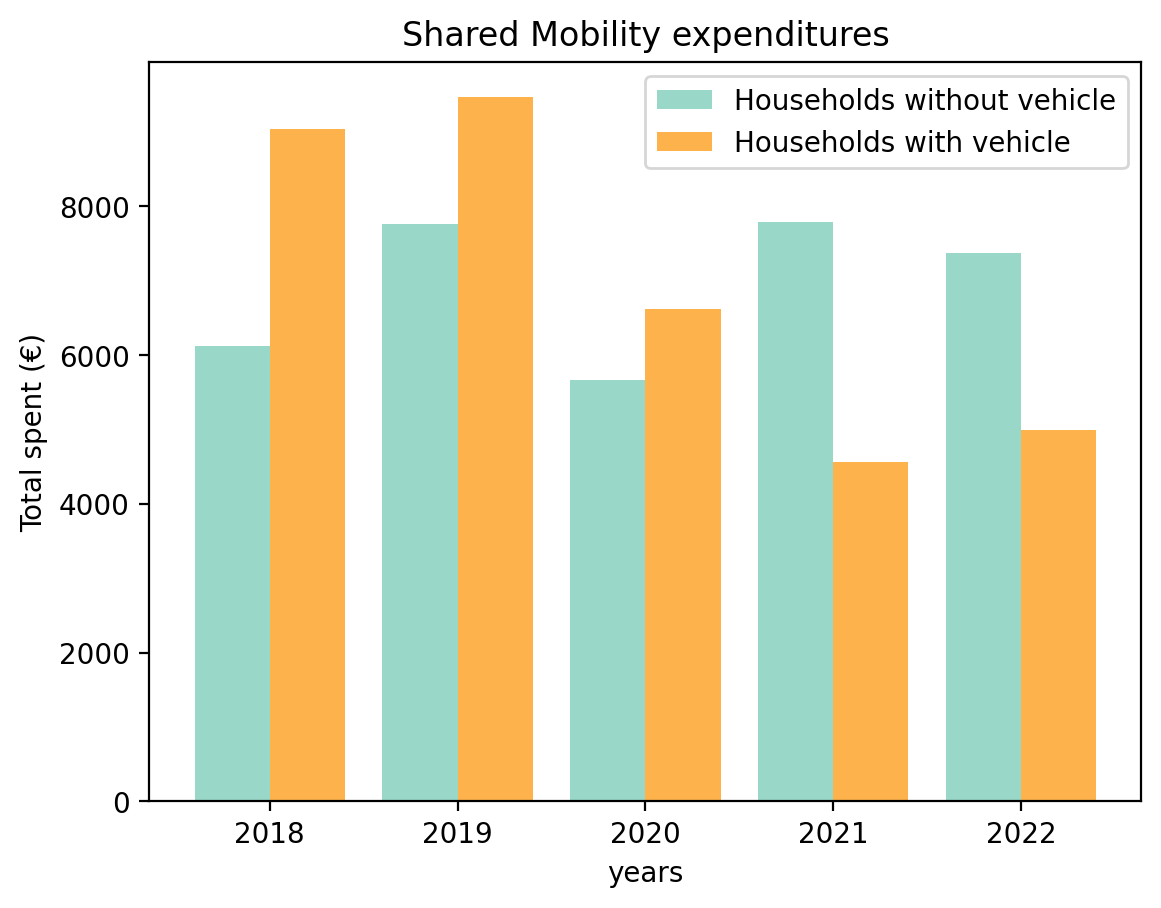

In [216]:
# Plot both DataFrames
x = np.array(df_dict_keys, dtype = int)
df_no  = df_HBS_urban_nocar.replace(0, np.nan)
df_= df_HBS_urban_car.replace(0, np.nan)
Y1 = np.array(df_HBS_urban_nocar.groupby(['ANOENC'])['code_07324'].sum().to_list(), dtype = float)
Y2 = np.array(df_HBS_urban_car.groupby(['ANOENC'])['code_07324'].sum().to_list(), dtype = float)

plt.bar(x - 0.2, Y1, 0.4,  label = 'Households without vehicle', color = '#99d8c9')
plt.bar(x + 0.2 , Y2, 0.4, label = 'Households with vehicle', color = '#feb24c')
  
#plt.xticks(X_axis, X)
plt.xlabel("years")
plt.ylabel("Total spent (€)")
plt.title("Shared Mobility expenditures")
plt.legend()
plt.show();

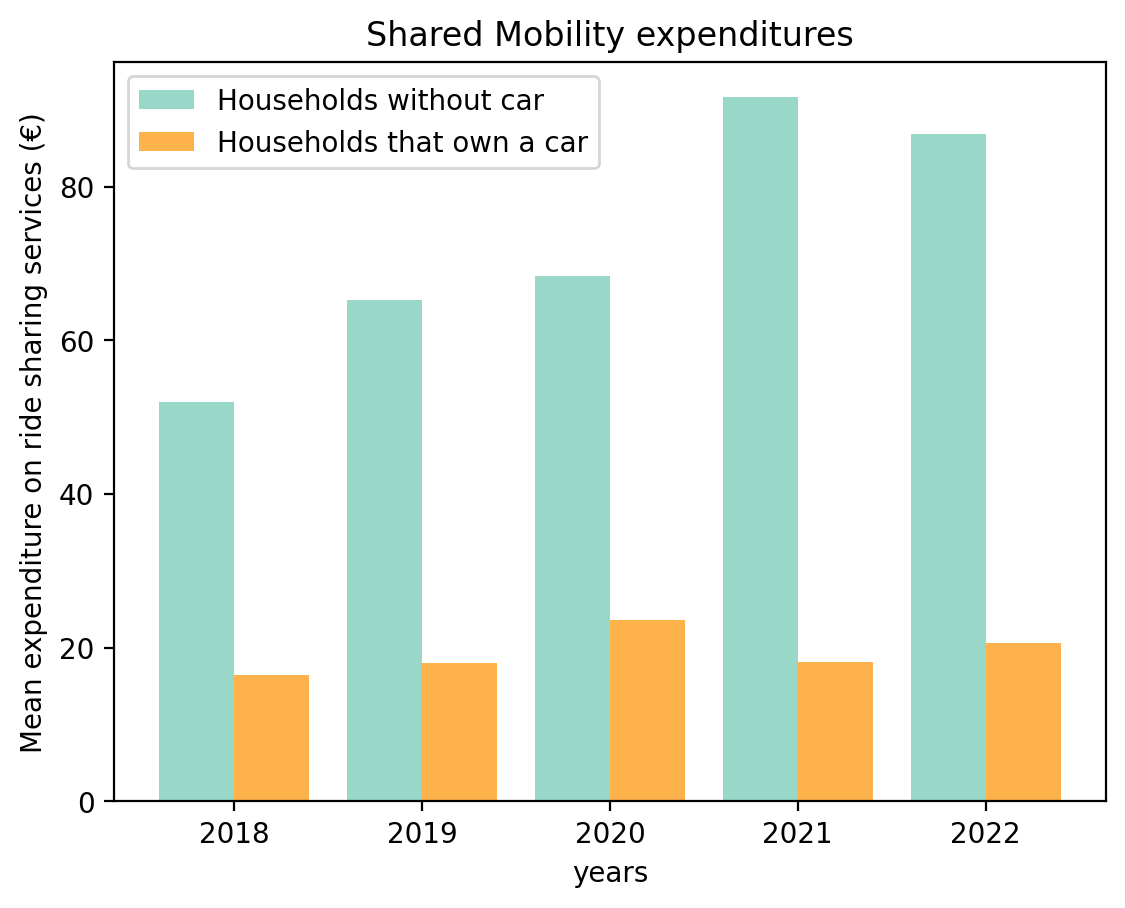

In [182]:
# Plot both DataFrames
x = np.array(df_dict_keys, dtype = int)
df_no  = df_HBS_urban_nocar.replace(0, np.nan)
df_= df_HBS_urban_car.replace(0, np.nan)
Y1 = np.array(df_no.groupby(['ANOENC'])['code_07324'].mean().to_list(), dtype = float)
Y2 = np.array(df_.groupby(['ANOENC'])['code_07324'].mean().to_list(), dtype = float)

plt.bar(x - 0.2, Y1, 0.4,  label = 'Households without car', color = '#99d8c9')
plt.bar(x + 0.2 , Y2, 0.4, label = 'Households that own a car', color = '#feb24c')
  
#plt.xticks(X_axis, X)
plt.xlabel("years")
plt.ylabel("Mean expenditure on ride sharing services (€)")
plt.title("Shared Mobility expenditures")
plt.legend()
plt.show();

> Households that own a car spend more on Mobility services than those that do not.

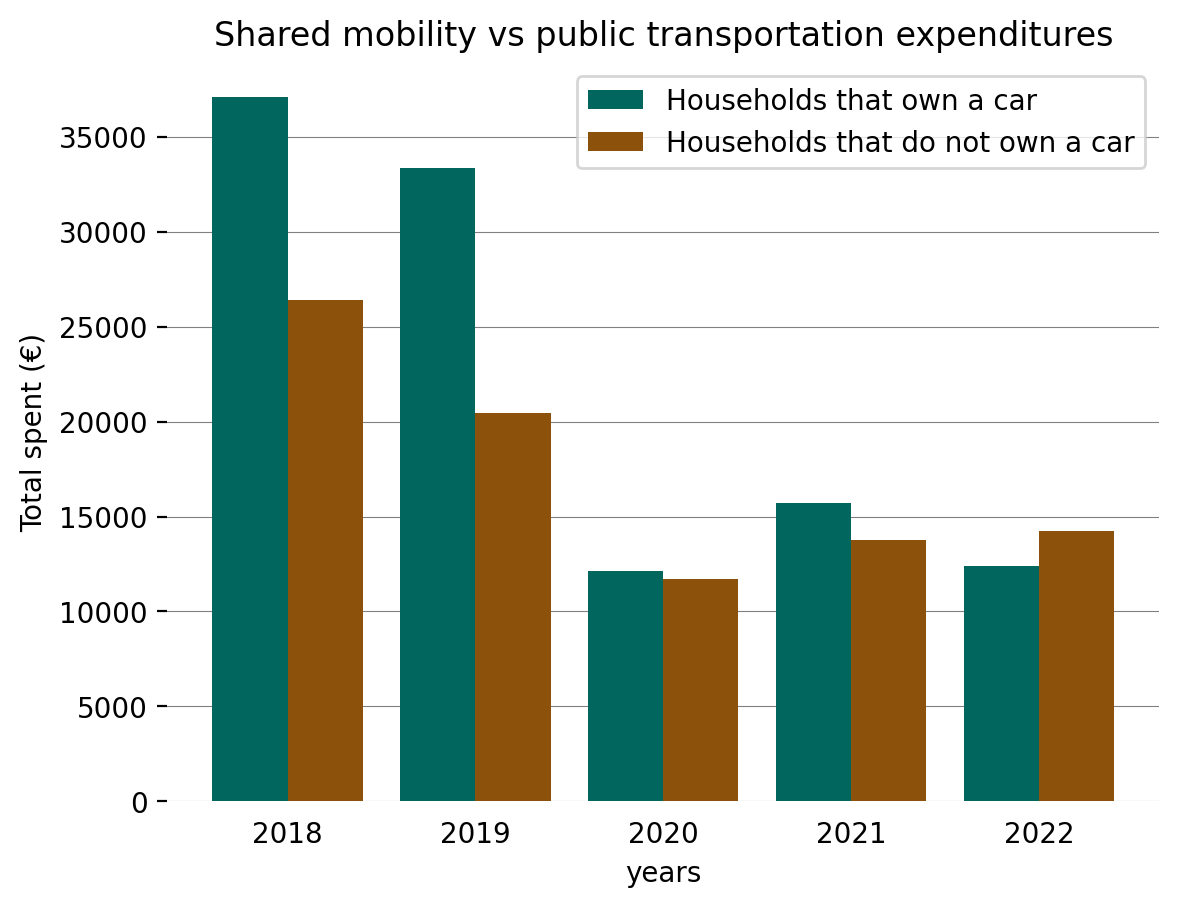

In [183]:
# Plot both DataFrames
df_HBS_urban_nocar = df_HBS_urban_nocar.copy()

df_HBS_urban_car.loc[:,'public_transport'] = df_HBS_urban_car[code_list_PT_all].sum(axis=1)
df_HBS_urban_nocar.loc[:,'public_transport'] = df_HBS_urban_nocar[code_list_PT_all].sum(axis=1)

x = np.array(df_dict_keys, dtype = int)
Y1 = np.array(
        df_HBS_urban_car.groupby(['ANOENC'])['public_transport'].sum(), 
        dtype = float,
        )
Y2 = np.array(
        df_HBS_urban_nocar.groupby(['ANOENC'])['public_transport'].sum().to_list(), 
        dtype = float
        )

plt.bar(x - 0.2, Y1, 0.4,  
        label = 'Households that own a car', 
        color = '#01665e')
plt.bar(x + 0.2 , Y2, 0.4, 
        label = 'Households that do not own a car',
        color = '#8c510a')

# Grid
plt.grid(axis = 'y', color = "grey", linewidth = "0.4")
plt.rc('axes', axisbelow=True)

# Remove ticks
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,        
    labelbottom=True)

plt.box()


plt.xlabel("years")
plt.ylabel("Total spent (€)")
plt.title("Shared mobility vs public transportation expenditures")
plt.legend()
plt.show();

6.4 _Are we moving more?_

In [184]:
# Import Spanish fuel prices 2018-2022
pricing_fuel = []
for year in df_dict_keys:
    file_df = pd.read_excel('data/gas_expenditures.xlsx', sheet_name=year)
    pricing_fuel.append(file_df) 
df_fuel_pricing = pd.concat(pricing_fuel, axis=0, ignore_index=True)

In [185]:
# Inspect DataFrame
df_fuel_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fecha                   240 non-null    datetime64[ns]
 1   Super 95                240 non-null    object        
 2   Super 95 (Sin imp.)     240 non-null    object        
 3   Diesel                  240 non-null    object        
 4   Diesel (Sin imp.)       240 non-null    object        
 5   Diesel Cal.             240 non-null    object        
 6   Diesel Cal. (Sin imp.)  240 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 13.3+ KB


In [186]:
# Change column names
columns_names = df_fuel_pricing.columns.values
new_col_names = []
for name in columns_names:
    name = name.replace(" ", "_")
    name = name[0:12]
    name = name.replace("(", "")
    name = name.replace(".", "")
    new_col_names.append(name)
df_fuel_pricing.columns = new_col_names 


In [187]:
# Change data types from str to int
for col in df_fuel_pricing.columns[1:]:
    df_fuel_pricing[col] = df_fuel_pricing[col].str.replace(",", ".")
    df_fuel_pricing[col] = df_fuel_pricing[col].str.slice(stop = 5 )
    df_fuel_pricing[col] = df_fuel_pricing[col].astype(float)

In [188]:
# Mean values per year
mean_fuel = df_fuel_pricing.set_index('Fecha').groupby(pd.Grouper(freq='Y')).mean(); mean_fuel

Super_95  Super_95_Si    Diesel  Diesel_Sin_  Diesel_Cal  \
Fecha                                                                  
2018-12-31  1.292680     0.607080  1.206240     0.629460    0.761720   
2019-12-31  1.294627     0.597157  1.213039     0.623608    0.768863   
2020-12-31  1.184410     0.506103  1.079667     0.513282    0.575000   
2021-12-31  1.380245     0.668020  1.244980     0.649878    0.729449   
2022-12-31  1.773216     0.992745  1.787059     1.097941    1.286510   

            Diesel_Cal_  
Fecha                    
2018-12-31     0.539680  
2019-12-31     0.538608  
2020-12-31     0.378564  
2021-12-31     0.506102  
2022-12-31     0.966569

In [189]:
# From df to lists
mean_diesel_price = mean_fuel.Diesel.to_list()
mean_gasoline_price = mean_fuel.Super_95.to_list()

In [190]:
# Get fuel expenses per year
diesel_expenses = df_HBS_urban_car.groupby('ANOENC')['code_07221'].sum().to_list()
gasoline_expenses = df_HBS_urban_car.groupby('ANOENC')['code_07222'].sum().to_list()

In [191]:
# Get liters bought 
diesel_acquired = [i / j for i, j in zip(diesel_expenses, mean_diesel_price)]
gasoline_acquired = [i / j for i, j in zip(gasoline_expenses, mean_gasoline_price)]

In [192]:
# get kilometers traveled
# Considering a 6 litre tank
km_travelled_diesel = [i * (100/6) for i in diesel_acquired ]
km_travelled_gasoline = [i * (100/6) for i in gasoline_acquired]
total_travelled = [x + y for x, y in zip(km_travelled_diesel, km_travelled_gasoline)]


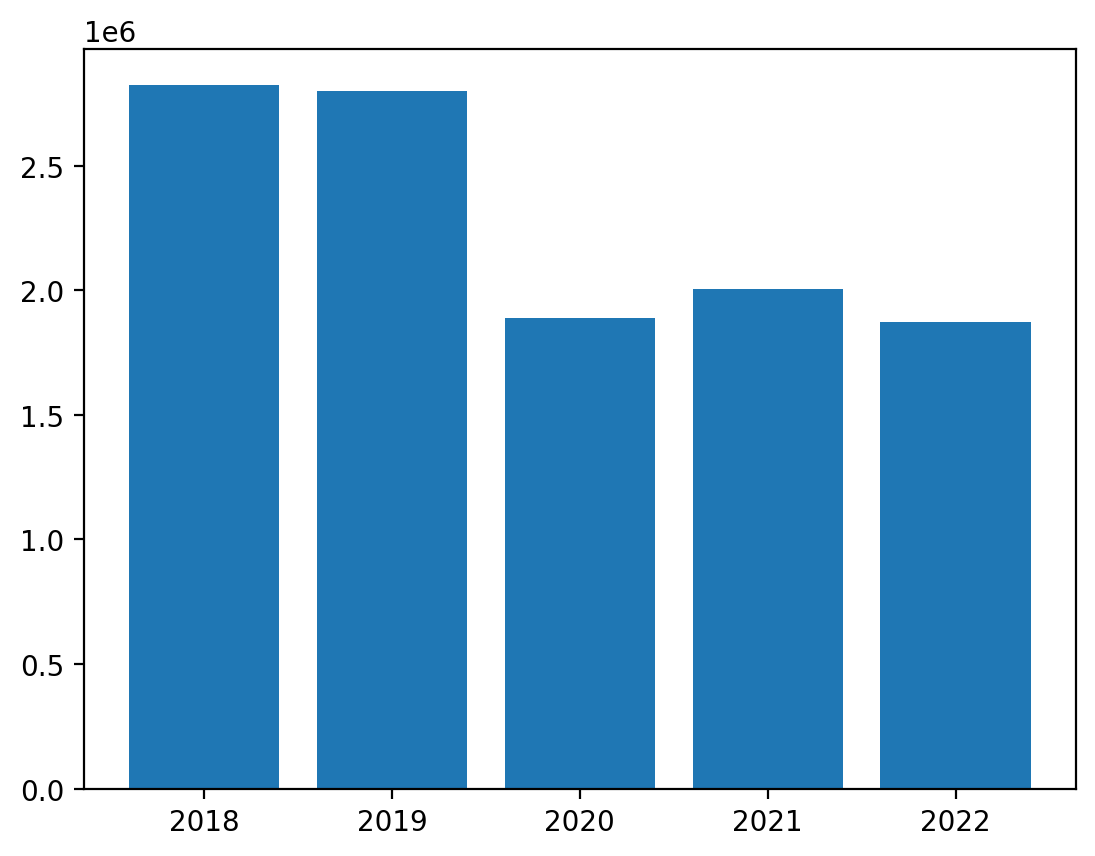

In [193]:
# Plot kms travelled
plt.bar(df_dict_keys, total_travelled);

<a id='result'></a>
## 4. Result Evaluation

The results obtained will be separated by research questions.

1. _Are we spending less on transportation lately?_  

How have our transportation expenditures changed in the last five years?
Firstly, I obtained the total national household transportation expenditures from 2018-2022. I included expenses related to all types of local collective and individual mobility (metro, bus, local trains, fuel, shared mobility, car purchases, personal mobility vehicle purchases, driving licenses, parking, etc.). Results show that our transportation expenses increased before COVID-19, dropped in 2020, and are now rising again. 2019 and 2022 show the highest numbers, with 56 and 55 thousand million euros, respectively.

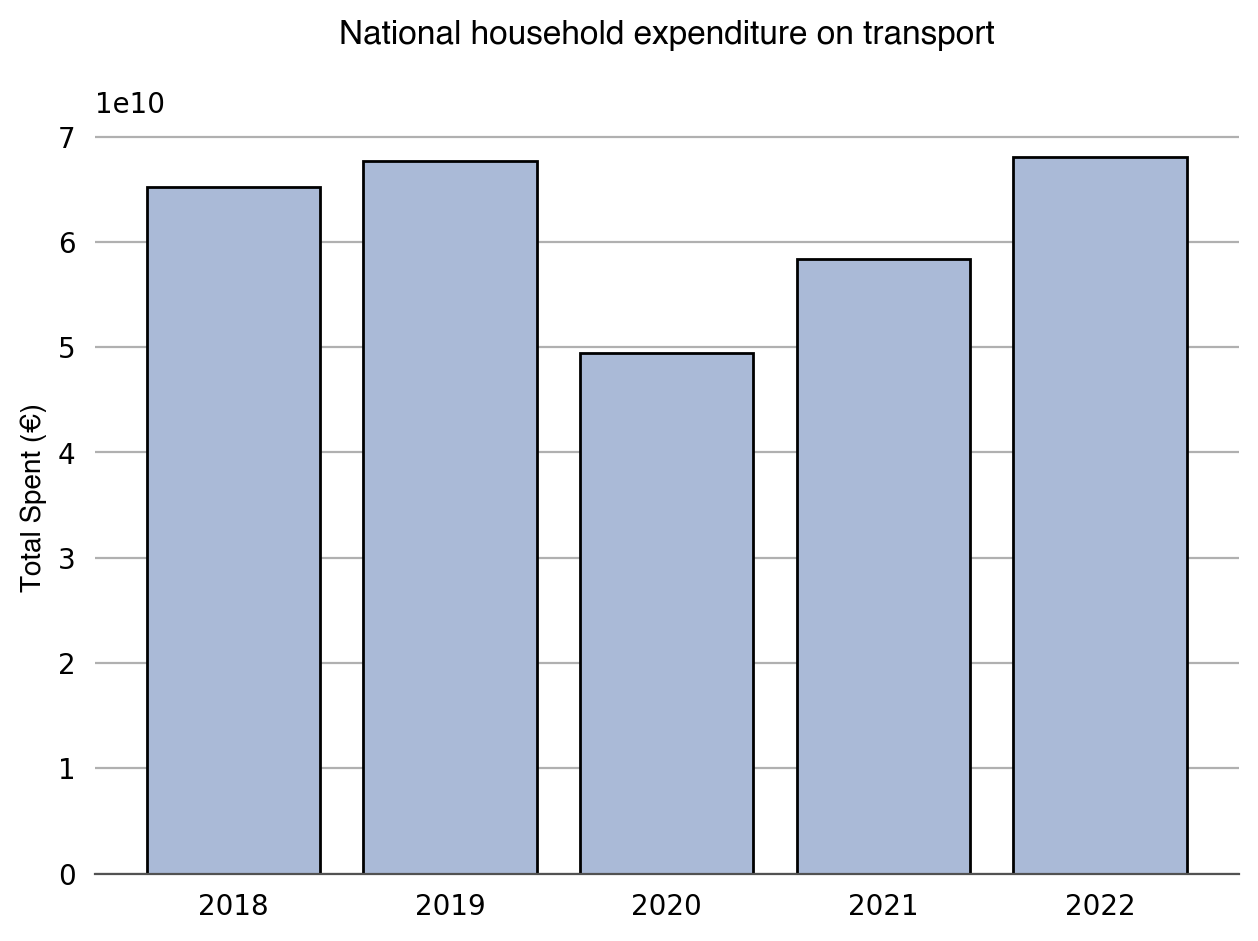

In [194]:
# Plot expenses
color = ['#AABAD7']
y_label = 'Total Spent (€)'
title_ = 'National household expenditure on transport'
x = plot2print(df_dict_keys, transpExpense_list, color,  y_label, title_)
#plt.suptitle('National household expenditure on transport', fontsize=14, y=0.97, fontname= 'Helvetica')

After that, I obtained the median percentage of total national household expenditures allocated to transportation. This median indicates what share of our total spending goes to transportation. These percentages tell a different story before COVID-19. In 2018 9.54 % of all our expenses were dedicated to local transportation, then in 2019, it went down to 9.37%, then to 7.30% in 2020, and rose to 8.52% in 2021. Last year it had a 1.34% increase, surpassing its pre-pandemic values. 

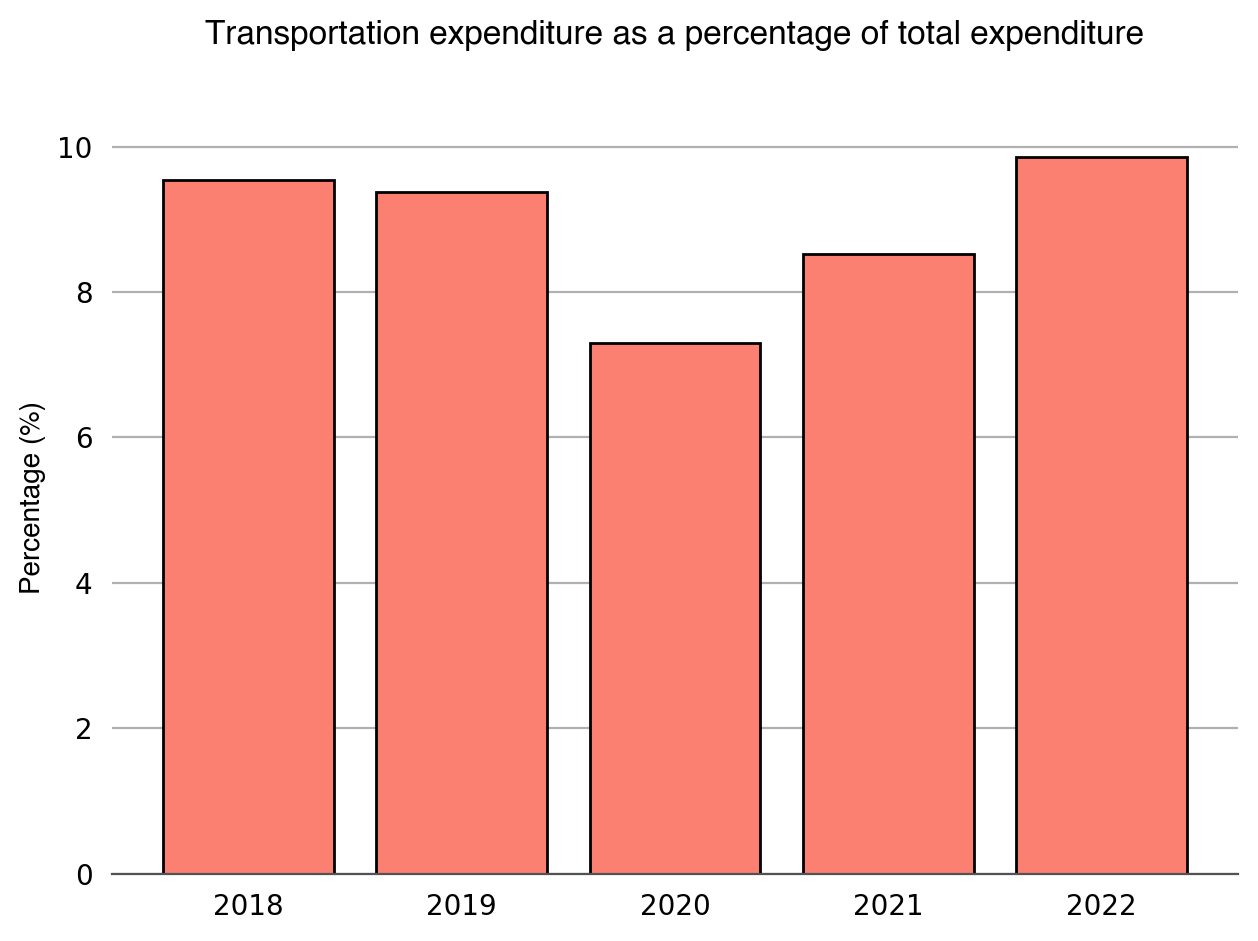

In [195]:
# Plot percentages
transp_perc_list = transp_perc.to_list()
color = ['#fb8072']
y_label = 'Percentage (%)'
title_ = 'Transportation expenditure as a percentage of total expenditure'
plot2print(df_dict_keys, transp_perc_list, color,  y_label, title_)

So yeah, we have been spending more in the last three years, and a higher share of our total expenditures goes to transportation.

2. _Are we spending more on private cars (purchase and use)?_  

As mentioned earlier, personal vehicles usually account for most transportation expenditures [7]. The total amount includes purchase, usage, and maintenance expenses. These expenditures were contained in several survey variables that were analyzed separately.
First, the analysis of car purchases (old and new) evidenced the same movements as the overall transportation graph: rising tendencies prior to and after COVID-19.
The story changes when it comes to households that reside in bigger cities. Their graph is presented below. Before COVID-19, the rise is like the first plot, but after 2021 it starts to decrease. 
This is, national car purchases have been rising since 2020, not reaching yet 2018 or 2019 values. However, in more populated urban centers, 2022 reported fewer outflows than in 2021. The difference between 2021 and 2022 is almost 187 million euros.


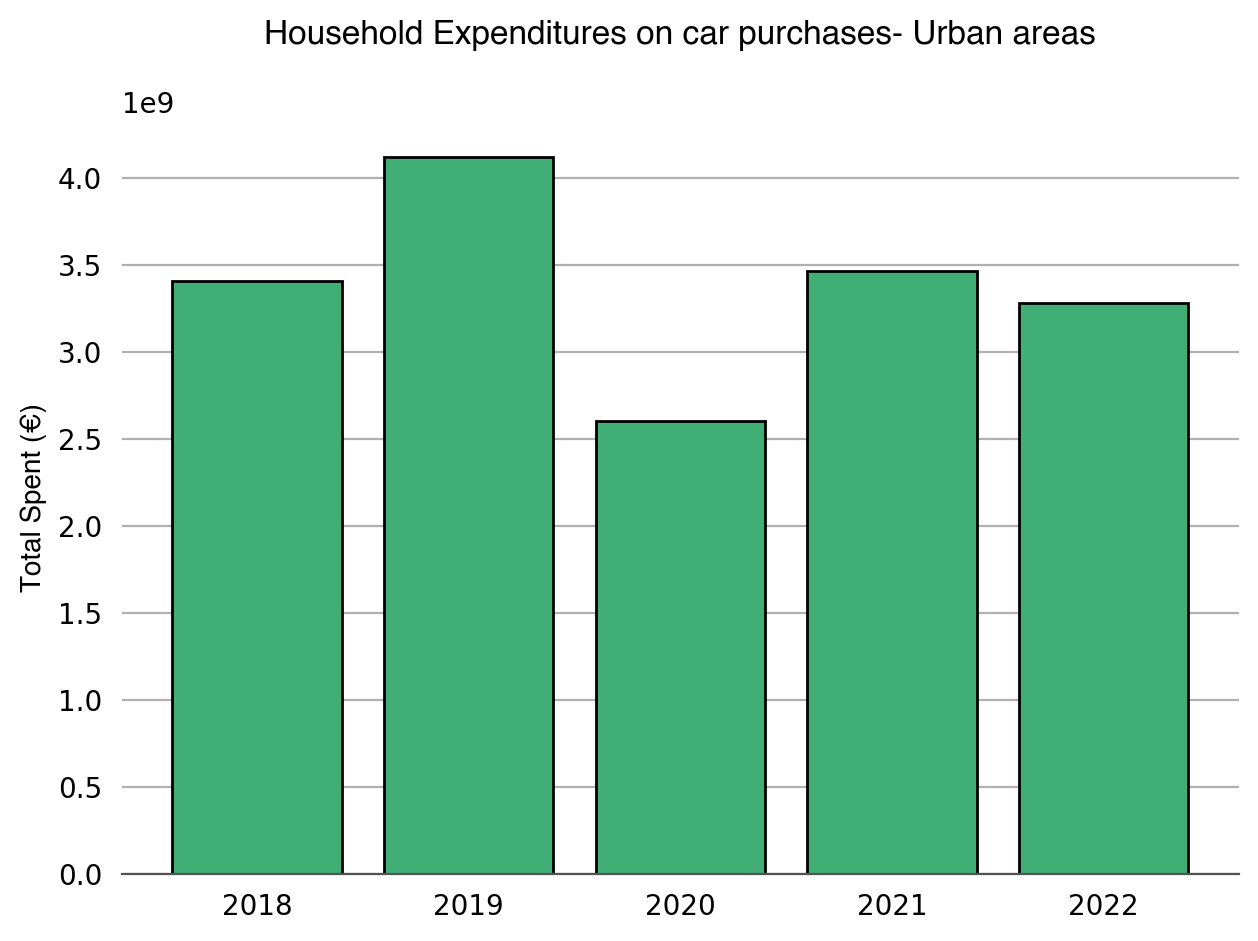

In [196]:
# plot expenses for the article
color = ['#41ae76']
y_label = 'Total Spent (€)'
title_ = 'Household Expenditures on car purchases- Urban areas'
plot2print(df_dict_keys, urban_expenses_privateCar, color,  y_label, title_)

The existence of a trend for both populations was inspected using the Mann-Kendall statistical test. The results highlighted that there is no trend in the data provided.


The second set of variables analyzed were those related to fuel and electricity (used by electric or hybrid cars). 

Expenditures on traditional fuels (diesel and gasoline) are similar to the first chart, with rising tendencies before and after COVID-19 but, in this case, not reaching pre-pandemic figures. On the contrary, alternative fuels (hydrogen, biodiesel, electricity, etc.) met their highest expenditure year in 2022, as shown in the plot below.

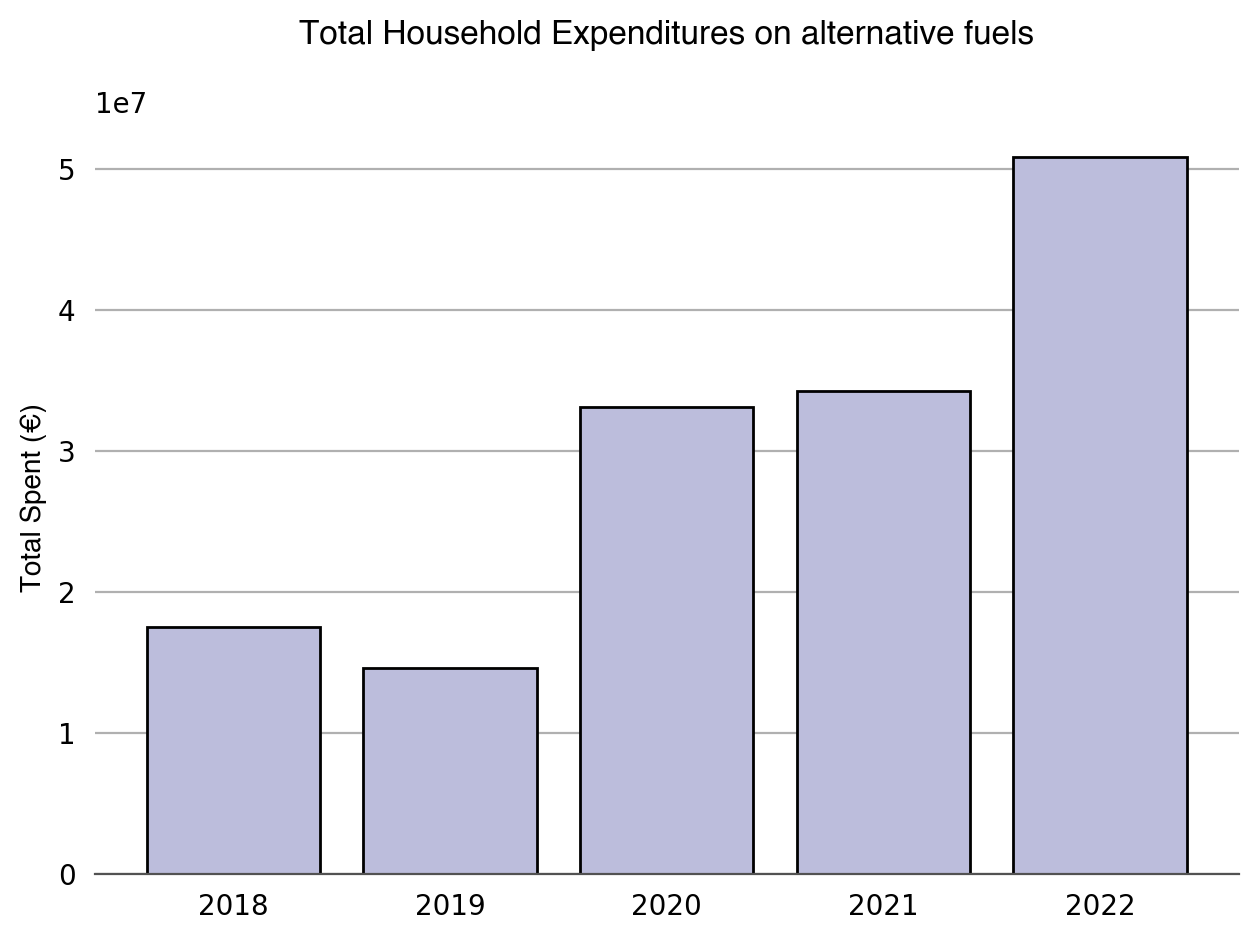

In [197]:
# plot expenses for the article
color = ['#bcbddc']
y_label = 'Total Spent (€)'
title_ = 'Total Household Expenditures on alternative fuels'
plot2print(df_dict_keys, total_expenses_altFuel, color,  y_label, title_)


The following chart shows one last attempt to understand the changes in private car expenditures. This time I examine the relationship between private-car expenses and income. The plot below was made for each year of 2018-2022, and the results were similar. This one corresponds to 2022; it shows the monthly income in the x-axis, and the y-axis shows monthly purchase, fuel, insurance, and maintenance car expenditures. The red vertical line indicates the income median for Spain (2300 €). The horizontal red line shows the percentage of the salary usually destined for transportation according to research (15%) [11-12]. Fortunately, households with a share spent on private-car expenditures higher than 15% and lower income do not constitute the majority of the sample (represented in light blue); the majority are those with lower income and lower expenses.


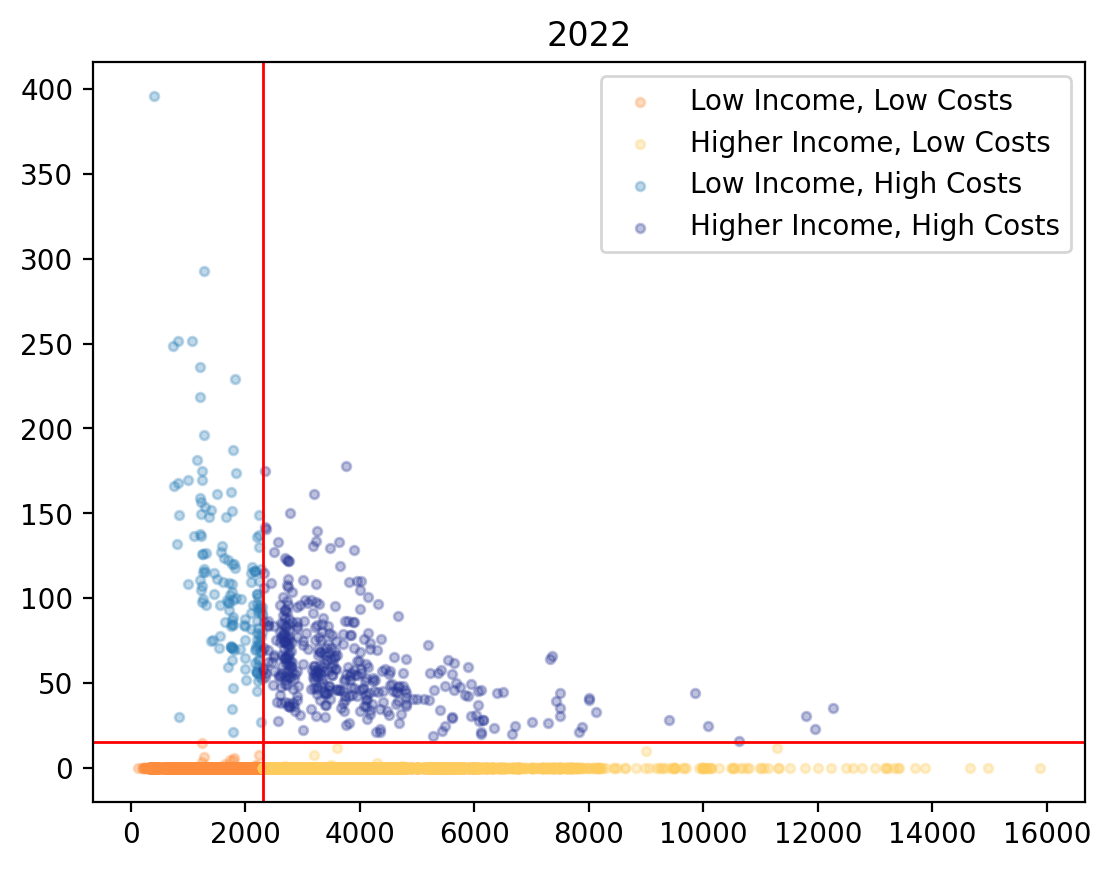

3. _Is the use of Personal Mobility Vehicles (kickscooters, bikes, etc.) rising?_  

I was surprised by the chart below. Personal mobility vehicles (scooters, bikes, electric bikes, etc.) were the only expenditure that did not have their lowest value in 2020. As shown, the amount reached in 2020 was lower when compared to 2019 but not when compared to 2018.

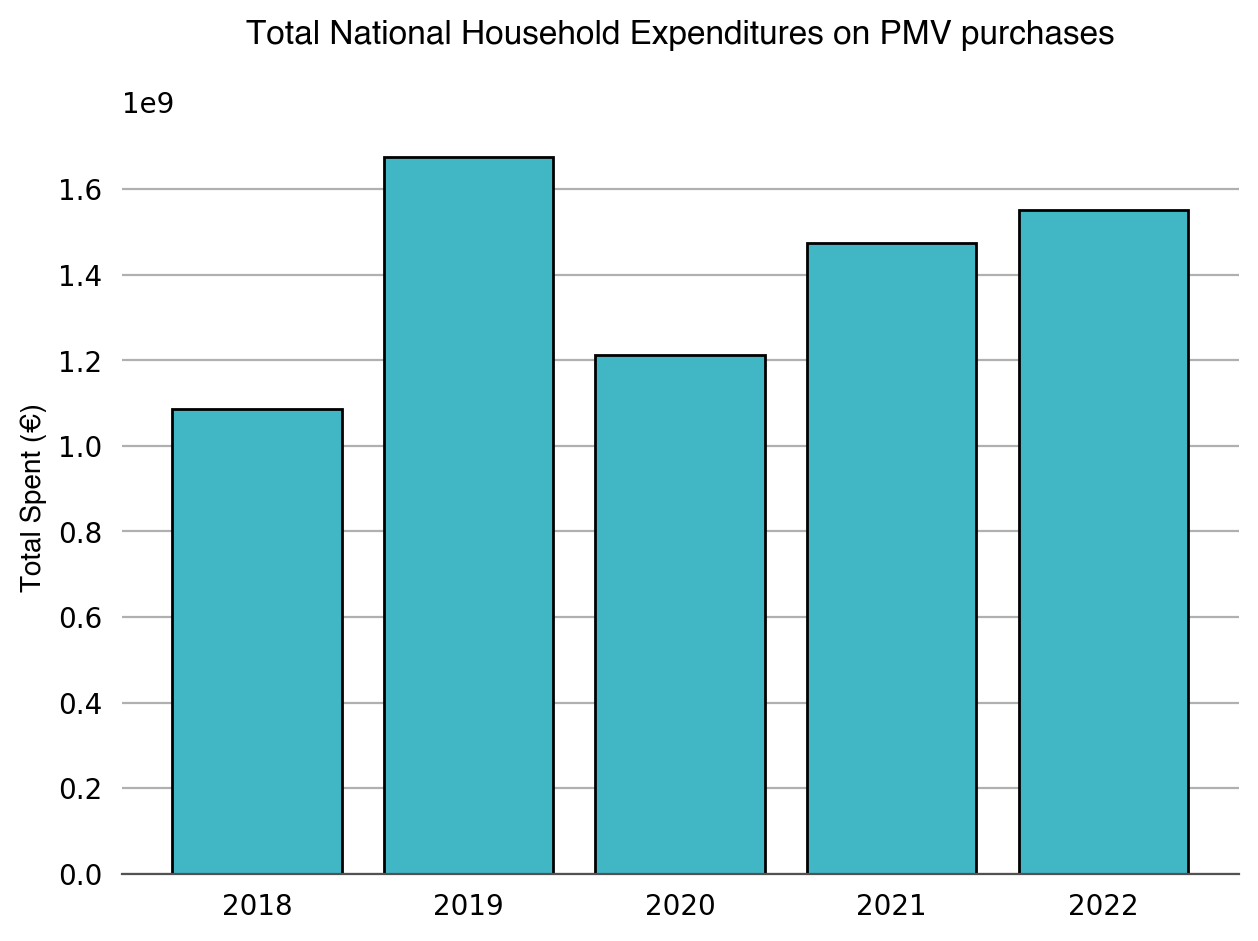

In [198]:
# Plot expenses
color = ['#41b6c4']
y_label = 'Total Spent (€)'
title_ = 'Total National Household Expenditures on PMV purchases'
plot2print(df_dict_keys, total_expenses_PMV, color,  y_label, title_)

4. _Are we spending more on public transportation?_    

Yes, but not really. The following chart shows that we have been increasing our expenditure on public transportation services since 2020. Before that year, these expenditures were going down. Additionally, we have not spent as much as we did back in 2019.

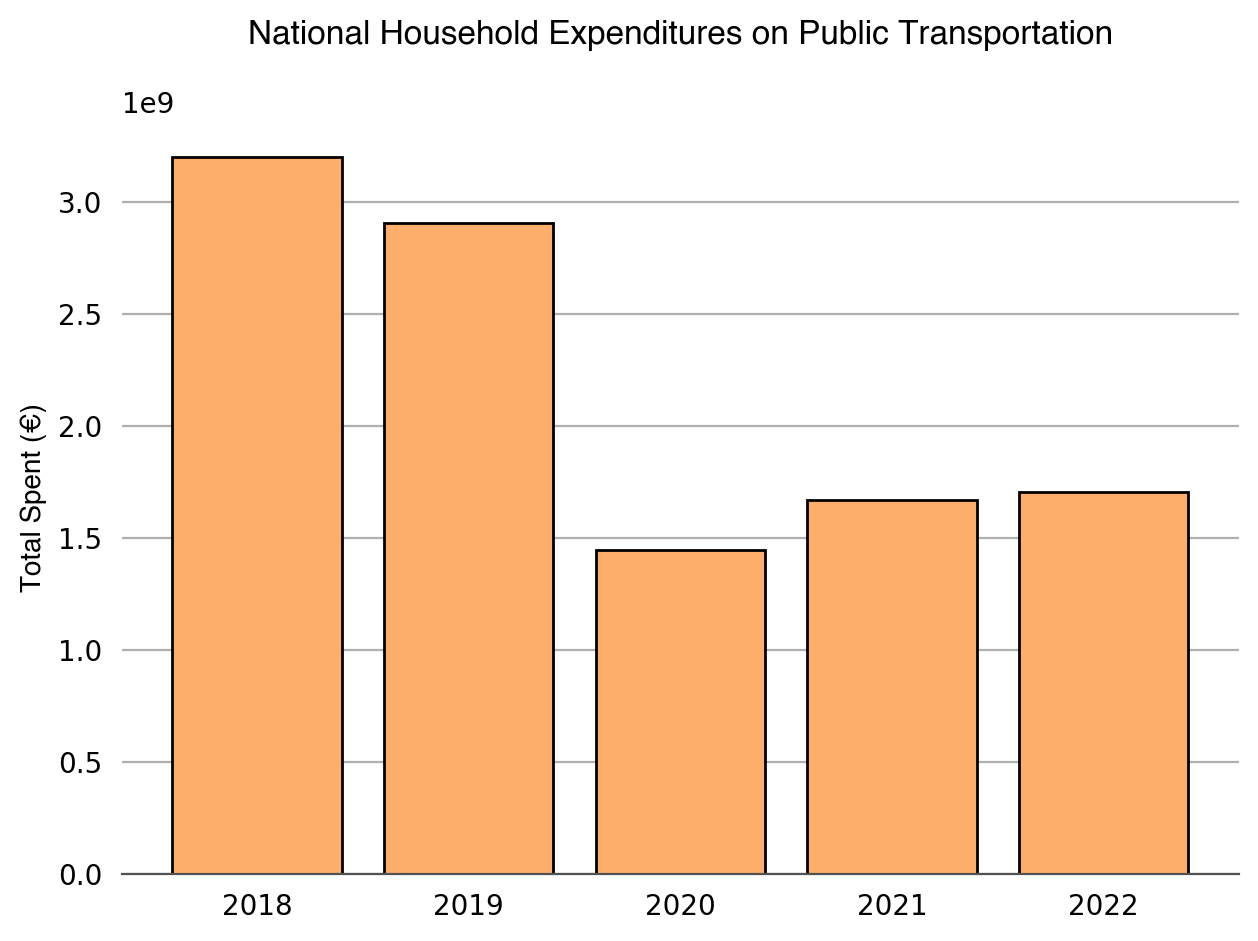

In [199]:
# Plot PT
color = ['#fdae6b']
y_label = 'Total Spent (€)'
title_ = 'National Household Expenditures on Public Transportation'
plot2print(df_dict_keys, total_expenses_PTall, color,  y_label, title_)

6. _Are new mobility trends allowing us to spend less?_  

First, I checked the expenditures in shared mobility in the last five years. The plot does not show a consistent trend. In 2018 the expenses reached their maximum, decreased in 2019, and kept going down in 2020. In 2021 expenditures went up and down again in 2020.

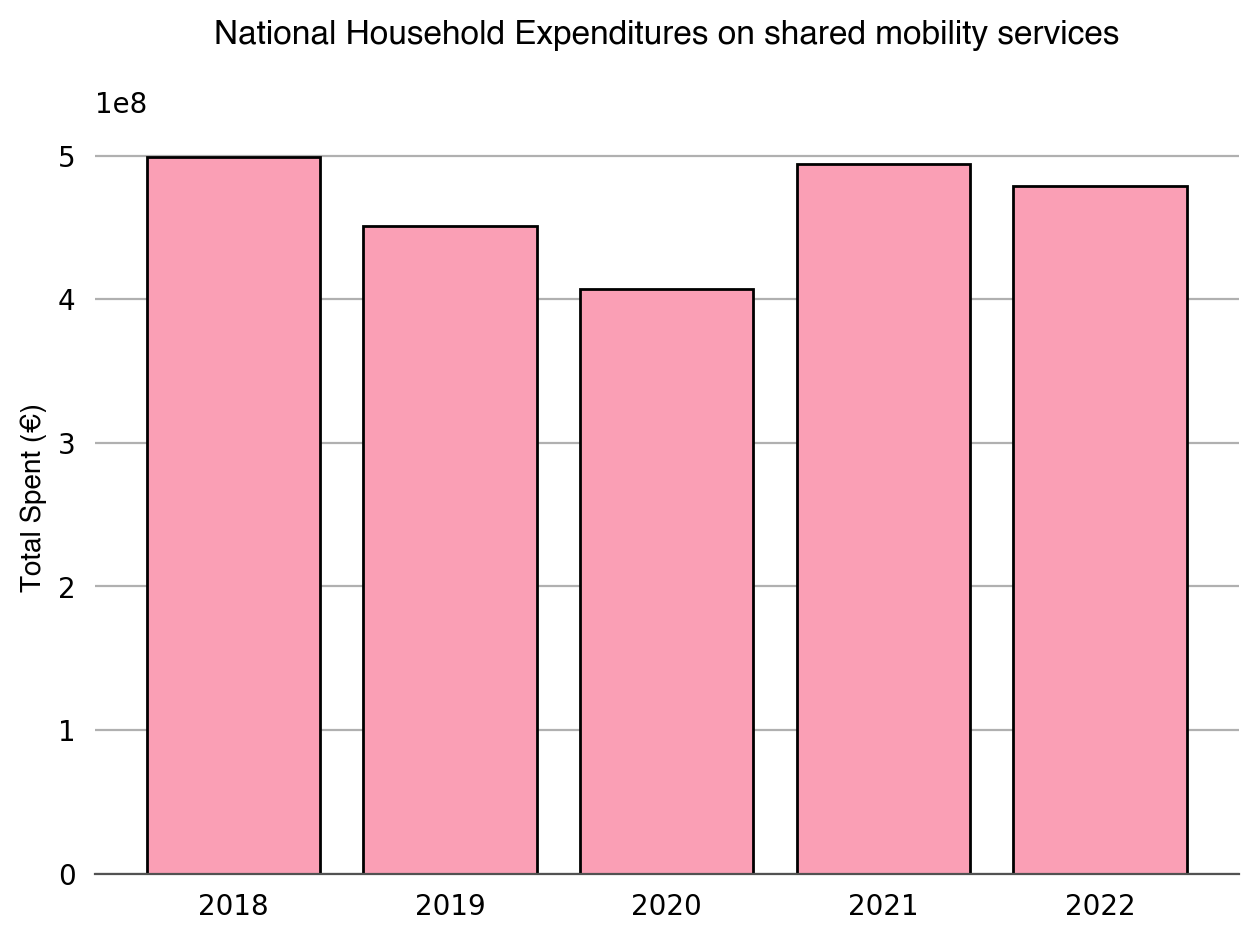

In [200]:
color = ['#fa9fb5']
y_label = 'Total Spent (€)'
title_ = 'National Household Expenditures on shared mobility services'
plot2print(df_dict_keys, total_expenses_SMall, color,  y_label, title_)

6.3 _Exploration of shared mobility vs traditional means_

For the following exploration, I separated households that own a car and those that do not.  
The segmentation aimed to see if shared mobility progressively replaces these families' traditional transportation means.
This 'replacement' would be taking place if there were evidence of decreased expenditures on traditional transportation and increased expenses on shared mobility services over the last years.  
For those households with a car, the substitution would be evidenced by fewer fuel expenditures and those that do not owe a car their public transportation expenditure.  
This exploration is very superficial because being certain would require more data, but this could be an excellent initial approximation.
The plot shows that, compared to fuel spending, shared mobility has a long way to go. 

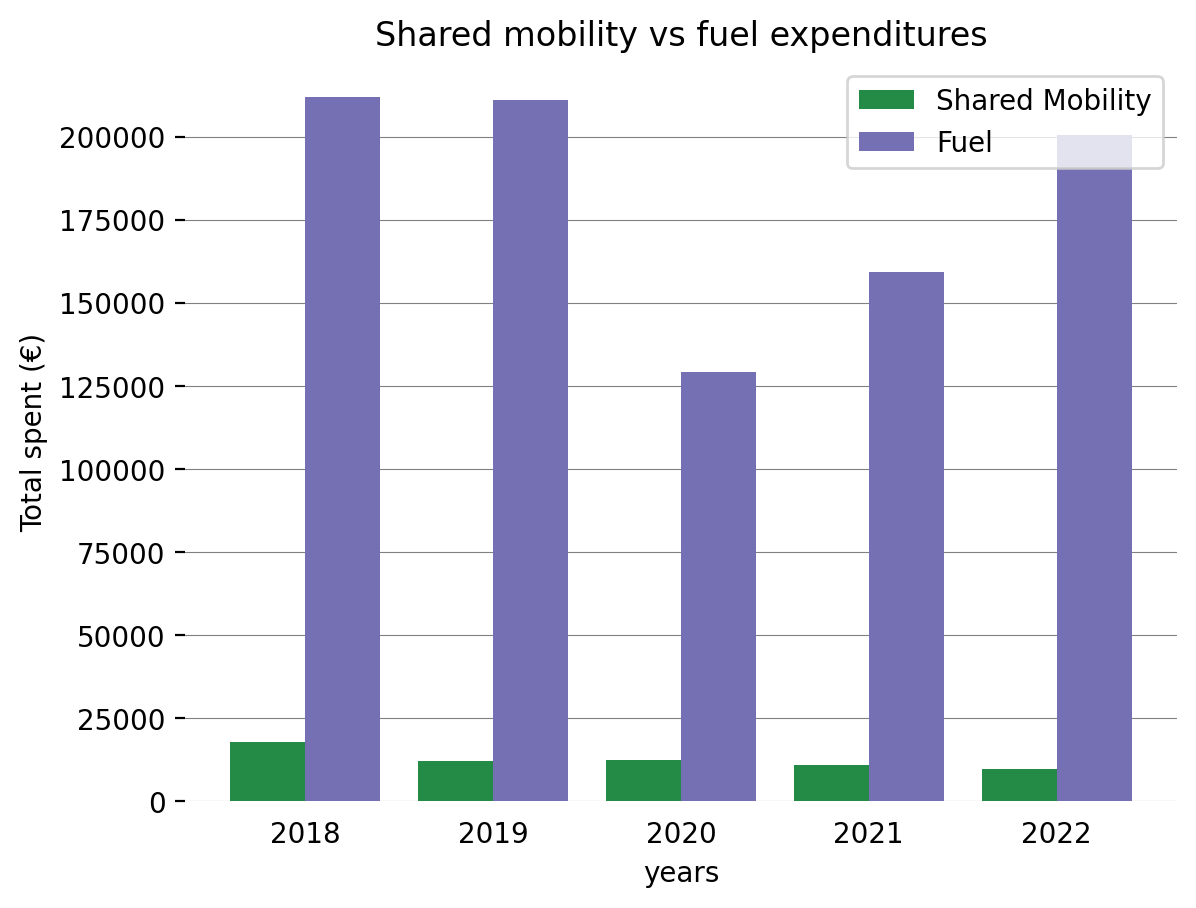

In [201]:
# Plot both DataFrames
codes_shared_mobility = ['code_07324', 'code_07241']
df_HBS_urban_car = df_HBS_urban_car.copy()
df_HBS_urban_car.loc[:,'shared_mobility'] = df_HBS_urban_car[codes_shared_mobility].sum(axis=1)

x = np.array(df_dict_keys, dtype = int)
Y1 = np.array(
        df_HBS_urban_car.groupby(['ANOENC'])['shared_mobility'].sum(), 
        dtype = float,
        )
Y2 = np.array(
        df_HBS_urban_car.groupby(['ANOENC'])['df_fuelExpenditure'].sum().to_list(), 
        dtype = float
        )

plt.bar(x - 0.2, Y1, 0.4,  
        label = 'Shared Mobility', 
        color = '#238b45')
plt.bar(x + 0.2 , Y2, 0.4, 
        label = 'Fuel',
        color = '#7570b3')

# Grid
plt.grid(axis = 'y', color = "grey", linewidth = "0.4")
plt.rc('axes', axisbelow=True)

# Remove ticks
plt.tick_params(
    axis='x',         
    which='both',     
    bottom=False,      
    top=False,        
    labelbottom=True)

plt.box()


plt.xlabel("years")
plt.ylabel("Total spent (€)")
plt.title("Shared mobility vs fuel expenditures")
plt.legend();

Houses that do not own a car show this 'replacement' trend mentioned above. As shown in the plot, their expenditures on public transportation are decreasing even before COVID-19, and shared mobility expenses are increasing. Unfortunately, as public transportation is the cheapest option, this trend will not likely reduce our costs.

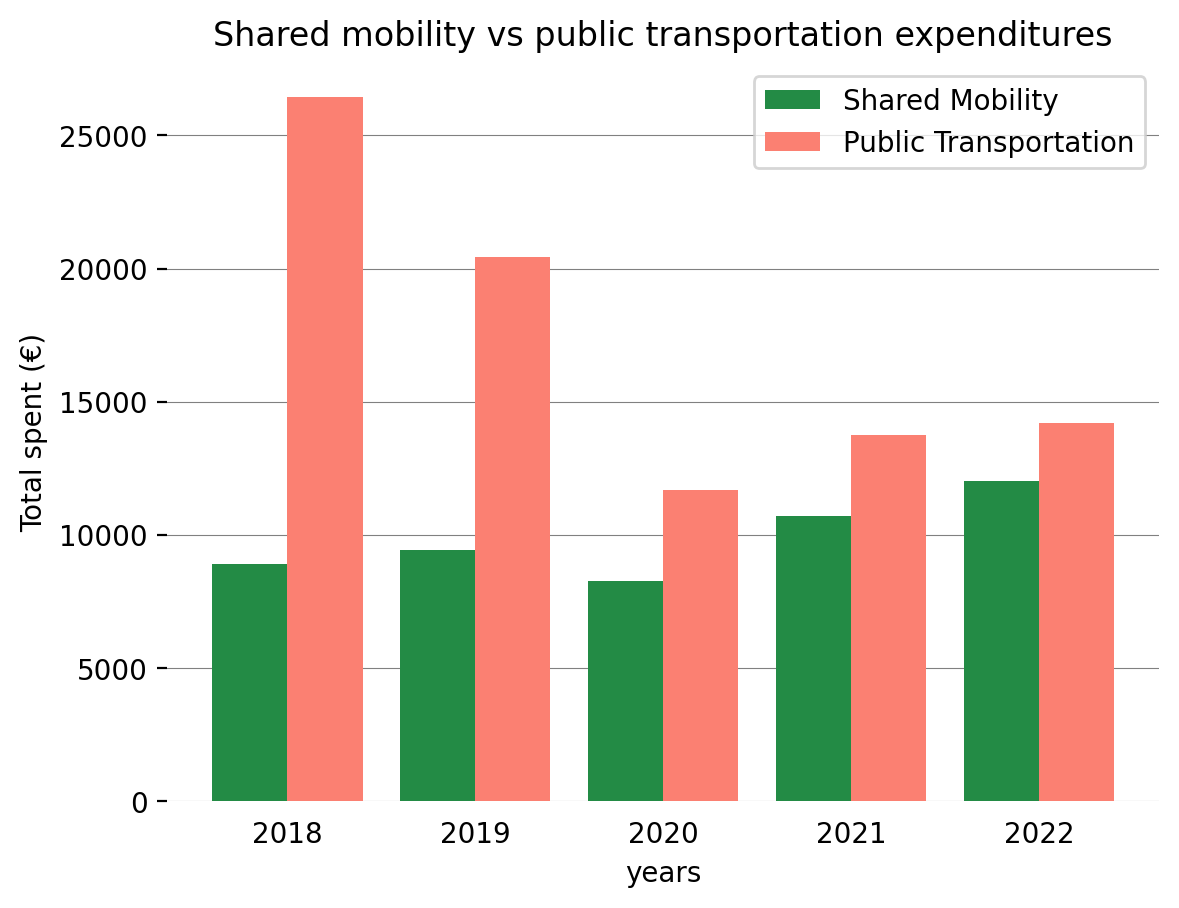

In [202]:
# Plot both DataFrames
df_HBS_urban_nocar = df_HBS_urban_nocar.copy()

df_HBS_urban_nocar.loc[:,'shared_mobility'] = df_HBS_urban_nocar[codes_shared_mobility].sum(axis=1)
df_HBS_urban_nocar.loc[:,'public_transport'] = df_HBS_urban_nocar[code_list_PT_all].sum(axis=1)

x = np.array(df_dict_keys, dtype = int)
Y1 = np.array(
        df_HBS_urban_nocar.groupby(['ANOENC'])['shared_mobility'].sum(), 
        dtype = float,
        )
Y2 = np.array(
        df_HBS_urban_nocar.groupby(['ANOENC'])['public_transport'].sum().to_list(), 
        dtype = float
        )

plt.bar(x - 0.2, Y1, 0.4,  
        label = 'Shared Mobility', 
        color = '#238b45')
plt.bar(x + 0.2 , Y2, 0.4, 
        label = 'Public Transportation',
        color = '#fb8072')

# Grid
plt.grid(axis = 'y', color = "grey", linewidth = "0.4")
plt.rc('axes', axisbelow=True)

# Remove ticks
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,        
    labelbottom=True)

plt.box()


plt.xlabel("years")
plt.ylabel("Total spent (€)")
plt.title("Shared mobility vs public transportation expenditures")
plt.legend()
plt.show();

*7. Are we moving more?*

Finally, the question that motivated the whole analysis. With the data at hand, the only way to infer if we are moving more is by using the fuel expenditure and fuel prices to see if we are traveling more kilometers. Monthly fuel prices for Spain were obtained from the Spanish economic and business newspaper 'Expansión' [11]. These were used to calculate the liters acquired and, from there, kilometers traveled (considering the use of 6-liter tanks). The plot is shown below:

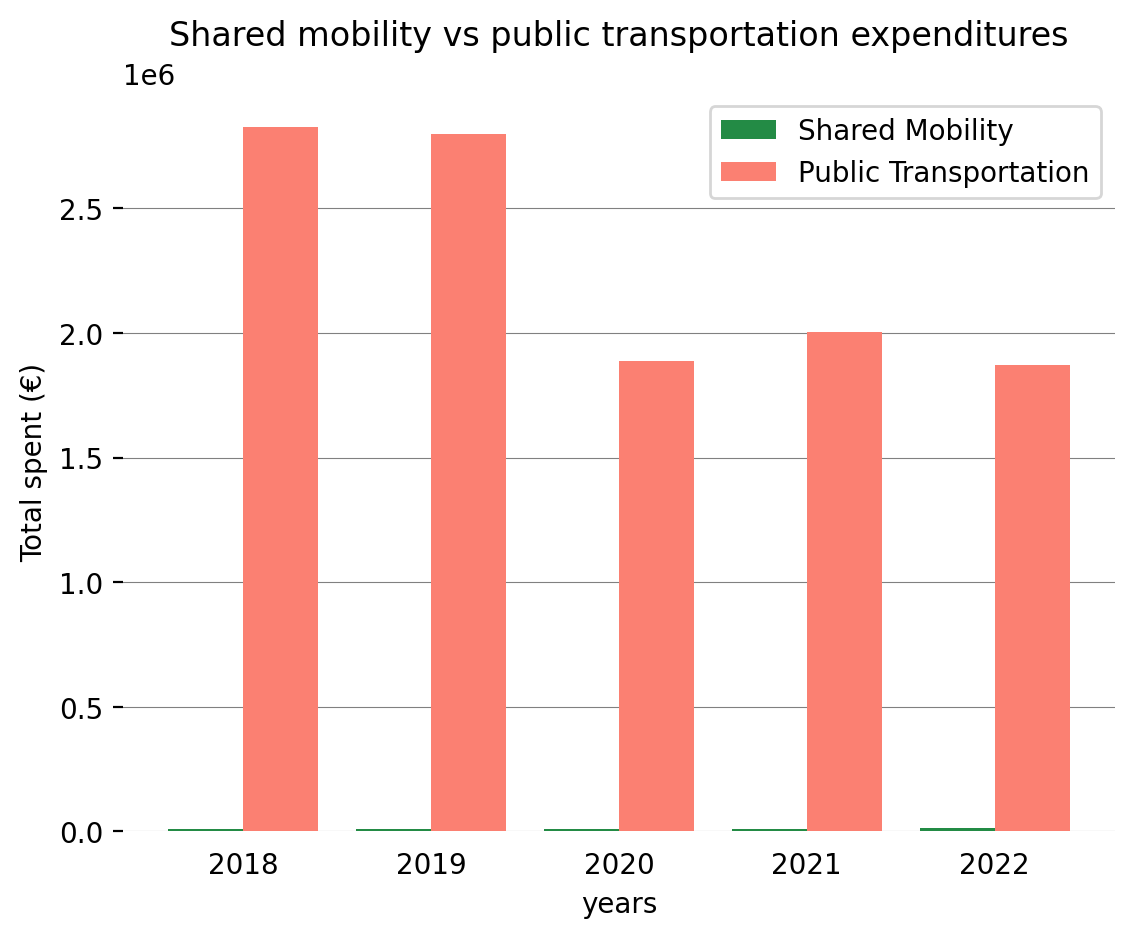

In [203]:
# Plot DataFrames

x = np.array(df_dict_keys, dtype = int)


Y2 = np.array(total_travelled)

plt.bar(x - 0.2, Y1, 0.4,  
        label = 'Shared Mobility', 
        color = '#238b45')
plt.bar(x + 0.2 , Y2, 0.4, 
        label = 'Public Transportation',
        color = '#fb8072')

# Grid
plt.grid(axis = 'y', color = "grey", linewidth = "0.4")
plt.rc('axes', axisbelow=True)

# Remove ticks
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,        
    labelbottom=True)

plt.box()


plt.xlabel("years")
plt.ylabel("Total spent (€)")
plt.title("Shared mobility vs public transportation expenditures")
plt.legend()
plt.show();

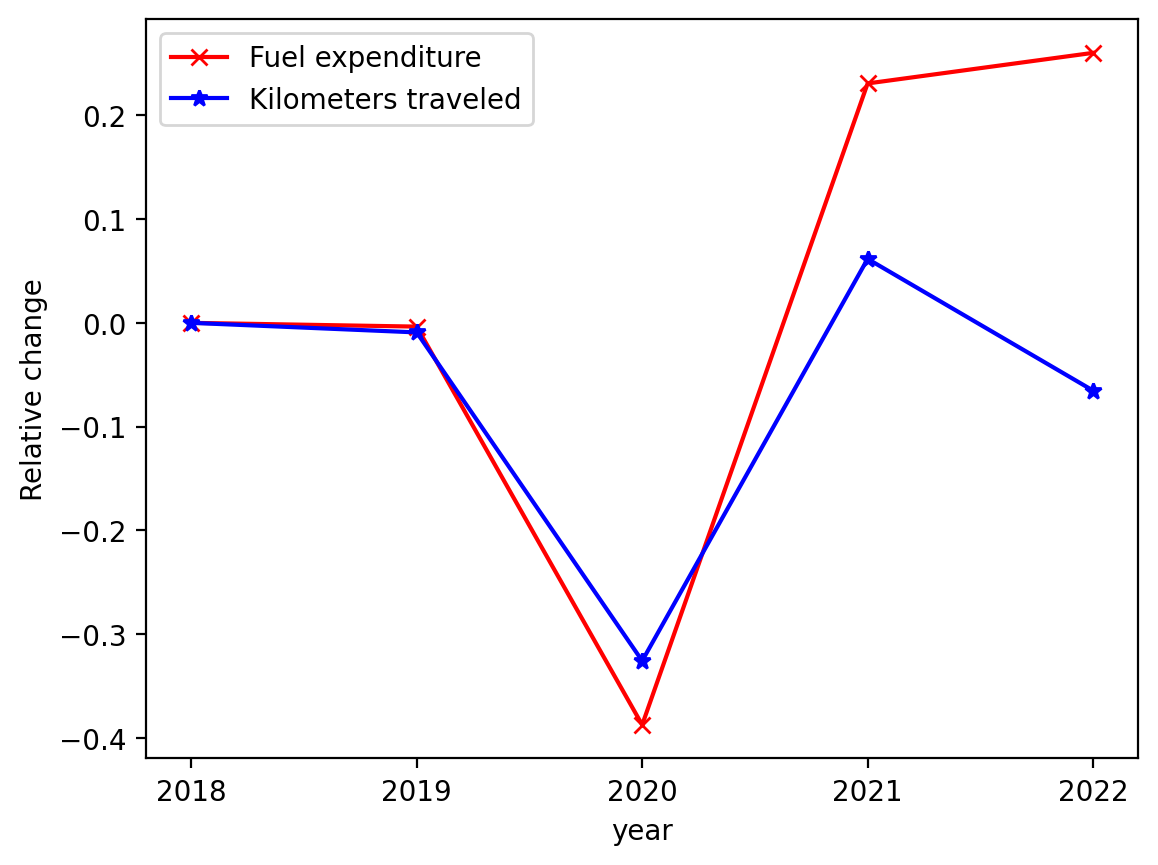

In [204]:
# Calculate year on year change 
relative_change = [0.0]
relative_change_ = [0.0]

Y1 = np.array(
        df_HBS_urban_car.groupby(['ANOENC'])['df_fuelExpenditure'].sum().to_list(), 
        dtype = float
        )
for i, yearExpense in enumerate(Y1):
    if i > 0:
        change = (Y1[i] - Y1[i-1]) / Y1[i-1]
        relative_change.append(change)

Y2 = total_travelled
for i, yearExpense in enumerate(total_travelled):
    if i > 0:
        change_ = (Y2[i] - Y2[i-1]) / Y2[i-1]
        relative_change_.append(change_)

# Plot year on year change
plt.plot(df_dict_keys, relative_change, 'r-x', label = 'Fuel expenditure')
plt.plot(df_dict_keys, relative_change_, 'b-*', label = 'Kilometers traveled')
plt.legend()
plt.ylabel('Relative change')
plt.xlabel('year');

The plot shows the year-over-year change for both fuel expenditure and kilometers traveled. 
It shows that even though we are spending more on fuel after 2020 (red line), our kilometers traveled are not increasing (blue line). These incremented expenditures are directly related to the rising petrol prices during the last few years. From 2018 to 2020, these lines showed similar trends and magnitudes, changed magnitudes after 2020, and now showing differences in both. Fuel expenditure keeps growing, and kilometers traveled are decreasing.

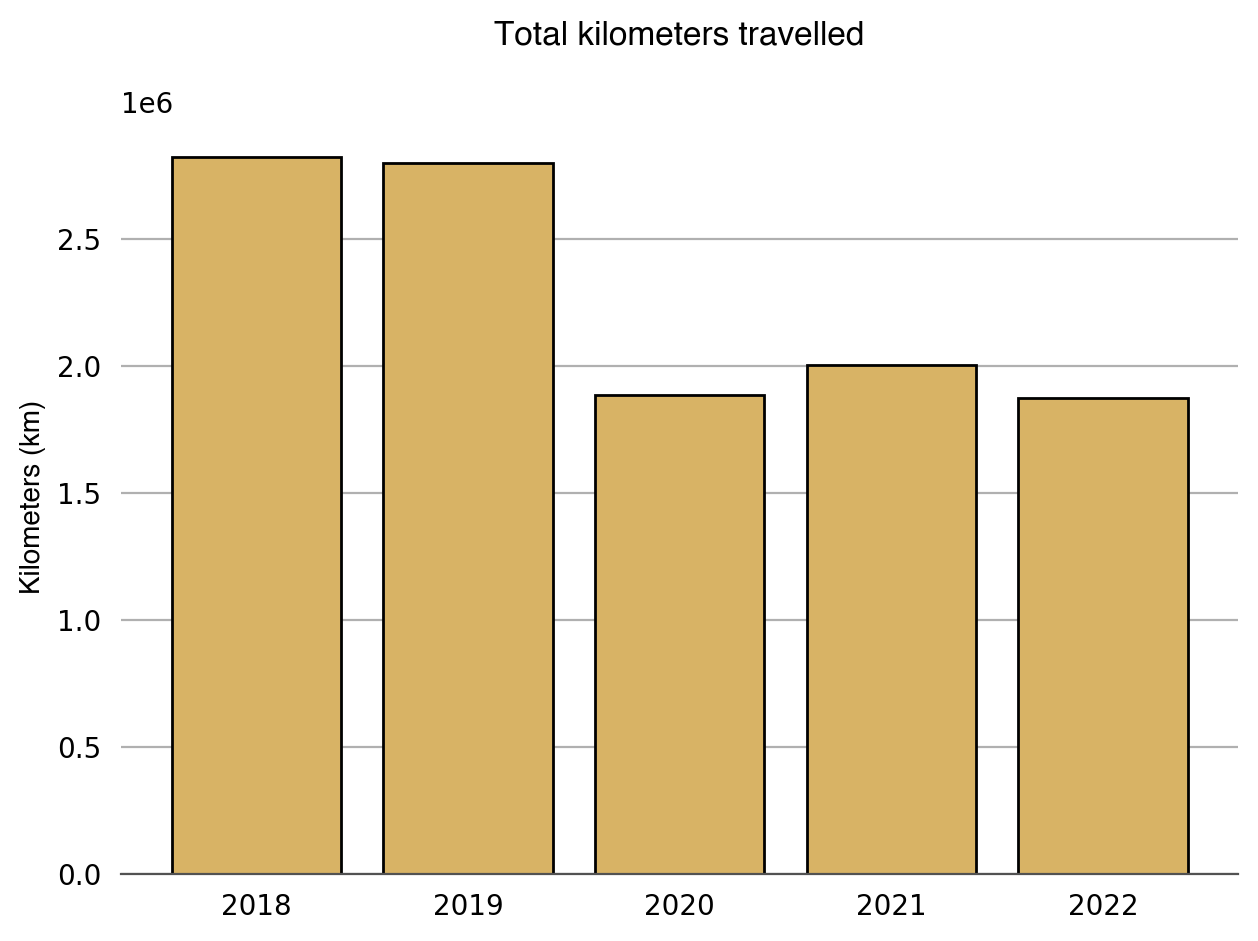

In [205]:
color = ['#d8b365']
y_label = 'Kilometers (km)'
title_ = 'Total kilometers travelled'
plot2print(df_dict_keys, total_travelled, color,  y_label, title_)

<a id='conclusions'></a>
## 5. Conclusions

This exploration shows that, for now, shared mobility services are being used in addition to traditional transportation. They are an extra expense that we have included in our transportation expenditures, but the data does not evidence that they are helping us save.

<a id='Refere'></a>
## 6. References

1. https://ec.europa.eu/eurostat/web/household-budget-surveys
2. https://www.numo.global/new-mobility-atlas#5.19/39.649/-3.565
3. https://maphub.net/Augustin/micro
4. https://fluctuo.com
5. https://help.cabify.com/hc/en-us/articles/115000996089-In-which-cities-can-I-find-Cabify-#:~:text=Spain%3A%20Alicante%2C%20A%20Coruña%2C,Uruguay%3A%20Montevideo
6. https://www.uber.com/global/en/cities/
7. https://bolt.eu/en-es/cities/
8. https://astaramove.com
9. https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736176806&menu=resultados&idp=1254735976608#!tabs-1254736195147
10. Besagni, G., & Borgarello, M. (2020). A bottom-up study on the relationships between transportation expenditures and socio-demographic variables: Evidences from the Italian case study. Travel Behaviour and Society, 19, 151-161.
11- Wadud, Z., Graham, D. J., & Noland, R. B. (2009). Modelling fuel demand for different socio-economic groups. Applied Energy, 86(12), 2740-2749.
11.	Ausubel, J. H., Marchetti, C., & Meyer, P. S. (1998). Toward green mobility: the evolution of transport. European Review, 6(2), 137-156.
12.	Li, T., Dodson, J., & Sipe, N. (2015). Differentiating metropolitan transport disadvantage by mode: Household expenditure on private vehicle fuel and public transport fares in Brisbane, Australia. Journal of transport geography, 49, 16-25.
13. https://datosmacro.expansion.com/energia/precios-gasolina-diesel-calefaccion/espana?anio=2022